<a href="https://colab.research.google.com/github/Arnab-21BDS0389/EDA_Theory_DA/blob/main/EDA_DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Github Link: https://github.com/Arnab-21BDS0389/EDA_Theory_DA

### Data Loading

In [1]:
# Package Installation
install.packages("googledrive")
install.packages("GGally")
install.packages("corrplot")
install.packages("cluster")
install.packages("factoextra")
install.packages("reshape2")
install.packages("dbscan")
install.packages("mclust")
install.packages("kernlab")
install.packages("cluster")
install.packages("stats")
install.packages("MASS")
install.packages("Rtsne")
install.packages("kohonen")
install.packages("caret")

library(googledrive)
library(dplyr)
library(GGally)
library(corrplot)
library(cluster)
library(factoextra)
library(ggplot2)
library(reshape2)
library(dbscan)
library(mclust)
library(kernlab)
library(cluster)
library(stats)
library(MASS)
library(Rtsne)
library(kohonen)
library(caret)

drive_auth()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘doBy’, ‘SparseM’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=430b1e2a303d1284c8711a6c62a069f6&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVZHN2ZpUnZJanFrZVhFVGFud0JwVEw0NFNHYWQ3Q0hWelRHZGxqcXQwbndRWHRLYlR5LV9yUlBhdmI1WEpSYld2VlBWZyIsInN0YXRlIjoiNDMwYjFlMmEzMDNkMTI4NGM4NzExYTZjNjJhMDY5ZjYifQ==


In [2]:
# Download file from Google Drive
drive_download("HepatitisCdata.csv", path = "HepatitisCdata.csv")

File downloaded:

• HepatitisCdata.csv <id: 155-8yGoyp2fdKAredYPk5lJLMx6YJAM5>

Saved locally as:

• HepatitisCdata.csv



In [3]:
# Read CSV file
data <- read.csv("HepatitisCdata.csv")
head(data)

X Category      Age Sex ALB  ALP  ALT  AST  BIL  CHE   CHOL CREA GGT  PROT
1 1 0=Blood Donor 32  m   38.5 52.5  7.7 22.1  7.5  6.93 3.23 106  12.1 69.0
2 2 0=Blood Donor 32  m   38.5 70.3 18.0 24.7  3.9 11.17 4.80  74  15.6 76.5
3 3 0=Blood Donor 32  m   46.9 74.7 36.2 52.6  6.1  8.84 5.20  86  33.2 79.3
4 4 0=Blood Donor 32  m   43.2 52.0 30.6 22.6 18.9  7.33 4.74  80  33.8 75.7
5 5 0=Blood Donor 32  m   39.2 74.1 32.6 24.8  9.6  9.15 4.32  76  29.9 68.7
6 6 0=Blood Donor 32  m   41.6 43.3 18.5 19.7 12.3  9.92 6.05 111  91.0 74.0

### Data Exploration

In [4]:
# Dataset Dimensions
dim(data)

[1] 615  14

In [5]:
# Column Names
colnames(data)

[1] "X"        "Category" "Age"      "Sex"      "ALB"      "ALP"     
 [7] "ALT"      "AST"      "BIL"      "CHE"      "CHOL"     "CREA"    
[13] "GGT"      "PROT"

### Data Summary

In [6]:
# Statistical Summary
summary(data)

       X           Category              Age            Sex           
 Min.   :  1.0   Length:615         Min.   :19.00   Length:615        
 1st Qu.:154.5   Class :character   1st Qu.:39.00   Class :character  
 Median :308.0   Mode  :character   Median :47.00   Mode  :character  
 Mean   :308.0                      Mean   :47.41                     
 3rd Qu.:461.5                      3rd Qu.:54.00                     
 Max.   :615.0                      Max.   :77.00                     
                                                                      
      ALB             ALP              ALT              AST        
 Min.   :14.90   Min.   : 11.30   Min.   :  0.90   Min.   : 10.60  
 1st Qu.:38.80   1st Qu.: 52.50   1st Qu.: 16.40   1st Qu.: 21.60  
 Median :41.95   Median : 66.20   Median : 23.00   Median : 25.90  
 Mean   :41.62   Mean   : 68.28   Mean   : 28.45   Mean   : 34.79  
 3rd Qu.:45.20   3rd Qu.: 80.10   3rd Qu.: 33.08   3rd Qu.: 32.90  
 Max.   :82.20   Max.   

In [7]:
# Datatype of each column
str(data)

'data.frame':	615 obs. of  14 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Category: chr  "0=Blood Donor" "0=Blood Donor" "0=Blood Donor" "0=Blood Donor" ...
 $ Age     : int  32 32 32 32 32 32 32 32 32 32 ...
 $ Sex     : chr  "m" "m" "m" "m" ...
 $ ALB     : num  38.5 38.5 46.9 43.2 39.2 41.6 46.3 42.2 50.9 42.4 ...
 $ ALP     : num  52.5 70.3 74.7 52 74.1 43.3 41.3 41.9 65.5 86.3 ...
 $ ALT     : num  7.7 18 36.2 30.6 32.6 18.5 17.5 35.8 23.2 20.3 ...
 $ AST     : num  22.1 24.7 52.6 22.6 24.8 19.7 17.8 31.1 21.2 20 ...
 $ BIL     : num  7.5 3.9 6.1 18.9 9.6 12.3 8.5 16.1 6.9 35.2 ...
 $ CHE     : num  6.93 11.17 8.84 7.33 9.15 ...
 $ CHOL    : num  3.23 4.8 5.2 4.74 4.32 6.05 4.79 4.6 4.1 4.45 ...
 $ CREA    : num  106 74 86 80 76 111 70 109 83 81 ...
 $ GGT     : num  12.1 15.6 33.2 33.8 29.9 91 16.9 21.5 13.7 15.9 ...
 $ PROT    : num  69 76.5 79.3 75.7 68.7 74 74.5 67.1 71.3 69.9 ...


### Data Handling & Cleaning

In [8]:
# Missing values per column
colSums(is.na(data))


X Category      Age      Sex      ALB      ALP      ALT      AST 
       0        0        0        0        1       18        1        0 
     BIL      CHE     CHOL     CREA      GGT     PROT 
       0        0       10        0        0        1

In [9]:
# Deduplication
data <- distinct(data)
head(data)

X Category      Age Sex ALB  ALP  ALT  AST  BIL  CHE   CHOL CREA GGT  PROT
1 1 0=Blood Donor 32  m   38.5 52.5  7.7 22.1  7.5  6.93 3.23 106  12.1 69.0
2 2 0=Blood Donor 32  m   38.5 70.3 18.0 24.7  3.9 11.17 4.80  74  15.6 76.5
3 3 0=Blood Donor 32  m   46.9 74.7 36.2 52.6  6.1  8.84 5.20  86  33.2 79.3
4 4 0=Blood Donor 32  m   43.2 52.0 30.6 22.6 18.9  7.33 4.74  80  33.8 75.7
5 5 0=Blood Donor 32  m   39.2 74.1 32.6 24.8  9.6  9.15 4.32  76  29.9 68.7
6 6 0=Blood Donor 32  m   41.6 43.3 18.5 19.7 12.3  9.92 6.05 111  91.0 74.0

In [10]:
# Replace missing values with mean
data_cleaned <- data %>%
  mutate(across(where(is.numeric), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)))

head(data_cleaned)

X Category      Age Sex ALB  ALP  ALT  AST  BIL  CHE   CHOL CREA GGT  PROT
1 1 0=Blood Donor 32  m   38.5 52.5  7.7 22.1  7.5  6.93 3.23 106  12.1 69.0
2 2 0=Blood Donor 32  m   38.5 70.3 18.0 24.7  3.9 11.17 4.80  74  15.6 76.5
3 3 0=Blood Donor 32  m   46.9 74.7 36.2 52.6  6.1  8.84 5.20  86  33.2 79.3
4 4 0=Blood Donor 32  m   43.2 52.0 30.6 22.6 18.9  7.33 4.74  80  33.8 75.7
5 5 0=Blood Donor 32  m   39.2 74.1 32.6 24.8  9.6  9.15 4.32  76  29.9 68.7
6 6 0=Blood Donor 32  m   41.6 43.3 18.5 19.7 12.3  9.92 6.05 111  91.0 74.0

In [11]:
# Confirmation of no missing values
colSums(is.na(data_cleaned))

X Category      Age      Sex      ALB      ALP      ALT      AST 
       0        0        0        0        0        0        0        0 
     BIL      CHE     CHOL     CREA      GGT     PROT 
       0        0        0        0        0        0

### Univariate Analysis

In [12]:
# Numeric Columns
numeric_cols <- sapply(data_cleaned, is.numeric)
numeric_data <- data_cleaned[, numeric_cols]

In [13]:
# Statistics for numeric variables
summary(numeric_data)

       X              Age             ALB             ALP        
 Min.   :  1.0   Min.   :19.00   Min.   :14.90   Min.   : 11.30  
 1st Qu.:154.5   1st Qu.:39.00   1st Qu.:38.80   1st Qu.: 52.95  
 Median :308.0   Median :47.00   Median :41.90   Median : 66.70  
 Mean   :308.0   Mean   :47.41   Mean   :41.62   Mean   : 68.28  
 3rd Qu.:461.5   3rd Qu.:54.00   3rd Qu.:45.20   3rd Qu.: 79.30  
 Max.   :615.0   Max.   :77.00   Max.   :82.20   Max.   :416.60  
      ALT              AST              BIL             CHE        
 Min.   :  0.90   Min.   : 10.60   Min.   :  0.8   Min.   : 1.420  
 1st Qu.: 16.40   1st Qu.: 21.60   1st Qu.:  5.3   1st Qu.: 6.935  
 Median : 23.00   Median : 25.90   Median :  7.3   Median : 8.260  
 Mean   : 28.45   Mean   : 34.79   Mean   : 11.4   Mean   : 8.197  
 3rd Qu.: 33.05   3rd Qu.: 32.90   3rd Qu.: 11.2   3rd Qu.: 9.590  
 Max.   :325.30   Max.   :324.00   Max.   :254.0   Max.   :16.410  
      CHOL            CREA              GGT              PROT 

In [14]:
sapply(numeric_data, var)   # Variance

X          Age          ALB          ALP          ALT          AST 
31570.000000   101.105146    33.361253   657.612420   647.648525  1094.993787 
         BIL          CHE         CHOL         CREA          GGT         PROT 
  387.032823     4.864924     1.262177  2475.676056  2987.832709    29.140935

In [15]:
sapply(numeric_data, sd)    # Standard Deviation

X        Age        ALB        ALP        ALT        AST        BIL 
177.679487  10.055105   5.775920  25.643955  25.448940  33.090690  19.673150 
       CHE       CHOL       CREA        GGT       PROT 
  2.205657   1.123466  49.756166  54.661071   5.398234

##### Frequency Distribution for Categorical Variables

In [16]:
# Categorical columns
categorical_cols <- sapply(data_cleaned, is.factor) | sapply(data_cleaned, is.character)
categorical_data <- data_cleaned[, categorical_cols]

# Frequency distribution for categorical variables
lapply(categorical_data, table)

$Category

         0=Blood Donor 0s=suspect Blood Donor            1=Hepatitis 
                   533                      7                     24 
            2=Fibrosis            3=Cirrhosis 
                    21                     30 

$Sex

  f   m 
238 377 


##### Histograms for All Numeric Variables

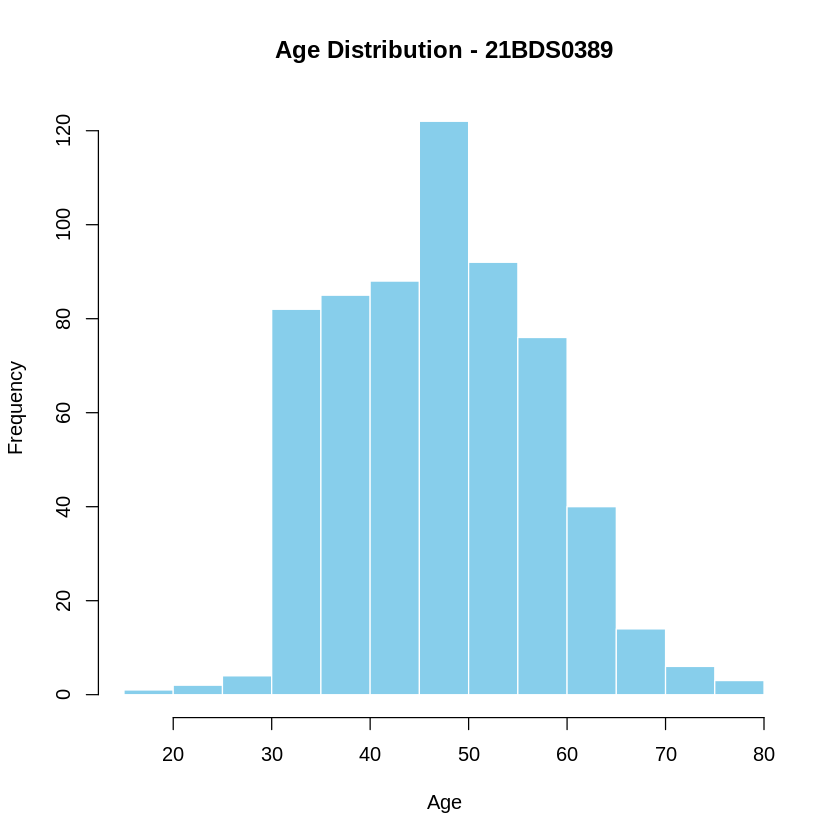

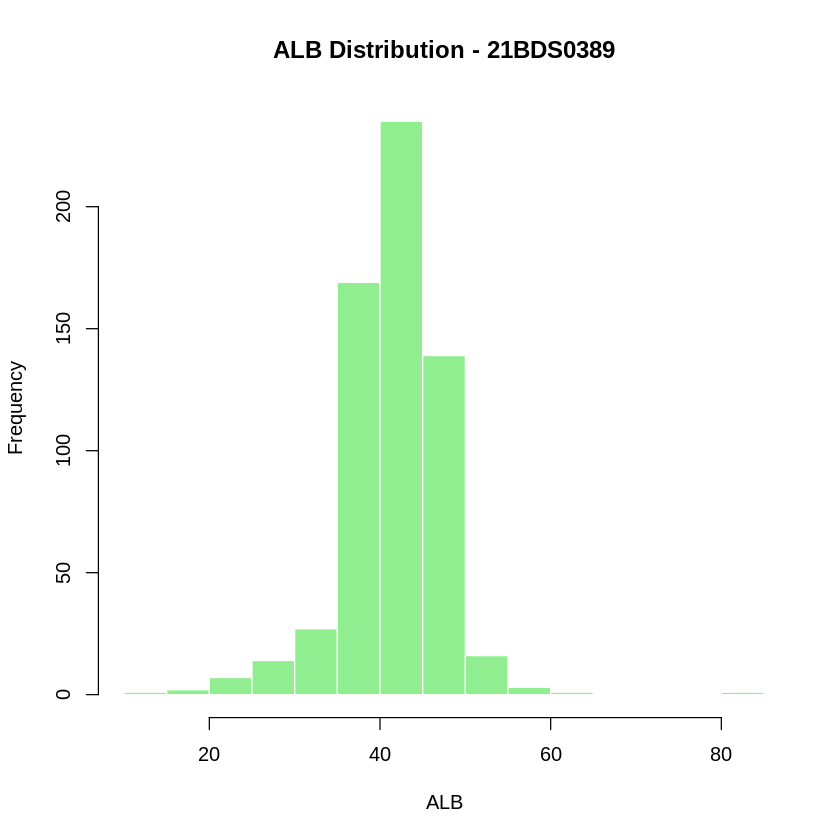

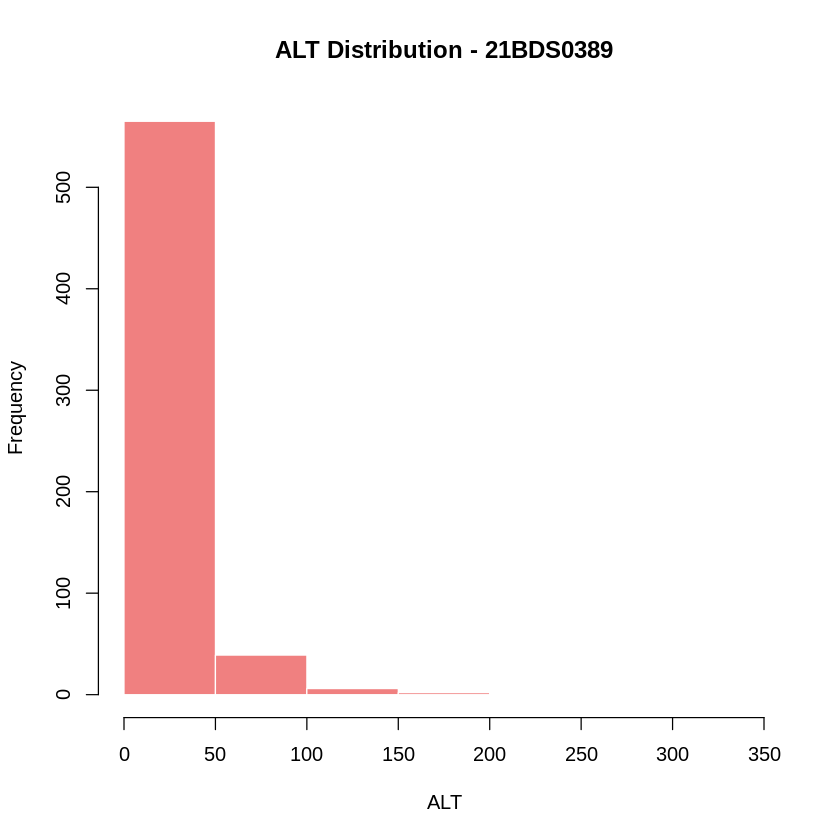

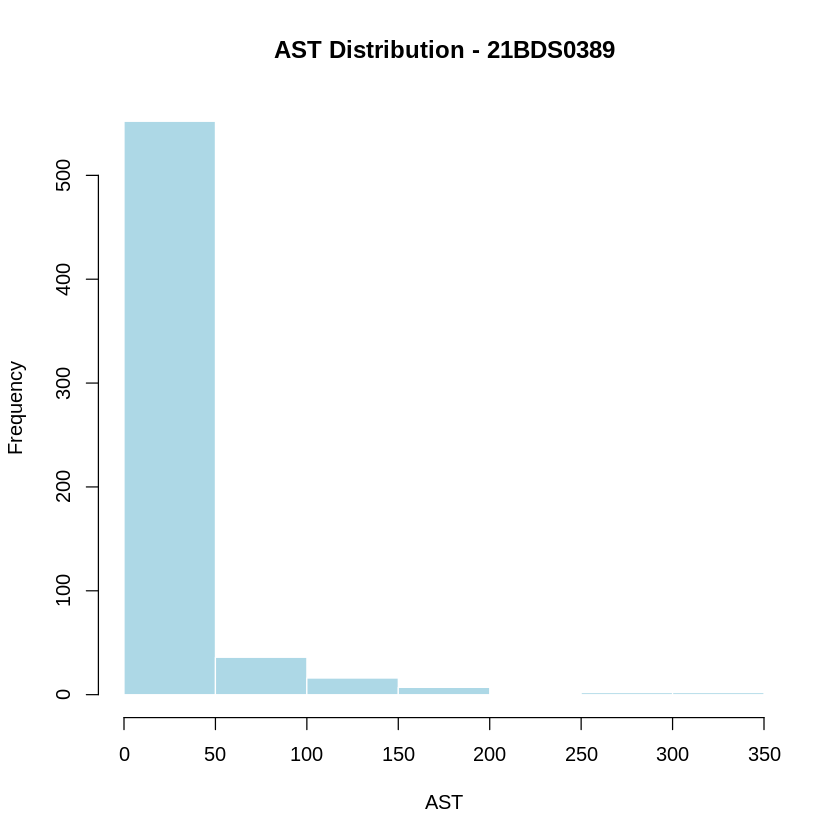

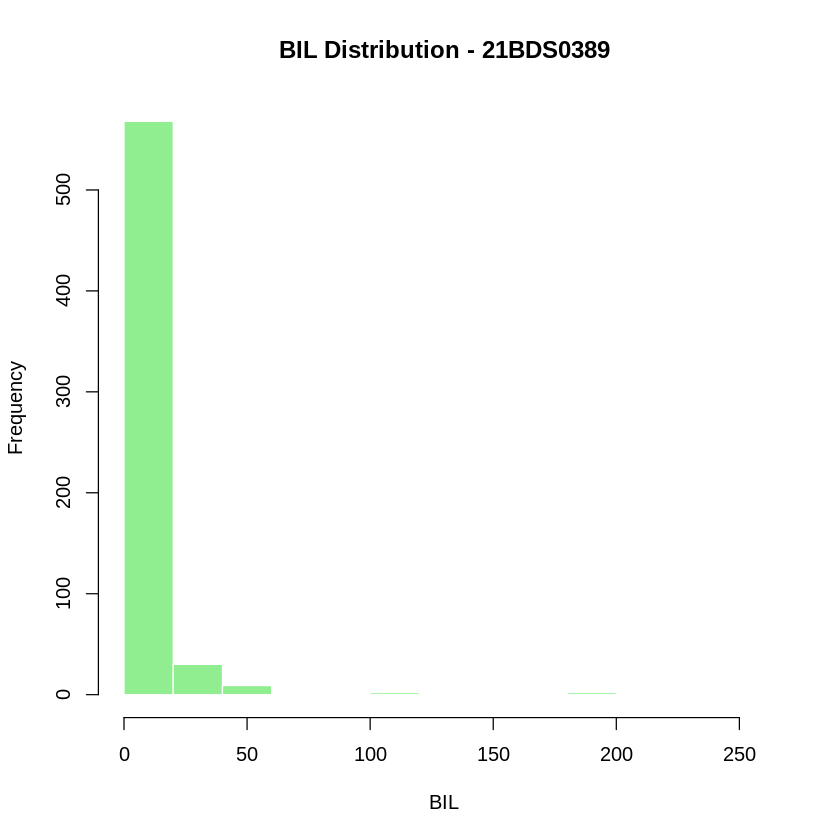

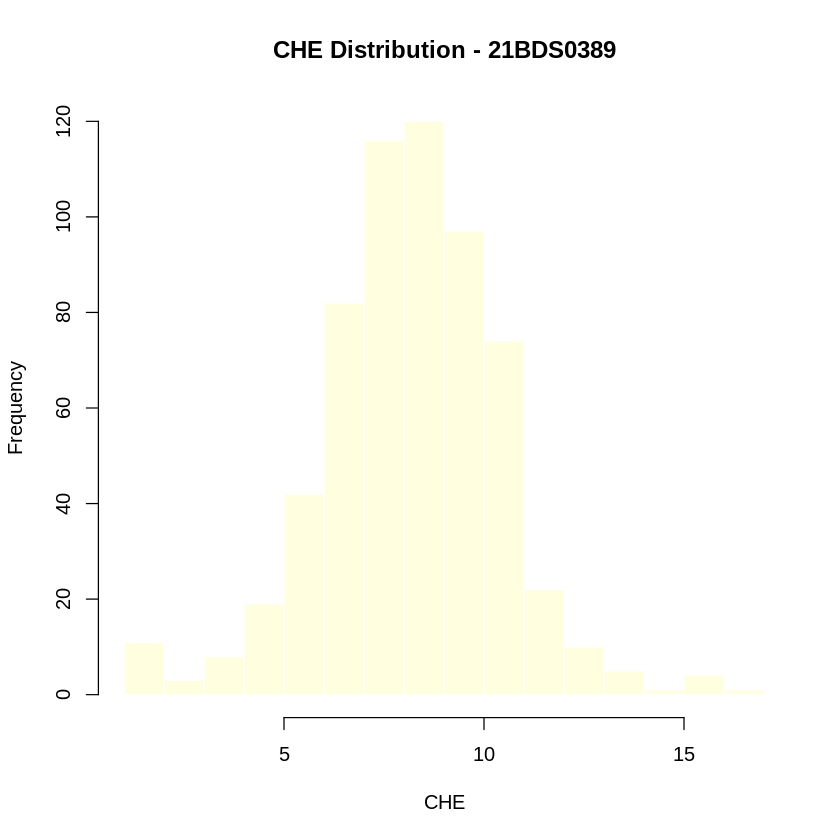

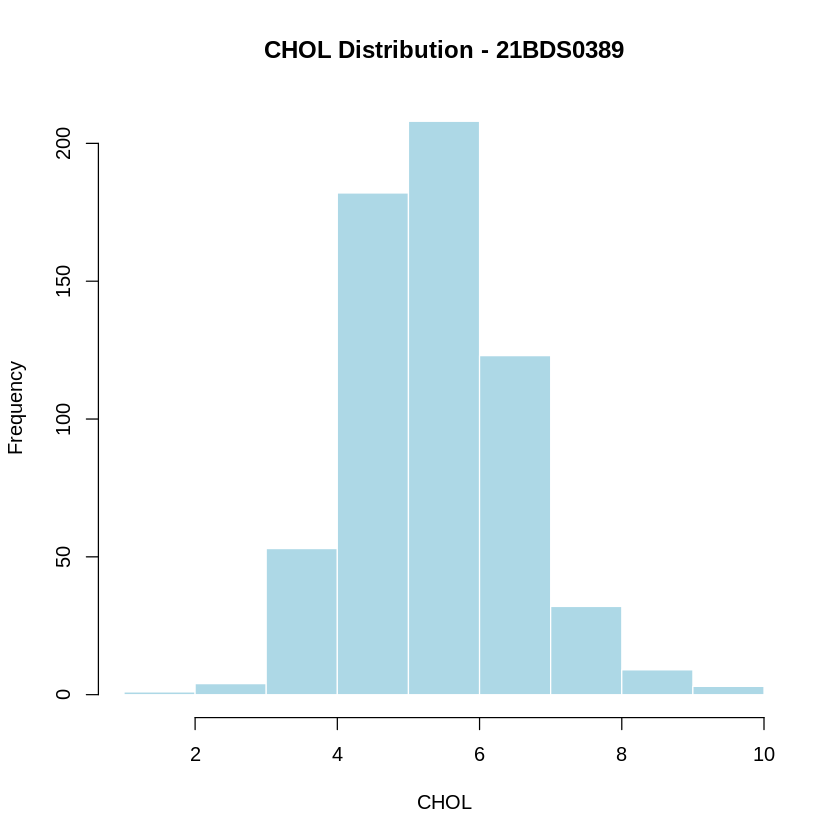

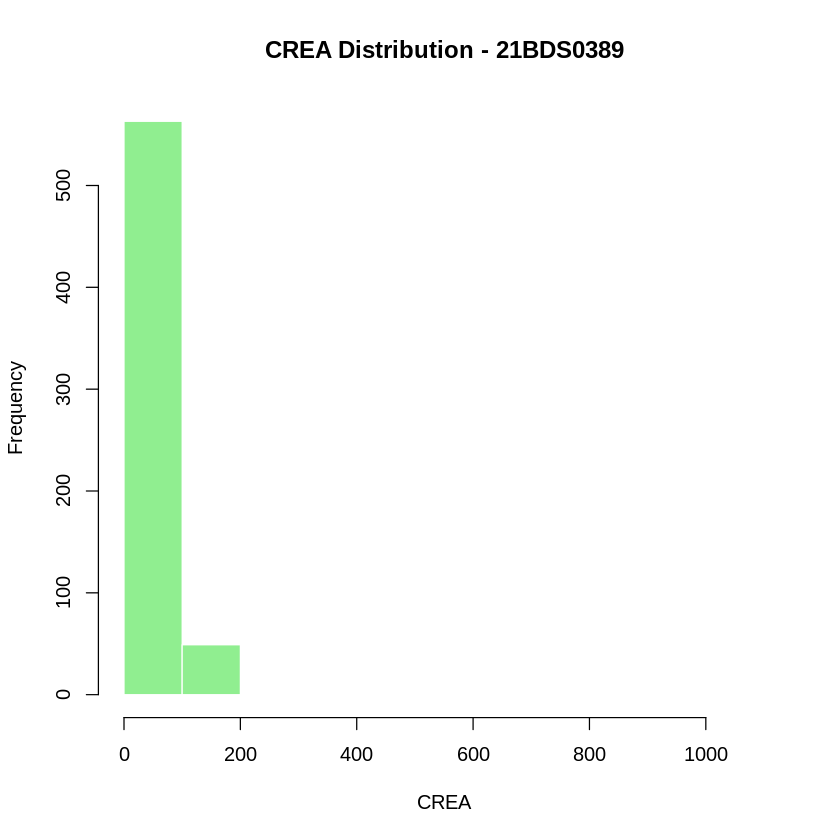

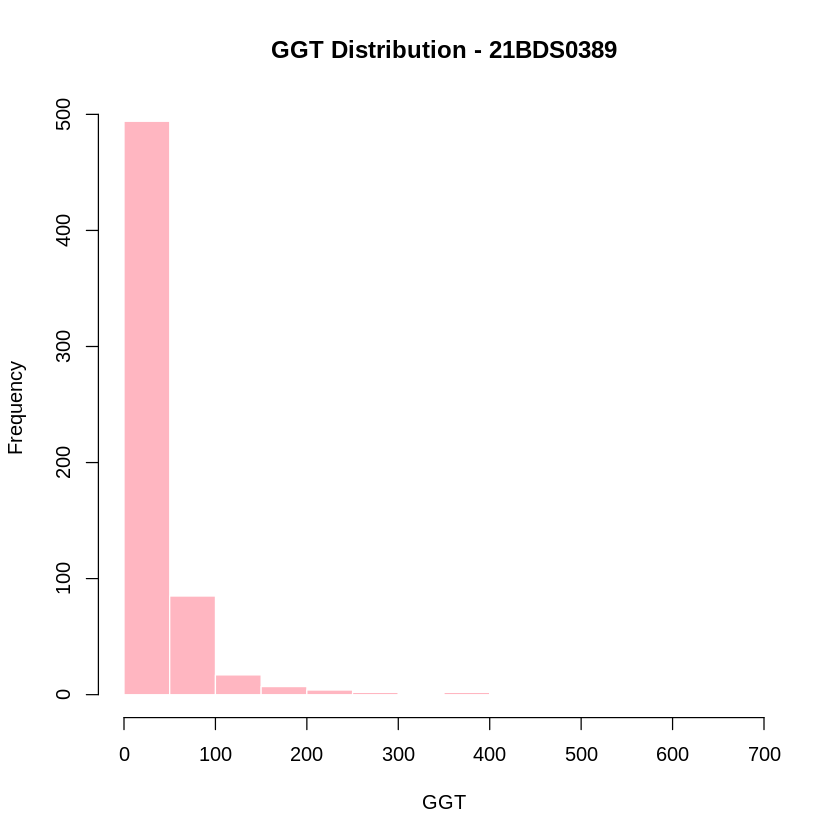

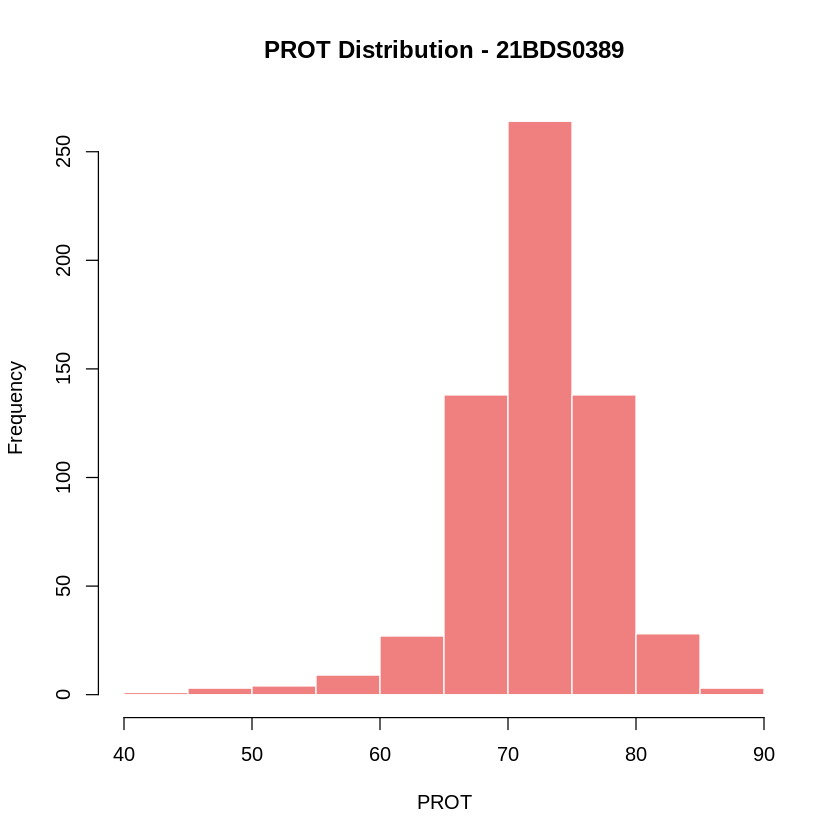

In [17]:
hist(data_cleaned$Age, main="Age Distribution - 21BDS0389", xlab="Age", col="skyblue", border="white")
hist(data_cleaned$ALB, main="ALB Distribution - 21BDS0389", xlab="ALB", col="lightgreen", border="white")
hist(data_cleaned$ALT, main="ALT Distribution - 21BDS0389", xlab="ALT", col="lightcoral", border="white")
hist(data_cleaned$AST, main="AST Distribution - 21BDS0389", xlab="AST", col="lightblue", border="white")
hist(data_cleaned$BIL, main="BIL Distribution - 21BDS0389", xlab="BIL", col="lightgreen", border="white")
hist(data_cleaned$CHE, main="CHE Distribution - 21BDS0389", xlab="CHE", col="lightyellow", border="white")
hist(data_cleaned$CHOL, main="CHOL Distribution - 21BDS0389", xlab="CHOL", col="lightblue", border="white")
hist(data_cleaned$CREA, main="CREA Distribution - 21BDS0389", xlab="CREA", col="lightgreen", border="white")
hist(data_cleaned$GGT, main="GGT Distribution - 21BDS0389", xlab="GGT", col="lightpink", border="white")
hist(data_cleaned$PROT, main="PROT Distribution - 21BDS0389", xlab="PROT", col="lightcoral", border="white")

##### Boxplots for All Numeric Variables

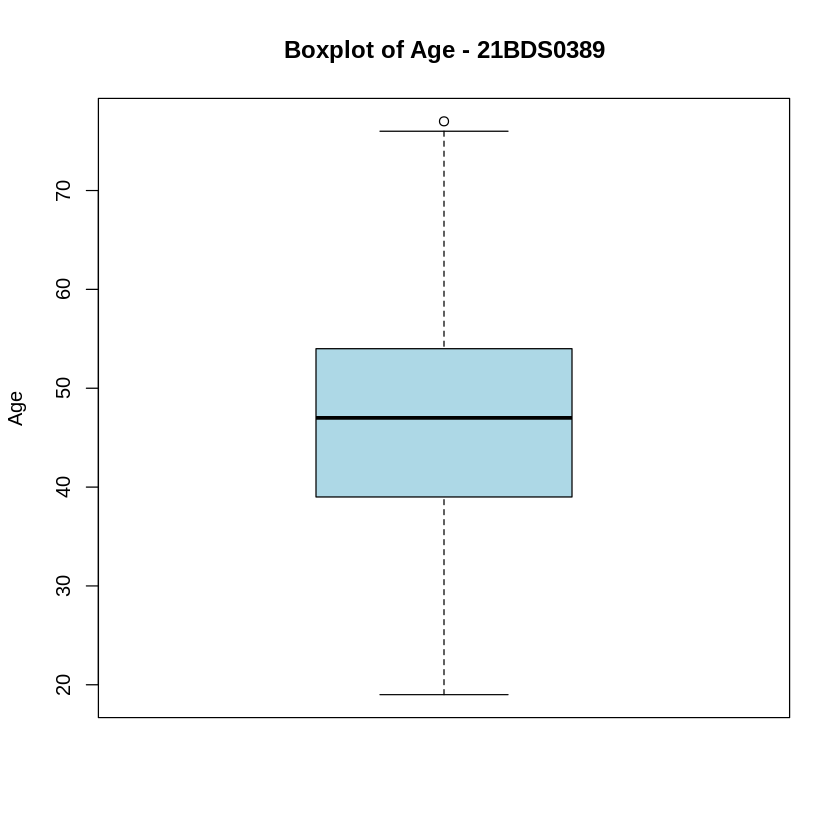

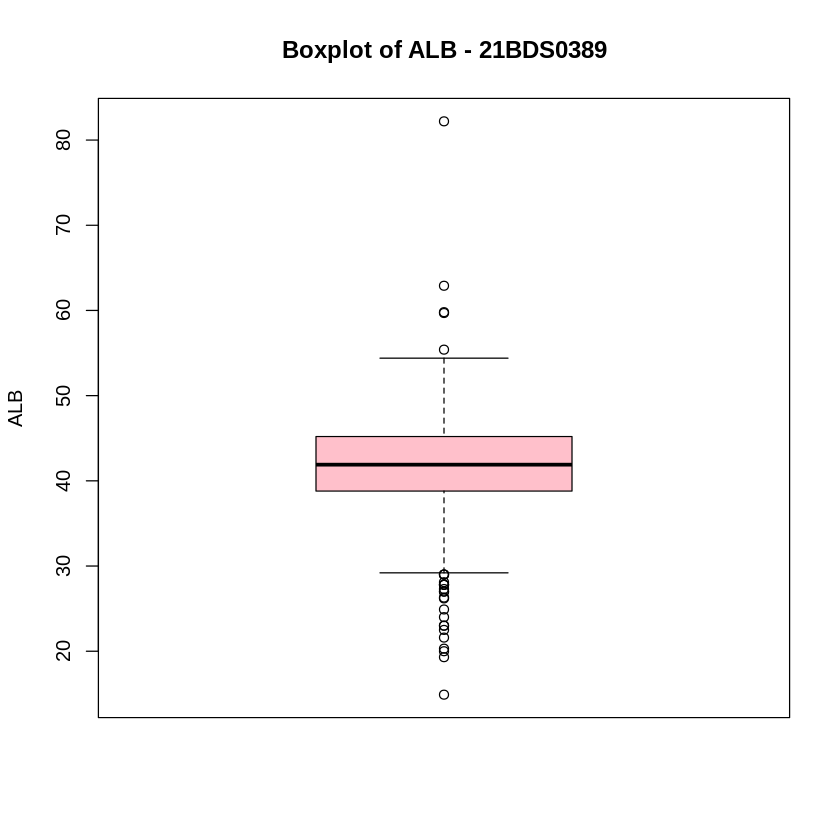

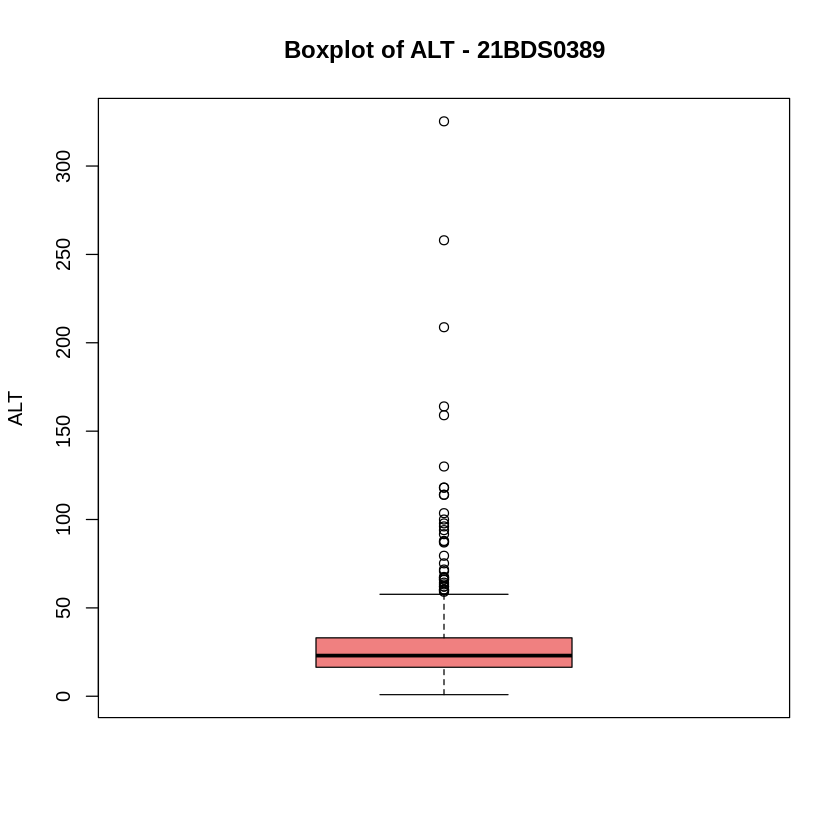

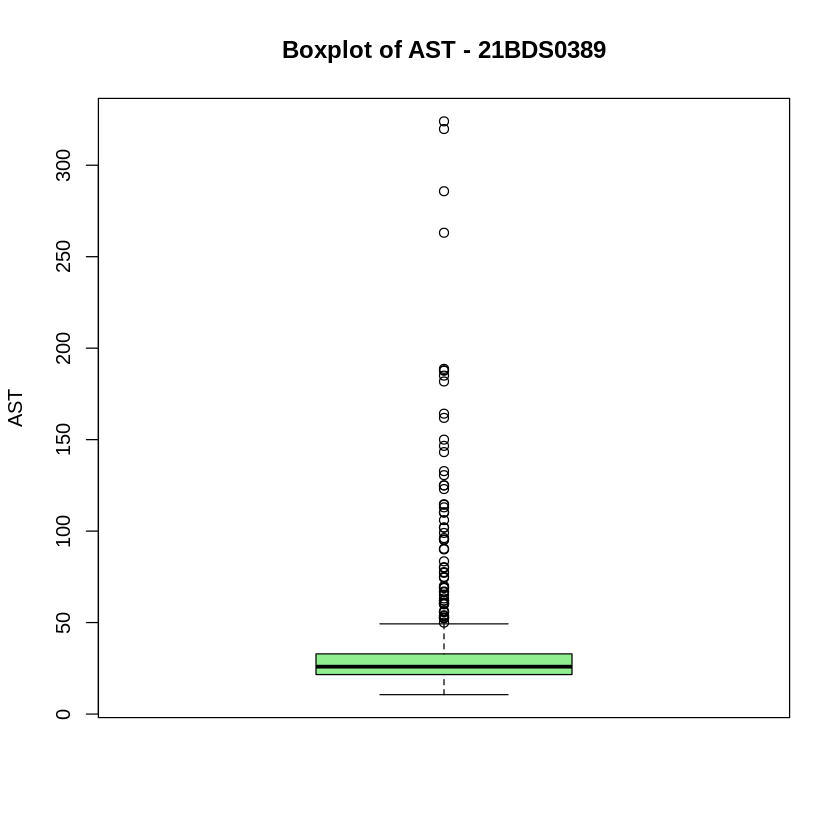

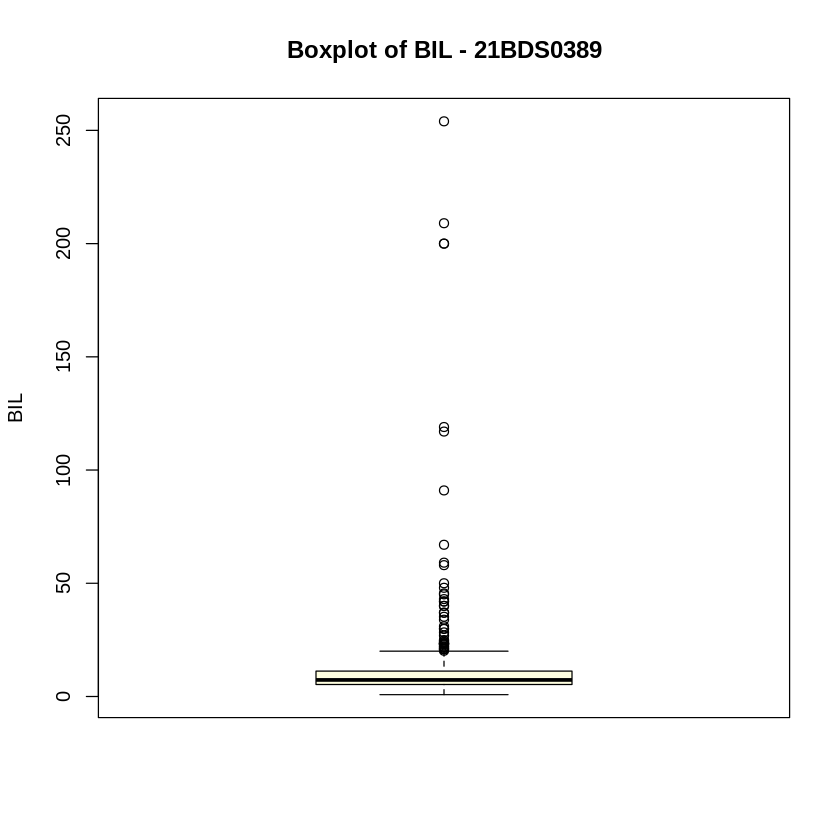

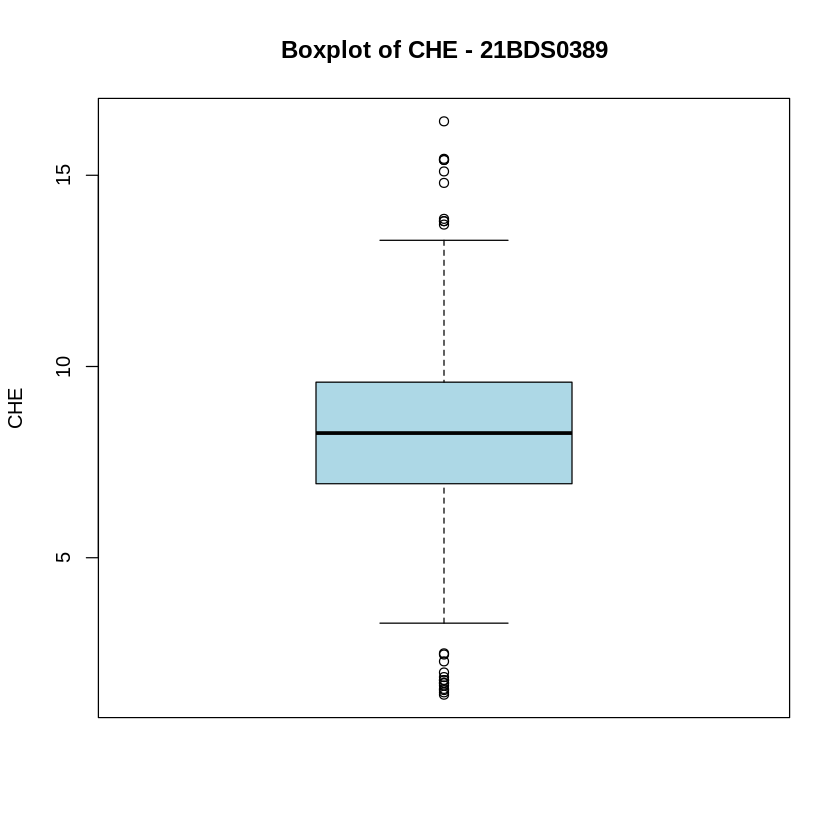

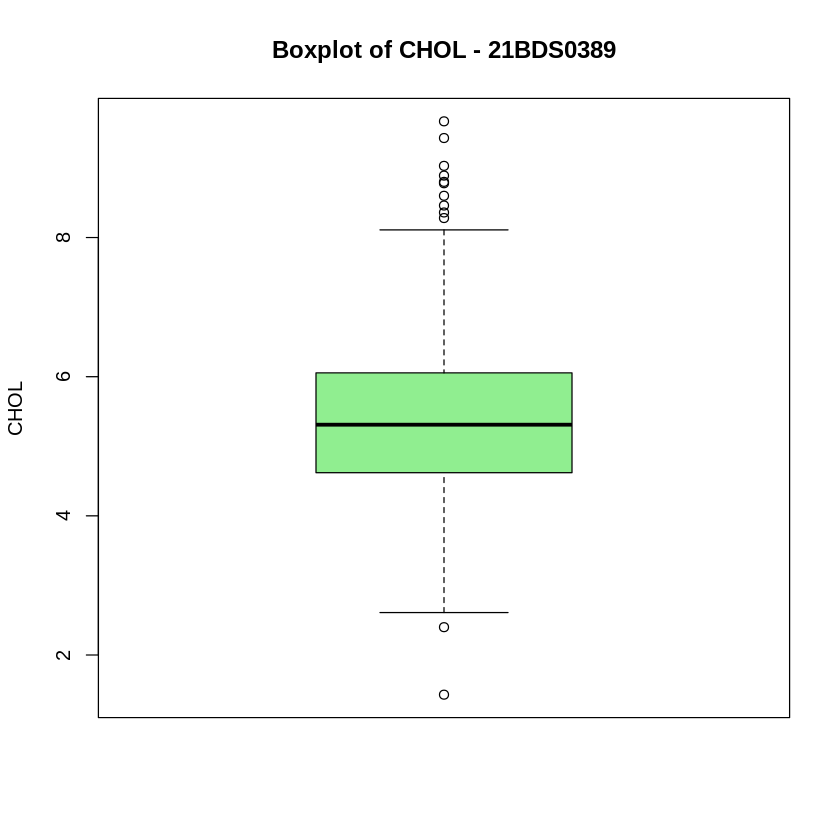

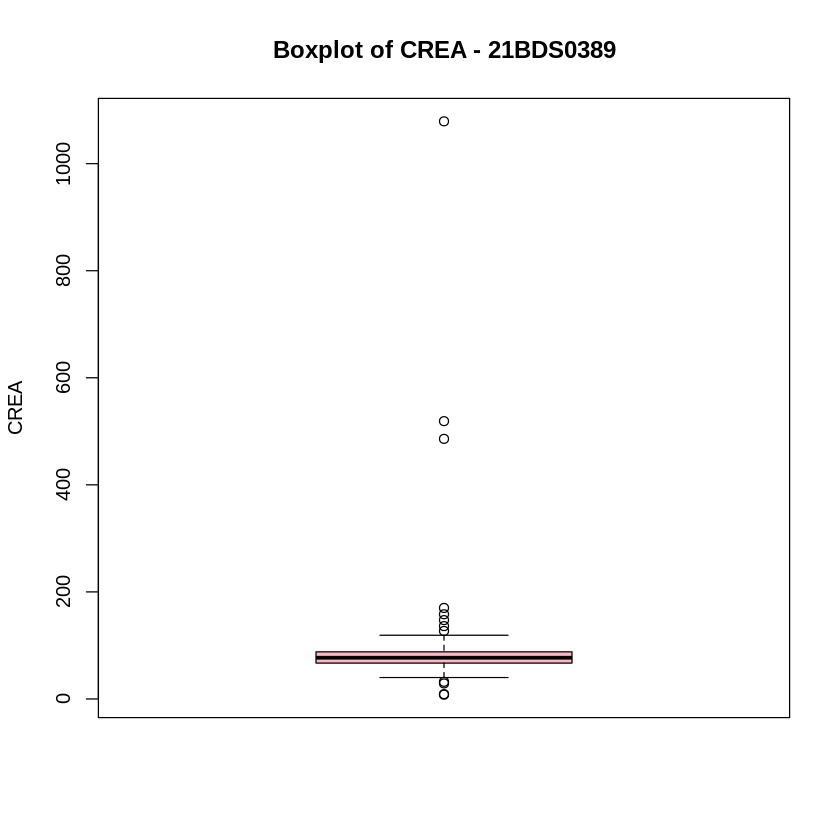

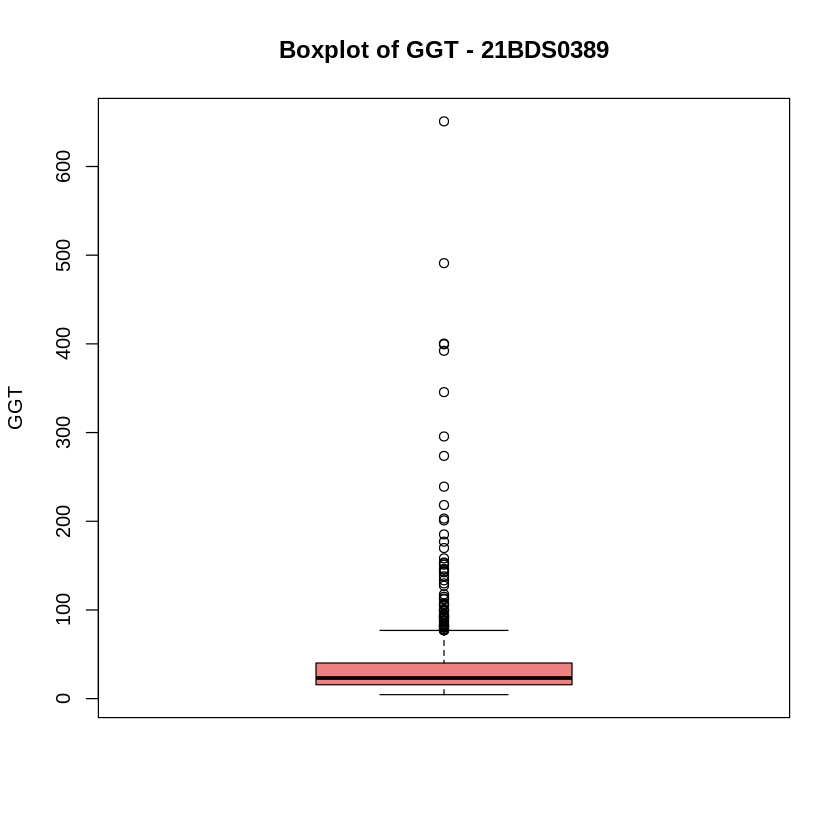

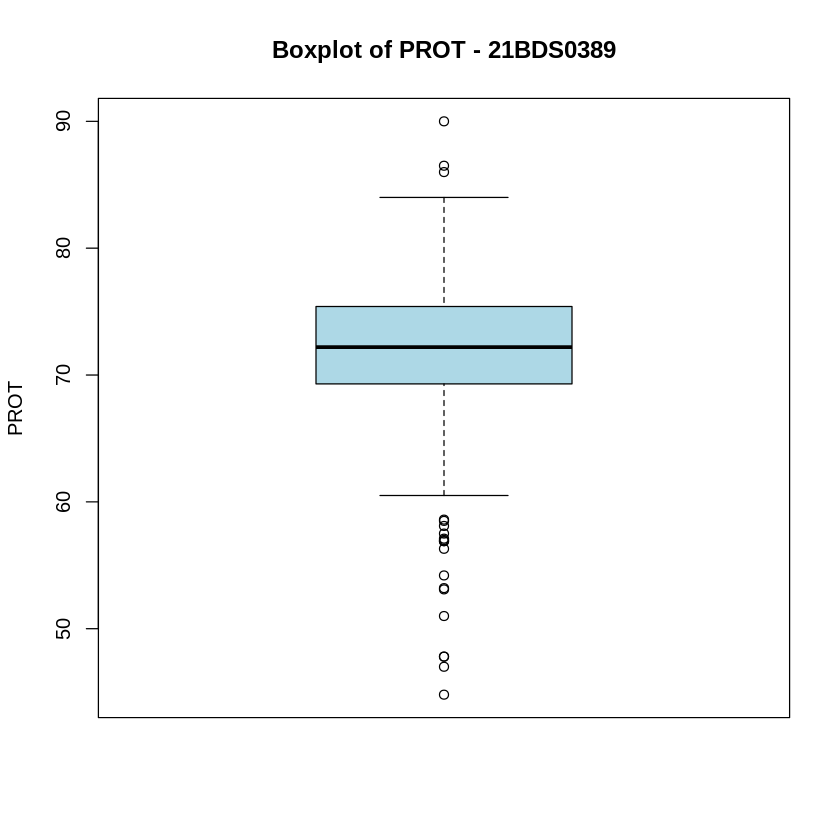

In [18]:
boxplot(data_cleaned$Age, main="Boxplot of Age - 21BDS0389", ylab="Age", col="lightblue")
boxplot(data_cleaned$ALB, main="Boxplot of ALB - 21BDS0389", ylab="ALB", col="pink")
boxplot(data_cleaned$ALT, main="Boxplot of ALT - 21BDS0389", ylab="ALT", col="lightcoral")
boxplot(data_cleaned$AST, main="Boxplot of AST - 21BDS0389", ylab="AST", col="lightgreen")
boxplot(data_cleaned$BIL, main="Boxplot of BIL - 21BDS0389", ylab="BIL", col="lightyellow")
boxplot(data_cleaned$CHE, main="Boxplot of CHE - 21BDS0389", ylab="CHE", col="lightblue")
boxplot(data_cleaned$CHOL, main="Boxplot of CHOL - 21BDS0389", ylab="CHOL", col="lightgreen")
boxplot(data_cleaned$CREA, main="Boxplot of CREA - 21BDS0389", ylab="CREA", col="lightpink")
boxplot(data_cleaned$GGT, main="Boxplot of GGT - 21BDS0389", ylab="GGT", col="lightcoral")
boxplot(data_cleaned$PROT, main="Boxplot of PROT - 21BDS0389", ylab="PROT", col="lightblue")

##### Dot Charts for all Numerical Variables

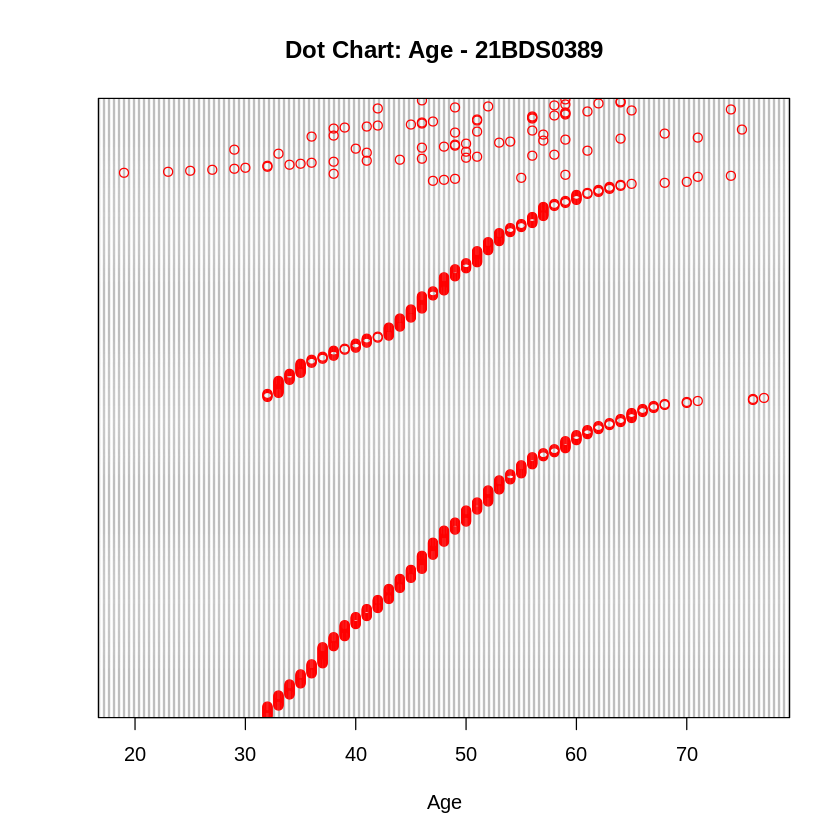

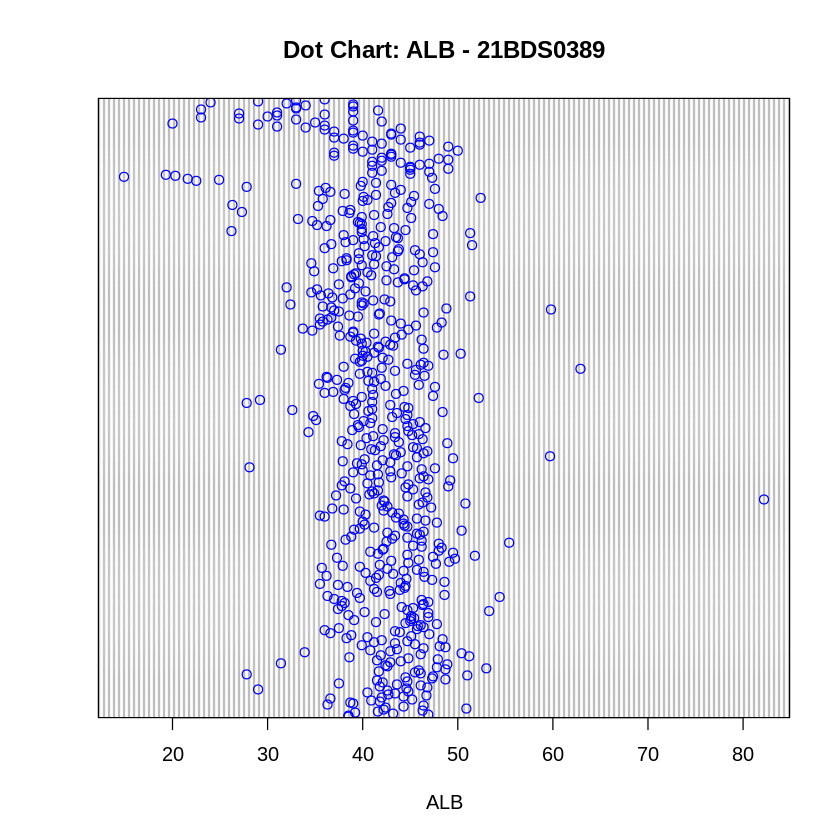

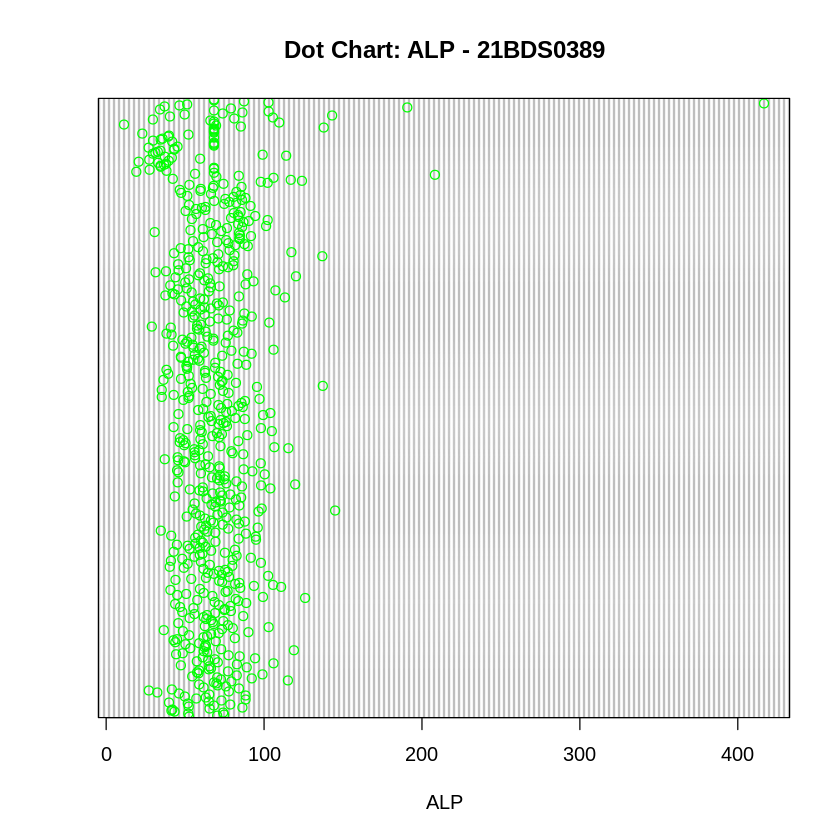

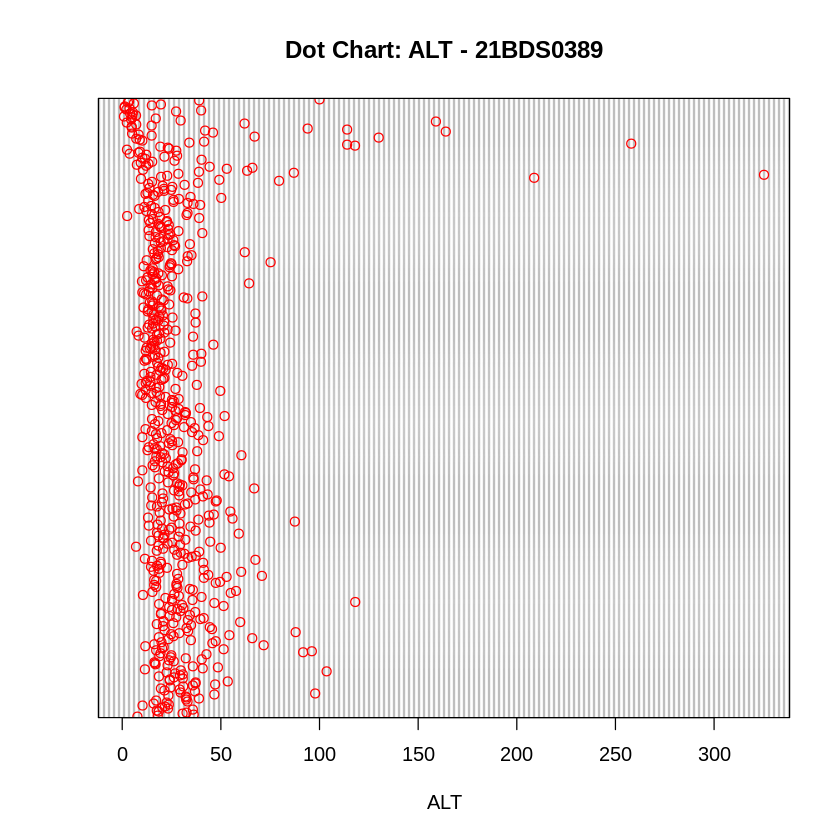

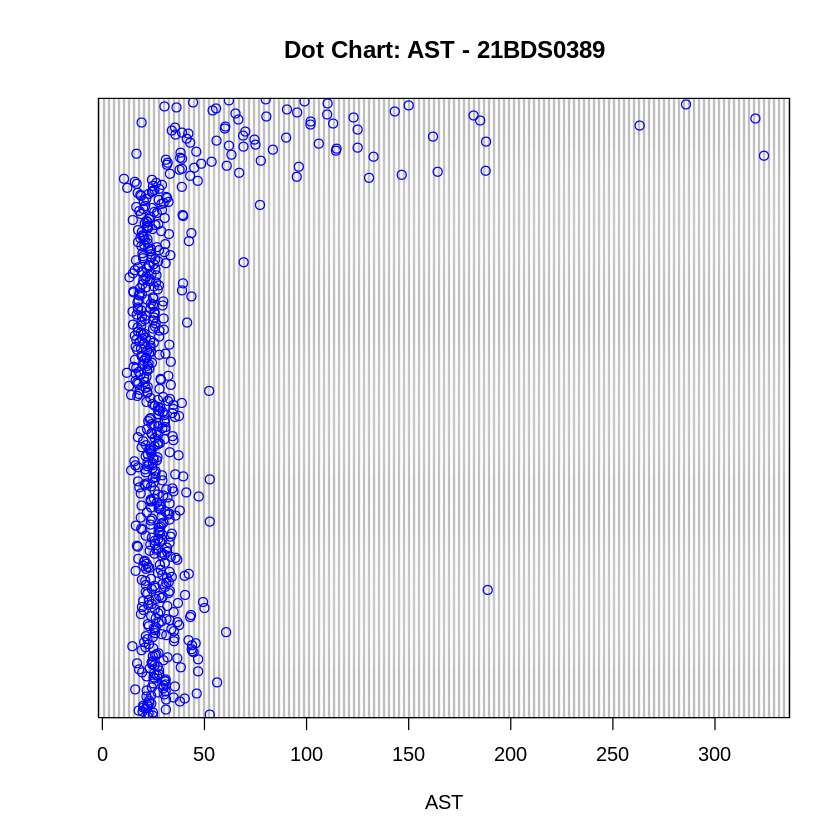

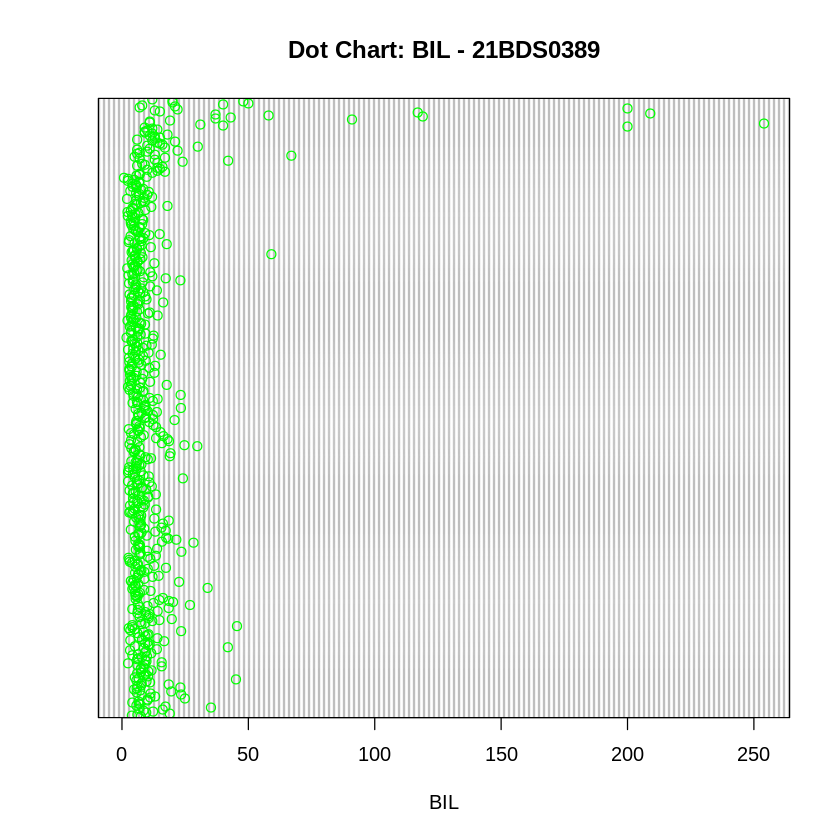

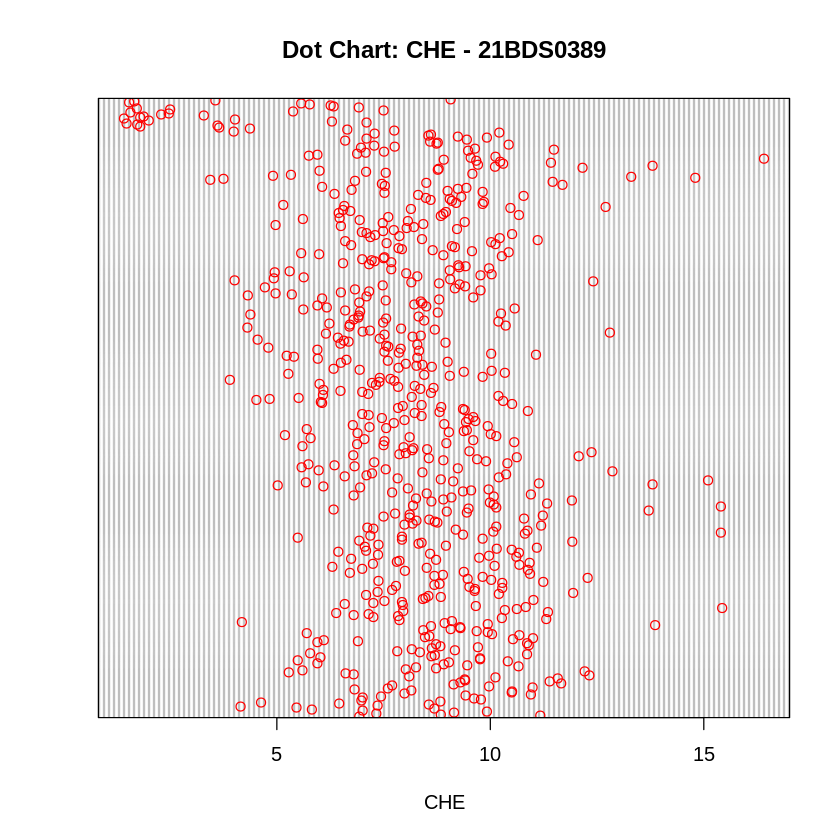

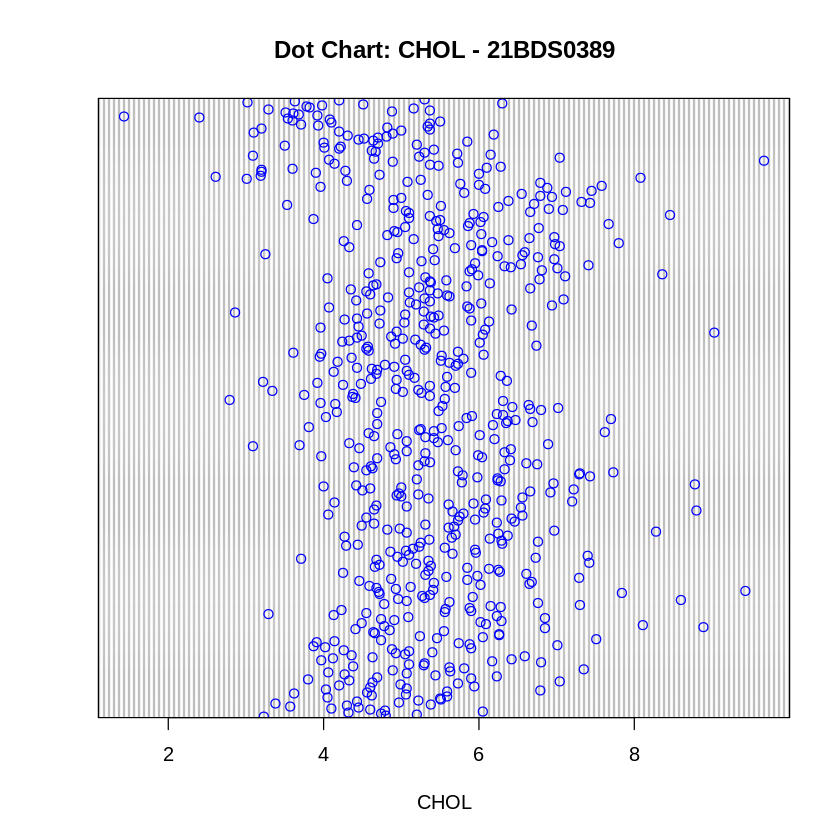

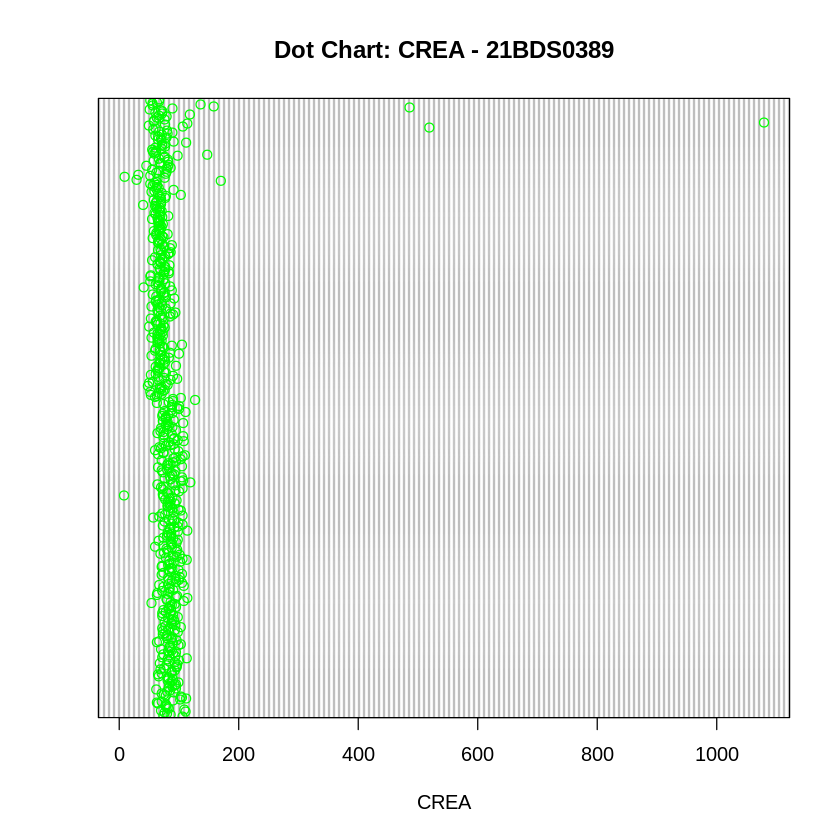

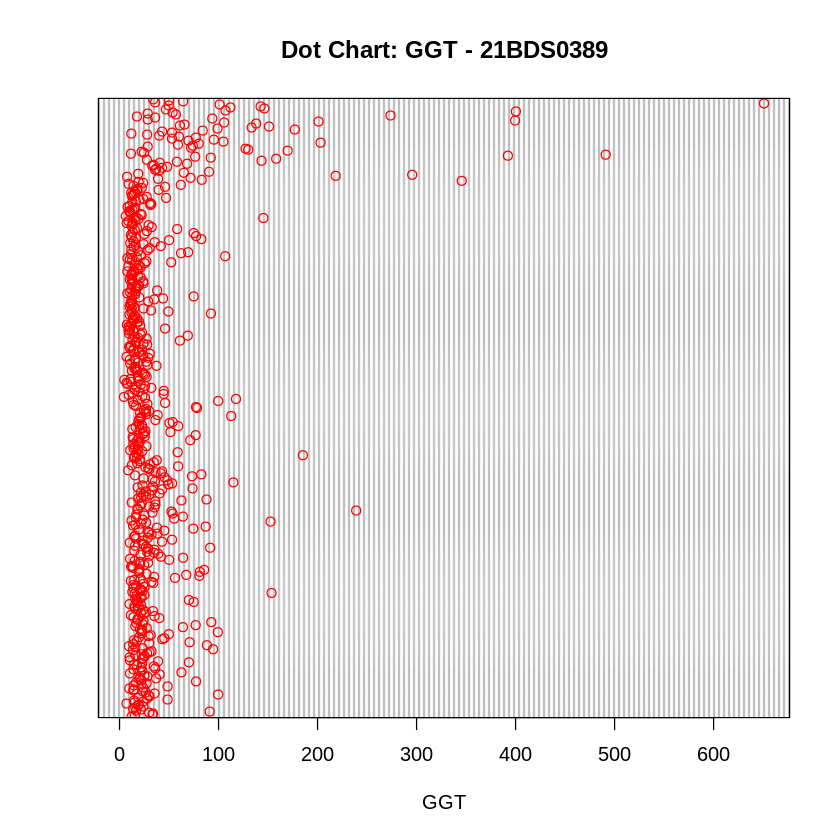

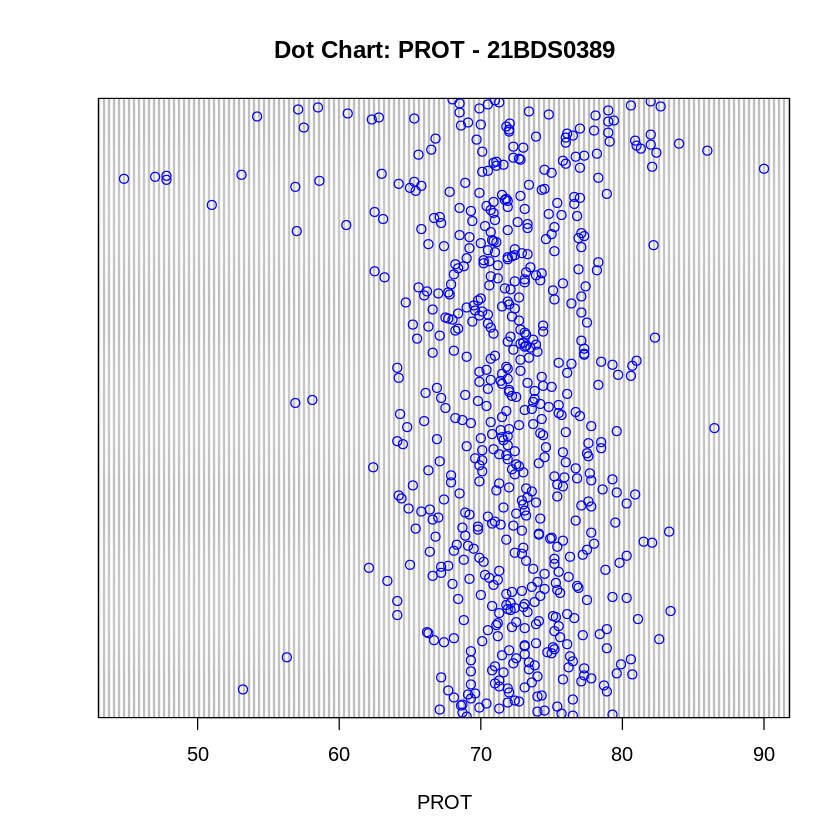

In [19]:
dotchart(data_cleaned$Age, main="Dot Chart: Age - 21BDS0389", xlab="Age", col="red")
dotchart(data_cleaned$ALB, main="Dot Chart: ALB - 21BDS0389", xlab="ALB", col="blue")
dotchart(data_cleaned$ALP, main="Dot Chart: ALP - 21BDS0389", xlab="ALP", col="green")
dotchart(data_cleaned$ALT, main="Dot Chart: ALT - 21BDS0389", xlab="ALT", col="red")
dotchart(data_cleaned$AST, main="Dot Chart: AST - 21BDS0389", xlab="AST", col="blue")
dotchart(data_cleaned$BIL, main="Dot Chart: BIL - 21BDS0389", xlab="BIL", col="green")
dotchart(data_cleaned$CHE, main="Dot Chart: CHE - 21BDS0389", xlab="CHE", col="red")
dotchart(data_cleaned$CHOL, main="Dot Chart: CHOL - 21BDS0389", xlab="CHOL", col="blue")
dotchart(data_cleaned$CREA, main="Dot Chart: CREA - 21BDS0389", xlab="CREA", col="green")
dotchart(data_cleaned$GGT, main="Dot Chart: GGT - 21BDS0389", xlab="GGT", col="red")
dotchart(data_cleaned$PROT, main="Dot Chart: PROT - 21BDS0389", xlab="PROT", col="blue")

##### Univariate Visualizations for Categorical Variables

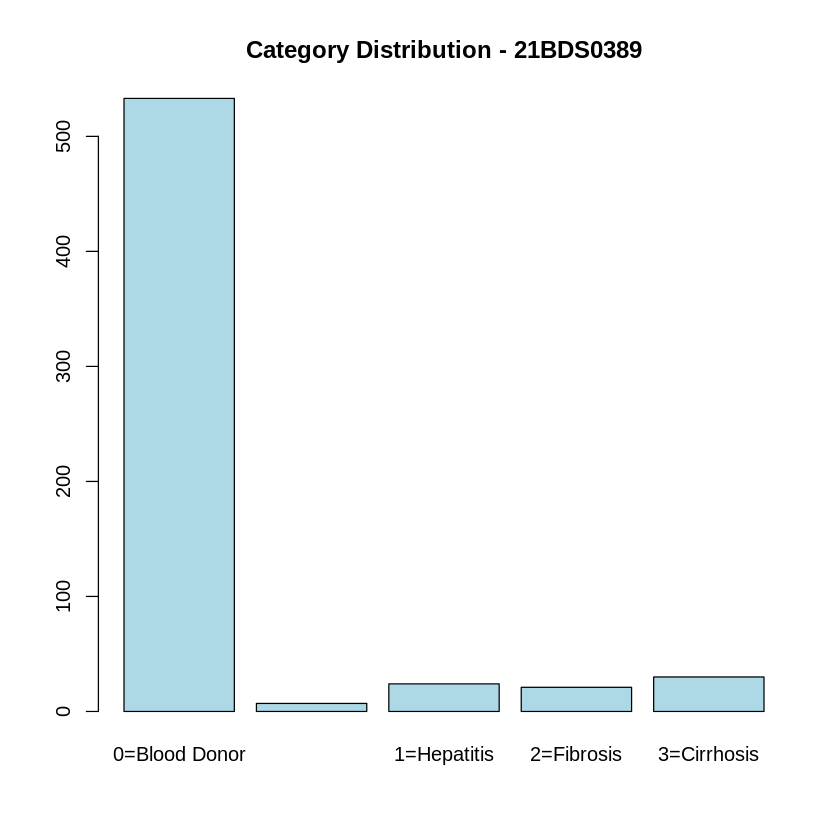

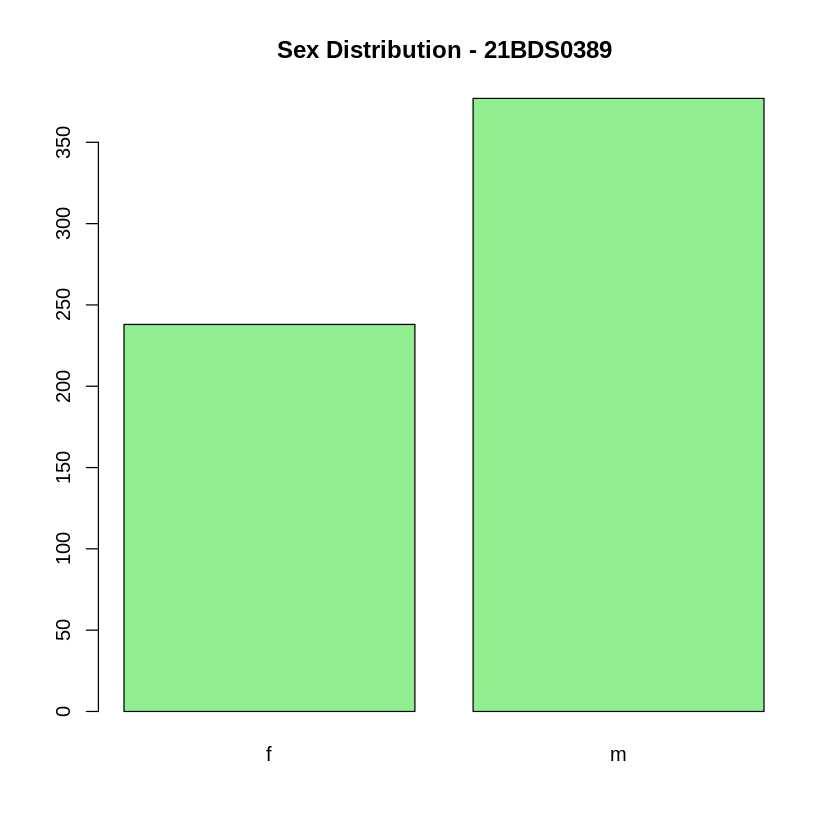

In [20]:
# Bar plot for categorical variables
barplot(table(data_cleaned$Category), main="Category Distribution - 21BDS0389", col="lightblue")
barplot(table(data_cleaned$Sex), main="Sex Distribution - 21BDS0389", col="lightgreen")

### Bivariate Analysis

##### Correlation Matrix for All Numeric Pairs

In [21]:
cor_matrix <- cor(numeric_data, use="complete.obs")
print(cor_matrix)

               X          Age          ALB         ALP          ALT         AST
X     1.00000000  0.420476961 -0.309379192  0.02240234 -0.034995518  0.33262600
Age   0.42047696  1.000000000 -0.197004739  0.16847333 -0.006016589  0.08866590
ALB  -0.30937919 -0.197004739  1.000000000 -0.13885824  0.001606337 -0.19339677
ALP   0.02240234  0.168473332 -0.138858241  1.00000000  0.172461124  0.06220184
ALT  -0.03499552 -0.006016589  0.001606337  0.17246112  1.000000000  0.27332505
AST   0.33262600  0.088665897 -0.193396767  0.06220184  0.273325052  1.00000000
BIL   0.18145946  0.032491817 -0.221649636  0.04859973 -0.038467799  0.31223141
CHE  -0.27054948 -0.075093477  0.375847806  0.03297145  0.146952934 -0.20853580
CHOL -0.08570882  0.123978014  0.204803112  0.12191446  0.068023456 -0.20750737
CREA -0.02598662 -0.022296365 -0.001573178  0.14955433 -0.043024952 -0.02138721
GGT   0.24778086  0.153086840 -0.155555161  0.44226240  0.248085550  0.49126255
PROT -0.11373487 -0.153665150  0.5500329

##### Scatter Plots for All Numeric Pairs

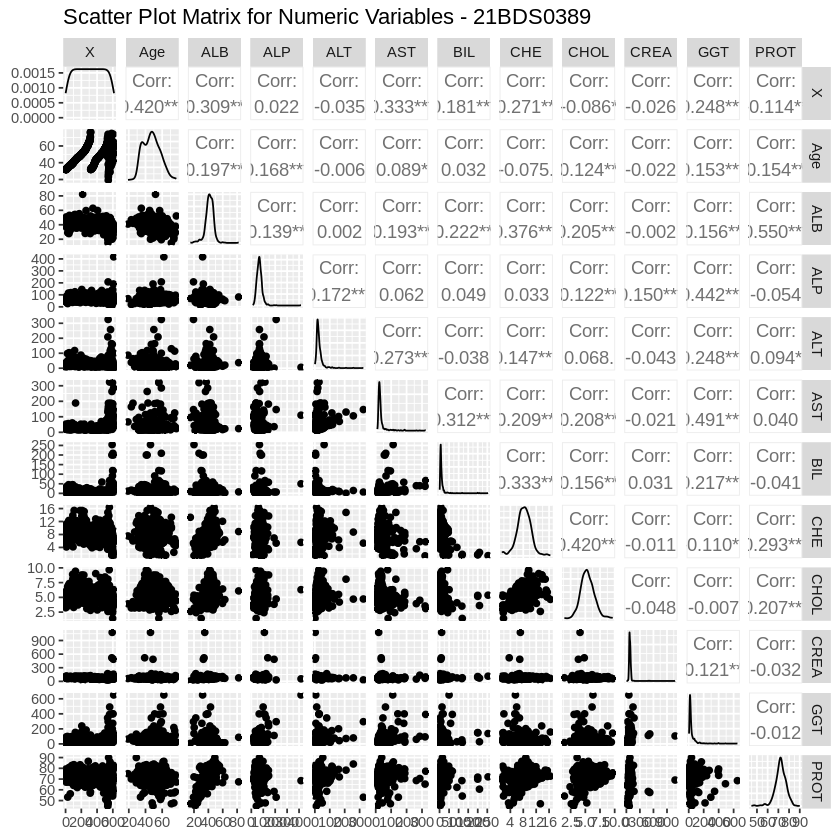

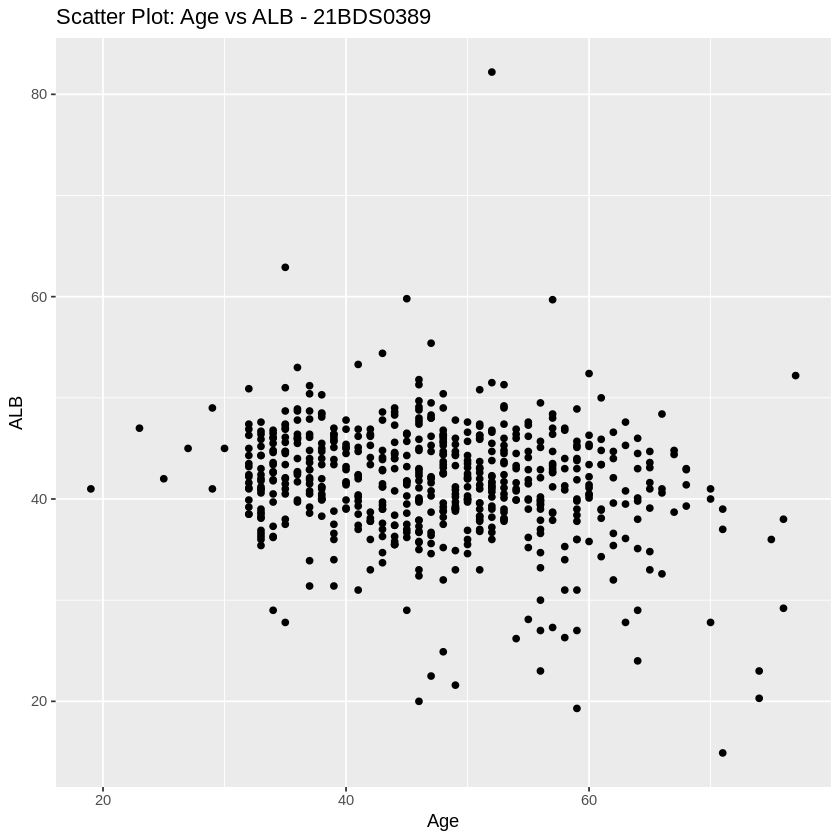

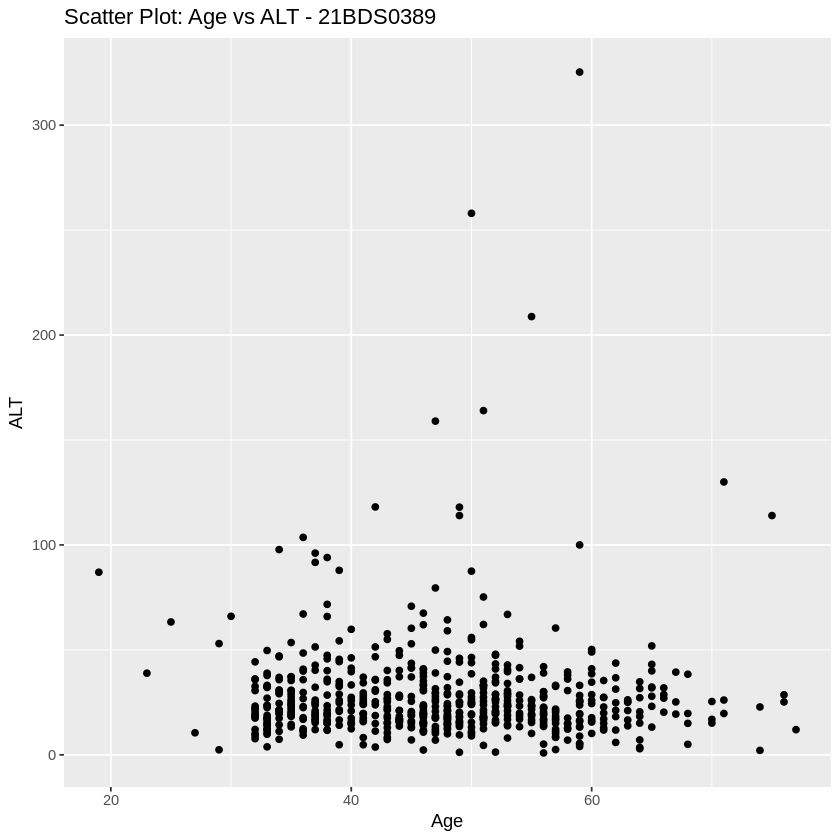

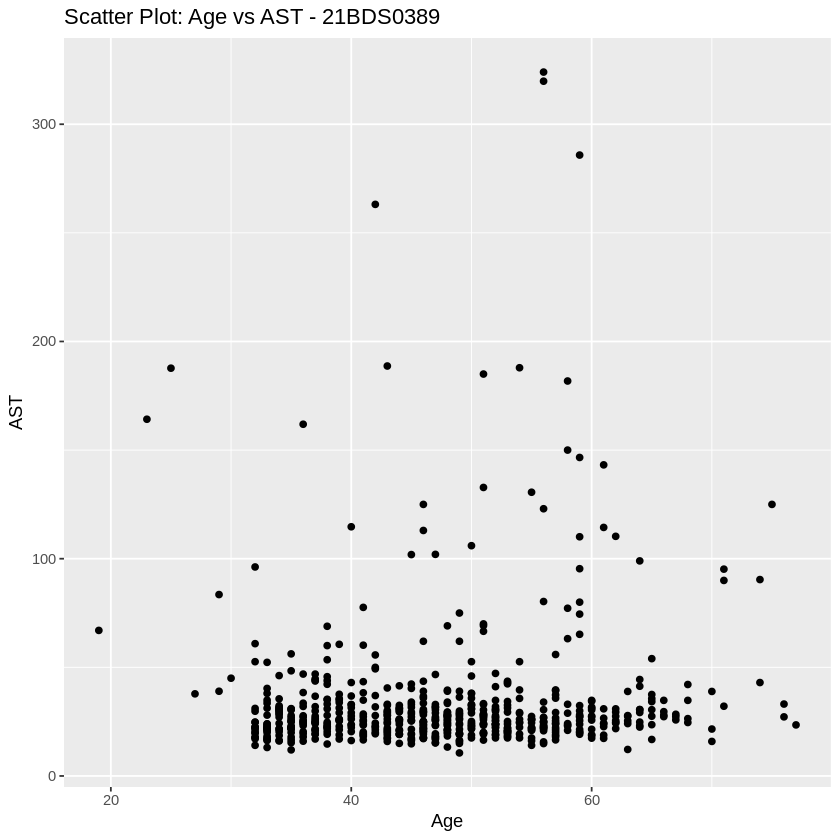

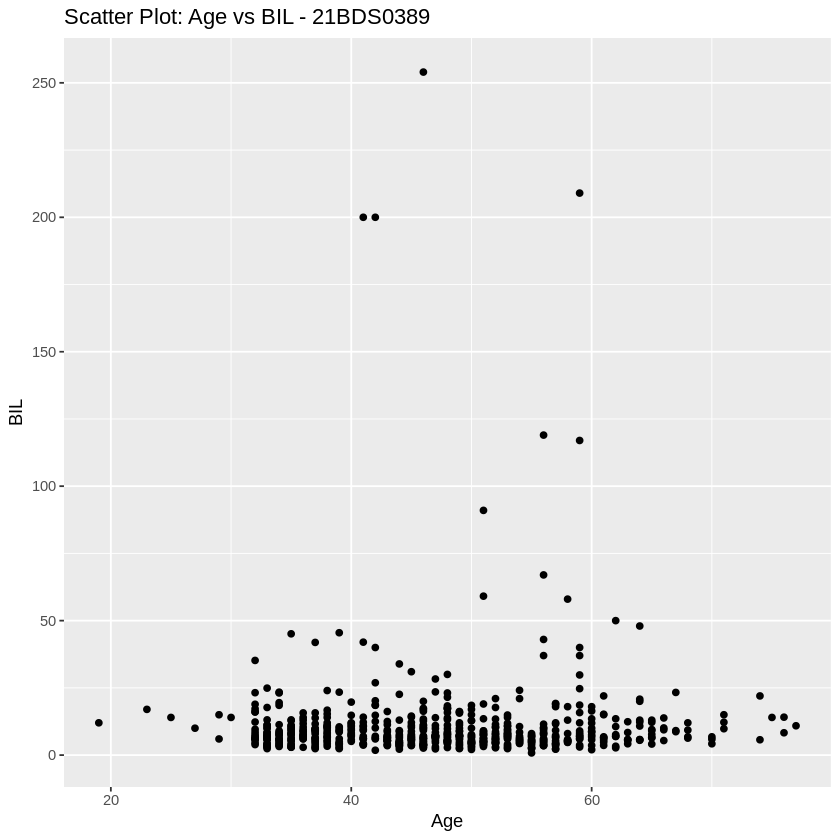

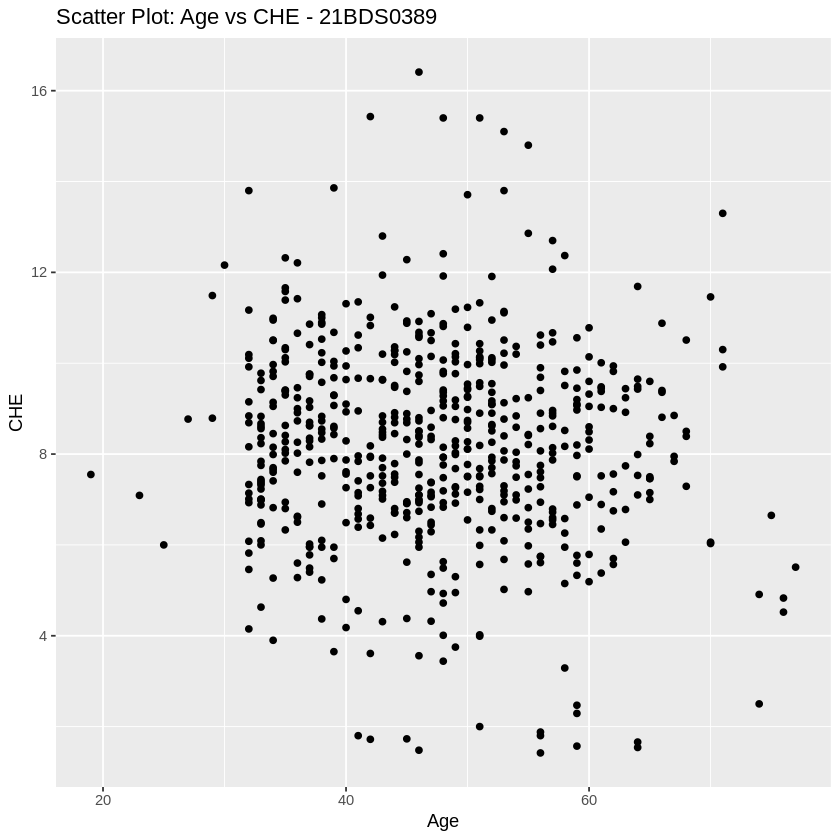

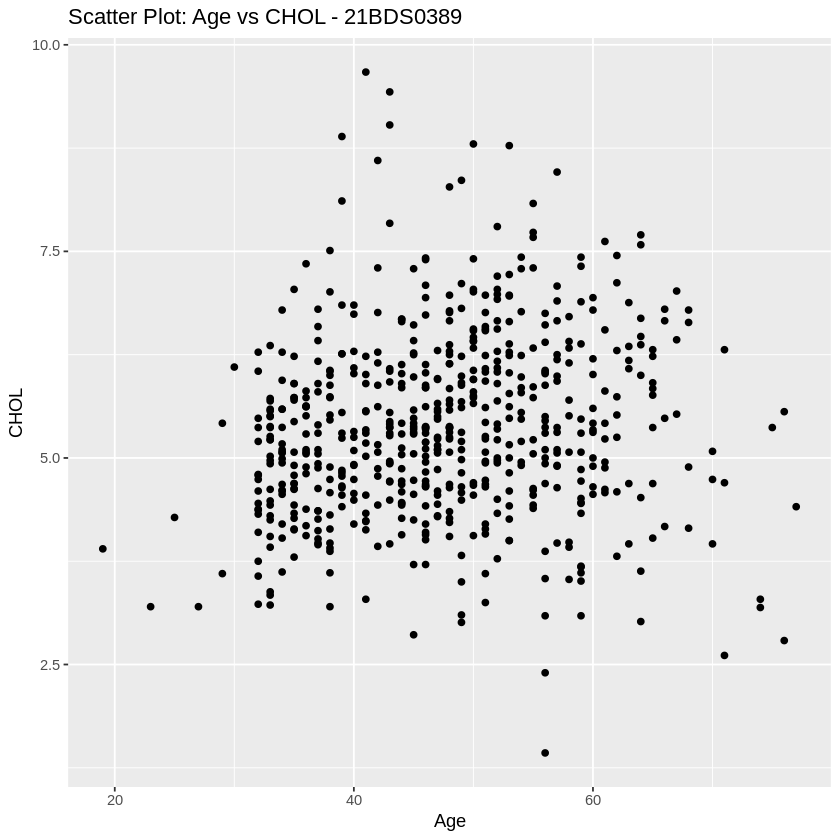

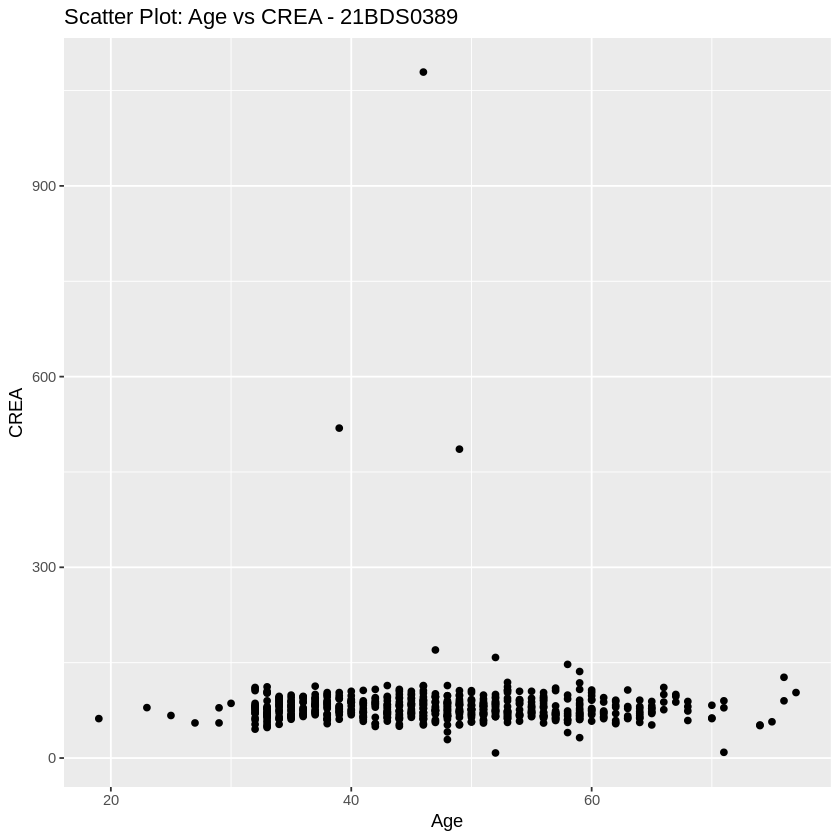

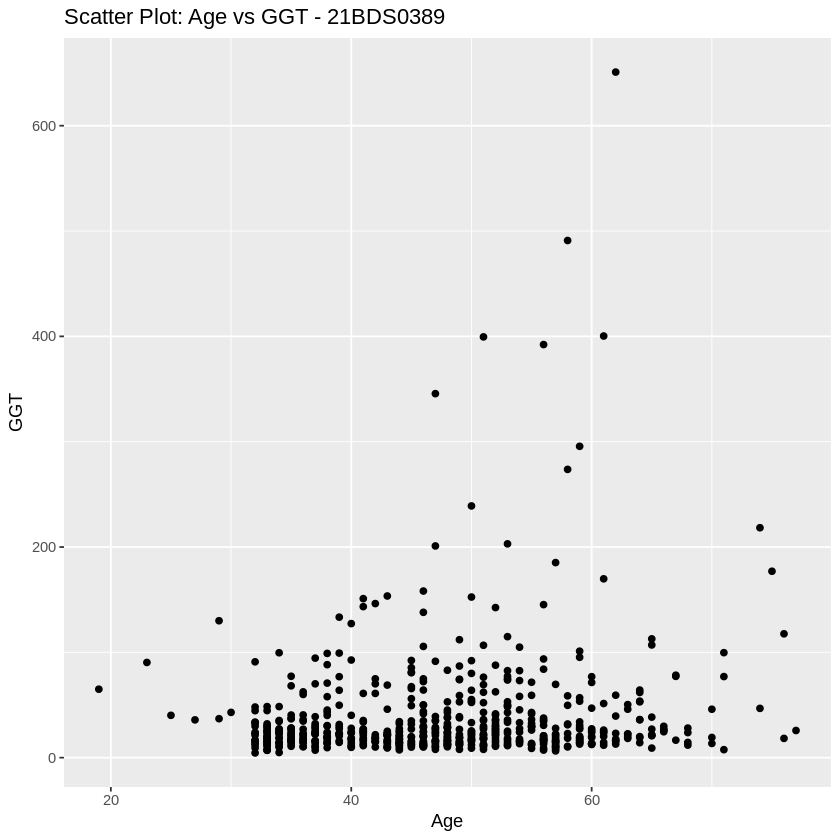

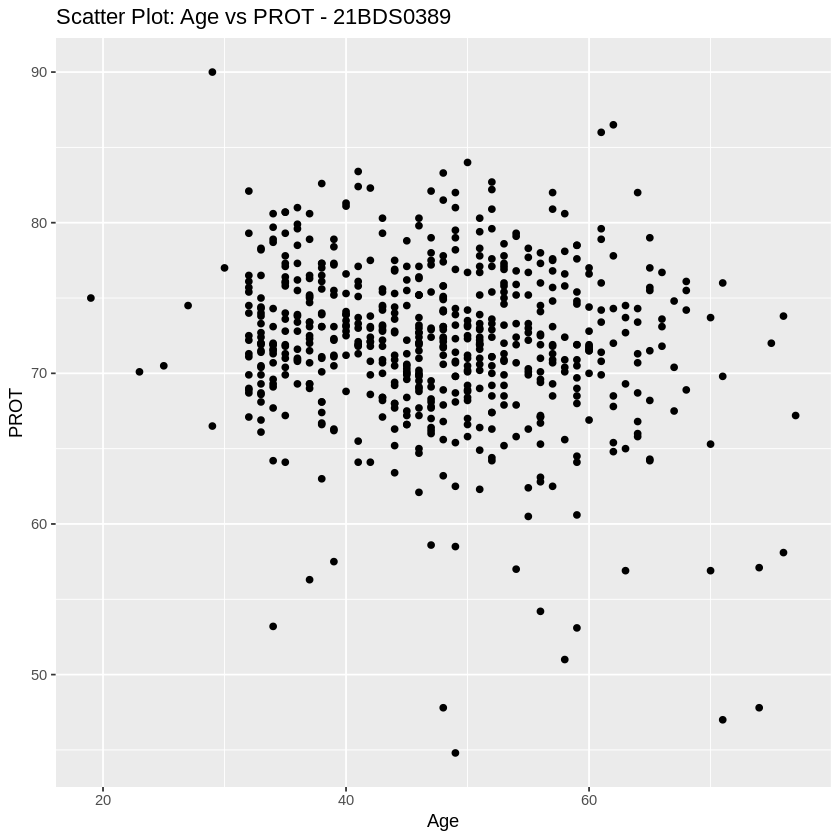

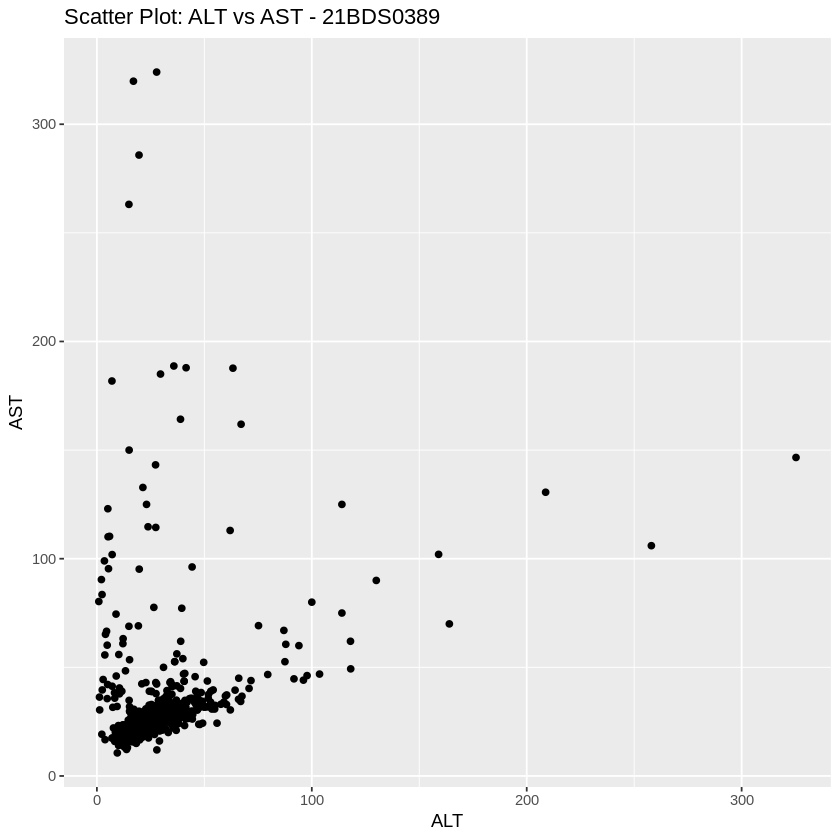

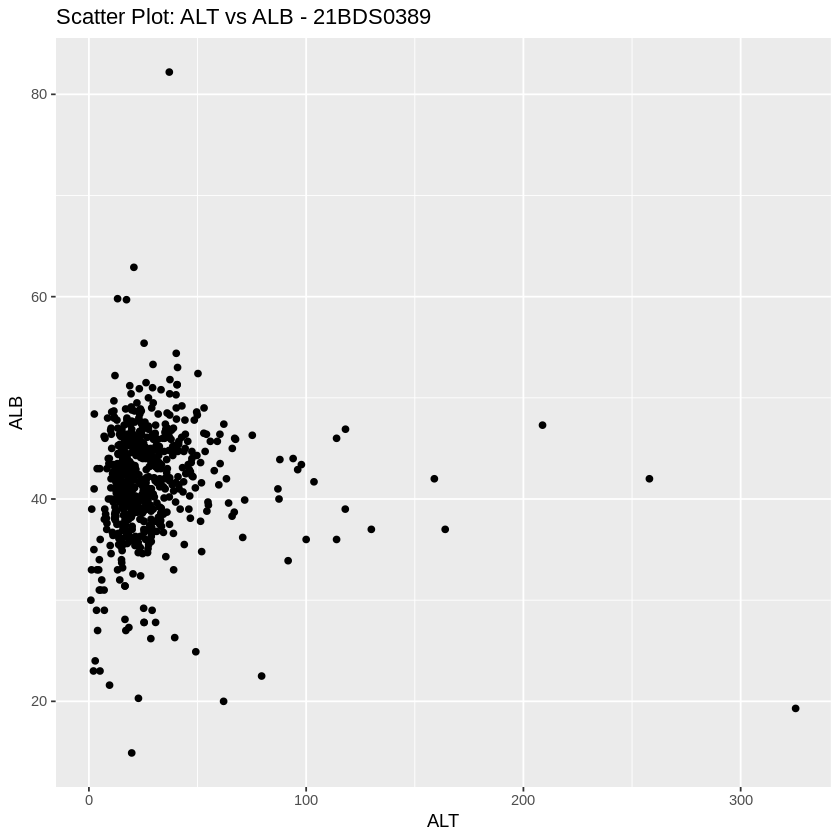

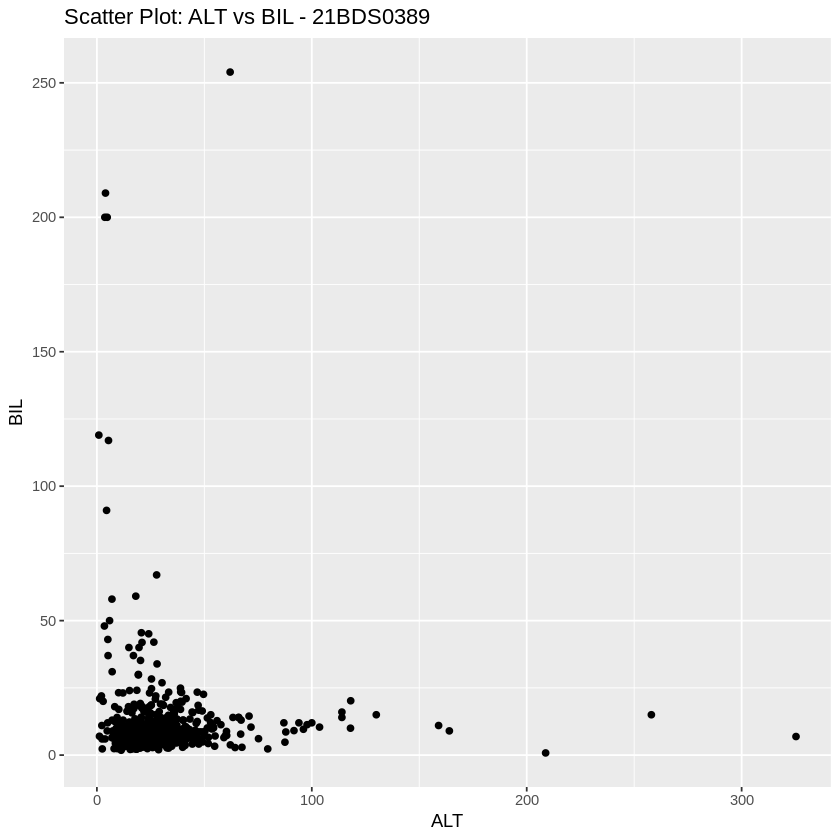

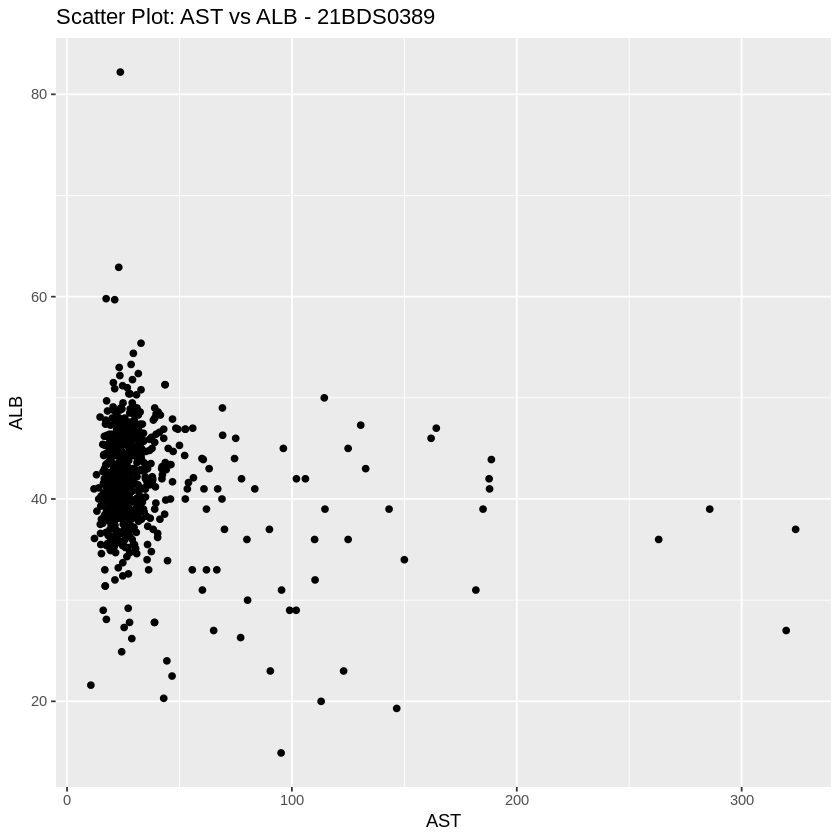

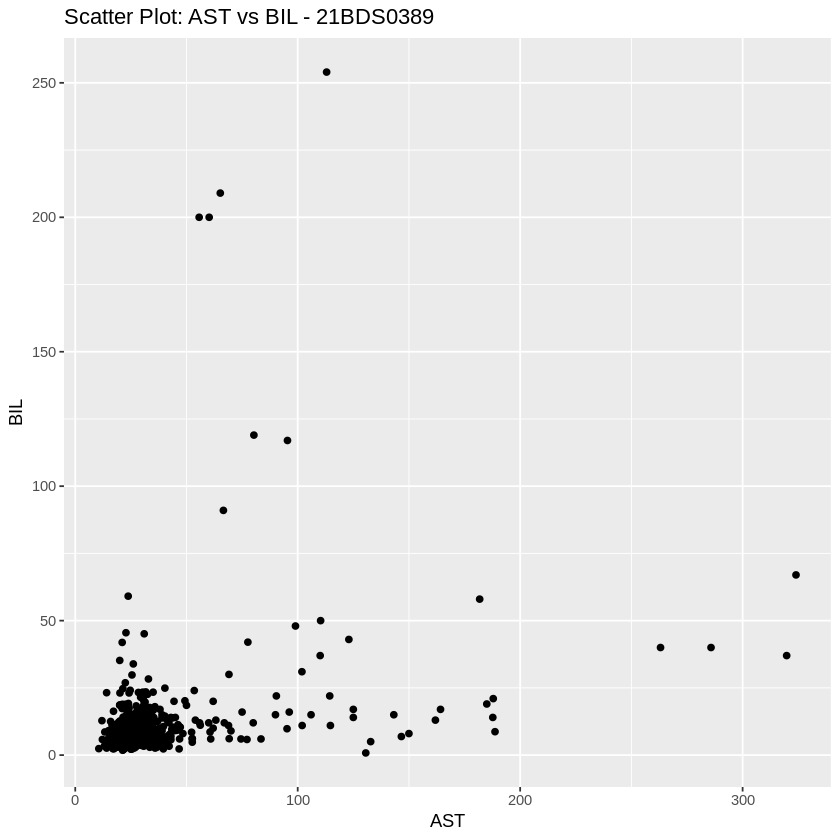

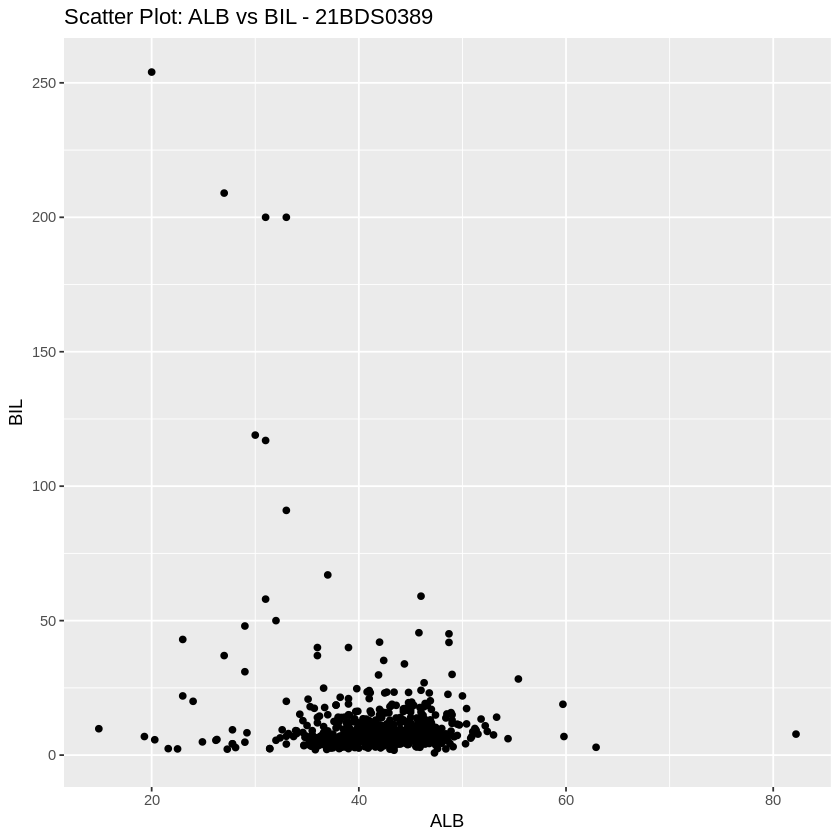

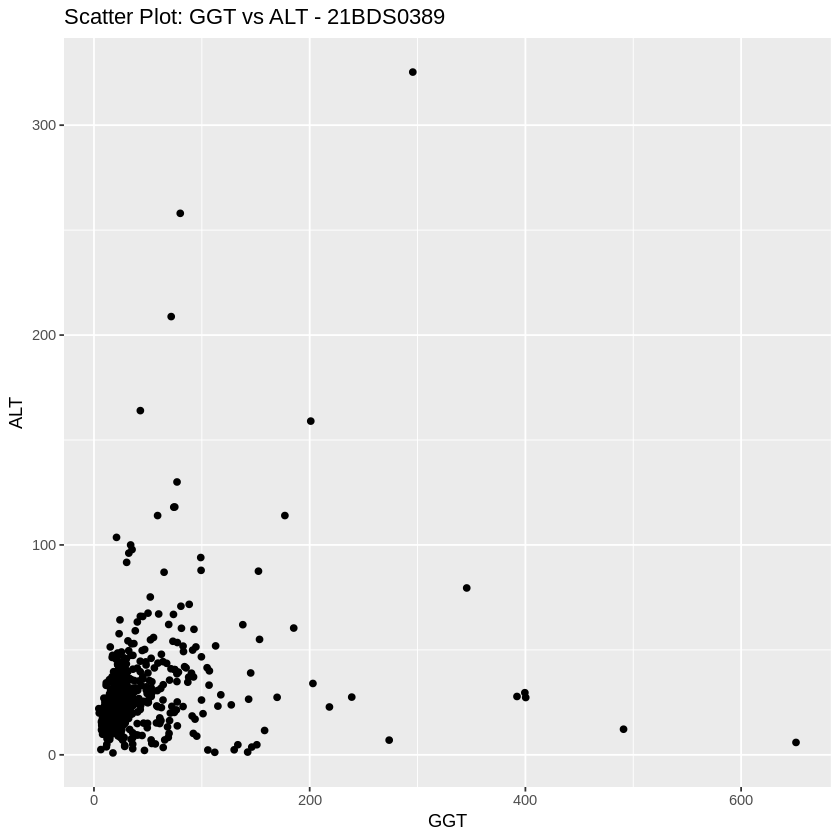

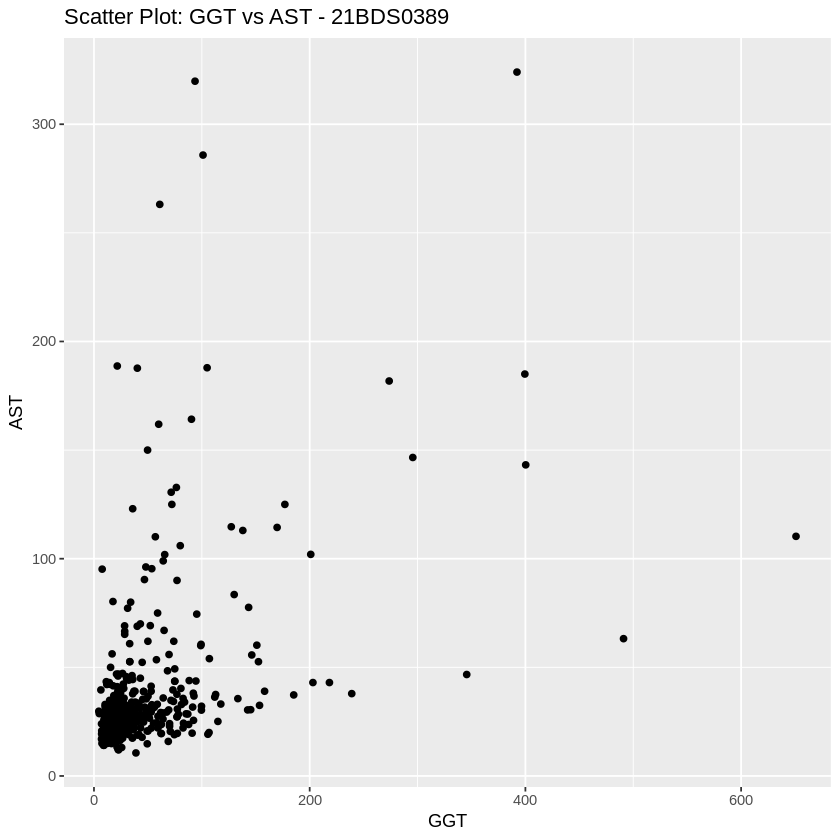

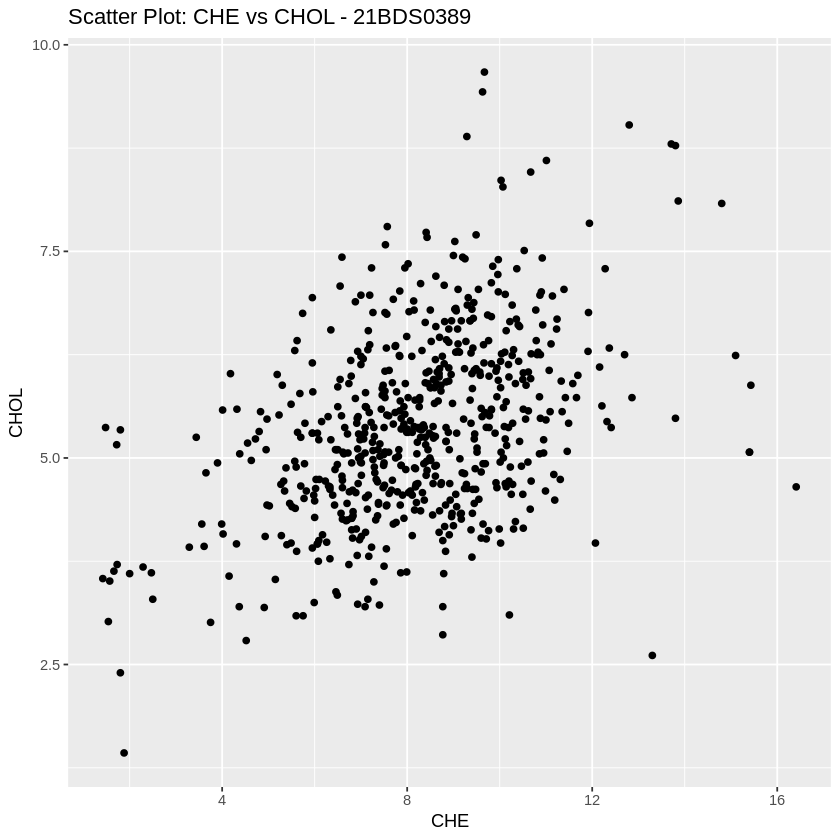

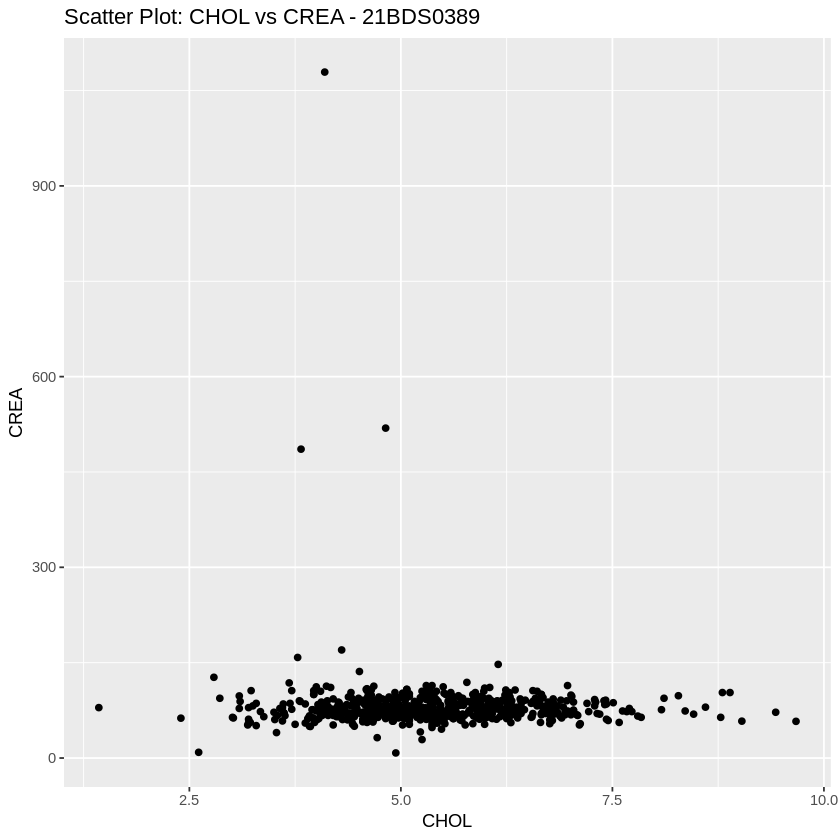

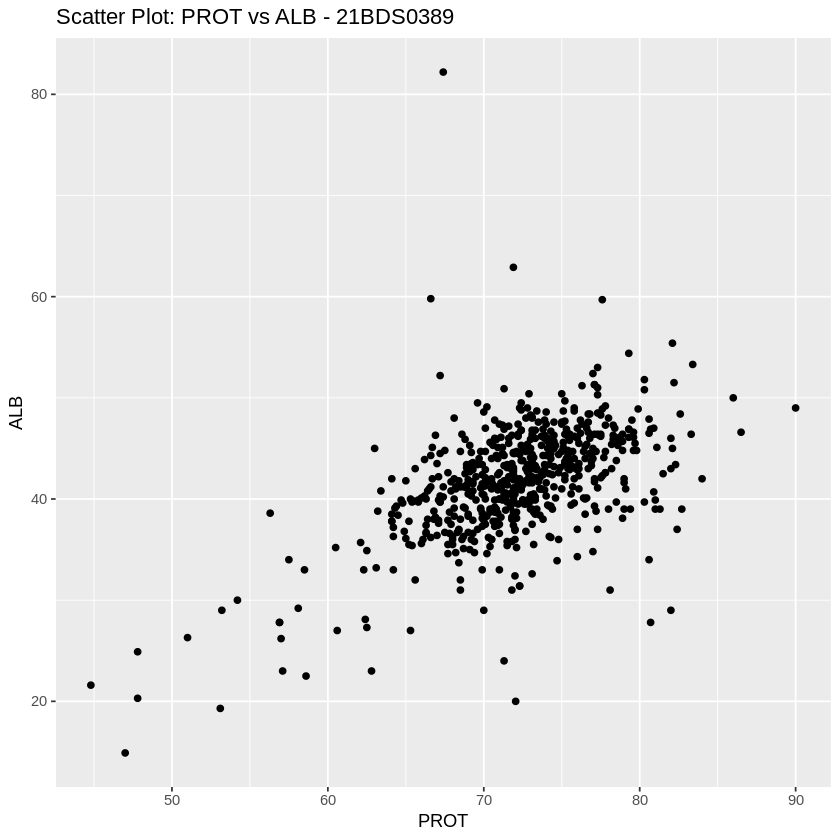

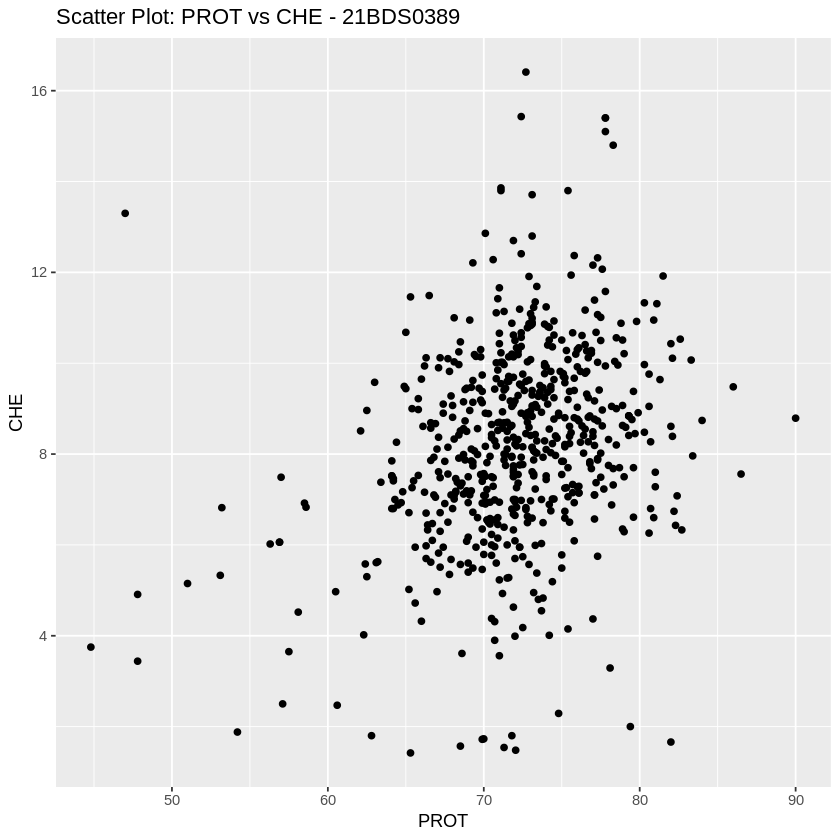

In [22]:
# Scatter plot matrix to visualize pairwise relationships
ggpairs(numeric_data, title = "Scatter Plot Matrix for Numeric Variables - 21BDS0389")

# Scatter Plot: Age vs ALB
ggplot(data_cleaned, aes(x=Age, y=ALB)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs ALB - 21BDS0389")

# Scatter Plot: Age vs ALT
ggplot(data_cleaned, aes(x=Age, y=ALT)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs ALT - 21BDS0389")

# Scatter Plot: Age vs AST
ggplot(data_cleaned, aes(x=Age, y=AST)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs AST - 21BDS0389")

# Scatter Plot: Age vs BIL
ggplot(data_cleaned, aes(x=Age, y=BIL)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs BIL - 21BDS0389")

# Scatter Plot: Age vs CHE
ggplot(data_cleaned, aes(x=Age, y=CHE)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs CHE - 21BDS0389")

# Scatter Plot: Age vs CHOL
ggplot(data_cleaned, aes(x=Age, y=CHOL)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs CHOL - 21BDS0389")

# Scatter Plot: Age vs CREA
ggplot(data_cleaned, aes(x=Age, y=CREA)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs CREA - 21BDS0389")

# Scatter Plot: Age vs GGT
ggplot(data_cleaned, aes(x=Age, y=GGT)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs GGT - 21BDS0389")

# Scatter Plot: Age vs PROT
ggplot(data_cleaned, aes(x=Age, y=PROT)) +
  geom_point() +
  ggtitle("Scatter Plot: Age vs PROT - 21BDS0389")

# Scatter Plot: ALT vs AST
ggplot(data_cleaned, aes(x=ALT, y=AST)) +
  geom_point() +
  ggtitle("Scatter Plot: ALT vs AST - 21BDS0389")

# Scatter Plot: ALT vs ALB
ggplot(data_cleaned, aes(x=ALT, y=ALB)) +
  geom_point() +
  ggtitle("Scatter Plot: ALT vs ALB - 21BDS0389")

# Scatter Plot: ALT vs BIL
ggplot(data_cleaned, aes(x=ALT, y=BIL)) +
  geom_point() +
  ggtitle("Scatter Plot: ALT vs BIL - 21BDS0389")

# Scatter Plot: AST vs ALB
ggplot(data_cleaned, aes(x=AST, y=ALB)) +
  geom_point() +
  ggtitle("Scatter Plot: AST vs ALB - 21BDS0389")

# Scatter Plot: AST vs BIL
ggplot(data_cleaned, aes(x=AST, y=BIL)) +
  geom_point() +
  ggtitle("Scatter Plot: AST vs BIL - 21BDS0389")

# Scatter Plot: ALB vs BIL
ggplot(data_cleaned, aes(x=ALB, y=BIL)) +
  geom_point() +
  ggtitle("Scatter Plot: ALB vs BIL - 21BDS0389")

# Scatter Plot: GGT vs ALT
ggplot(data_cleaned, aes(x=GGT, y=ALT)) +
  geom_point() +
  ggtitle("Scatter Plot: GGT vs ALT - 21BDS0389")

# Scatter Plot: GGT vs AST
ggplot(data_cleaned, aes(x=GGT, y=AST)) +
  geom_point() +
  ggtitle("Scatter Plot: GGT vs AST - 21BDS0389")

# Scatter Plot: CHE vs CHOL
ggplot(data_cleaned, aes(x=CHE, y=CHOL)) +
  geom_point() +
  ggtitle("Scatter Plot: CHE vs CHOL - 21BDS0389")

# Scatter Plot: CHOL vs CREA
ggplot(data_cleaned, aes(x=CHOL, y=CREA)) +
  geom_point() +
  ggtitle("Scatter Plot: CHOL vs CREA - 21BDS0389")

# Scatter Plot: PROT vs ALB
ggplot(data_cleaned, aes(x=PROT, y=ALB)) +
  geom_point() +
  ggtitle("Scatter Plot: PROT vs ALB - 21BDS0389")

# Scatter Plot: PROT vs CHE
ggplot(data_cleaned, aes(x=PROT, y=CHE)) +
  geom_point() +
  ggtitle("Scatter Plot: PROT vs CHE - 21BDS0389")


##### Categorical vs Numeric: Boxplots and Group Statistics

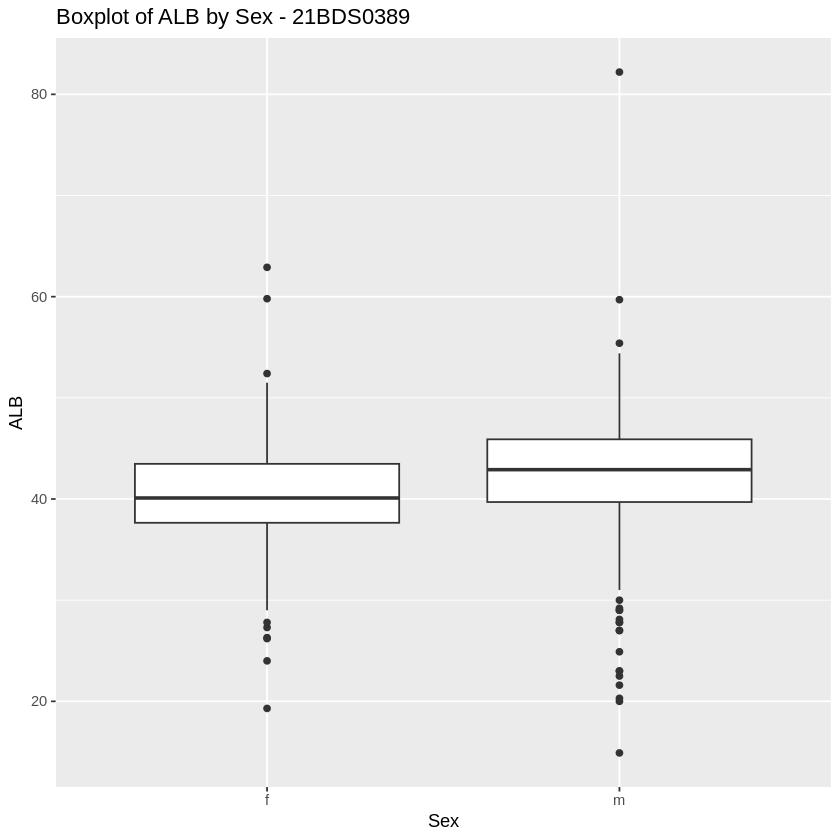

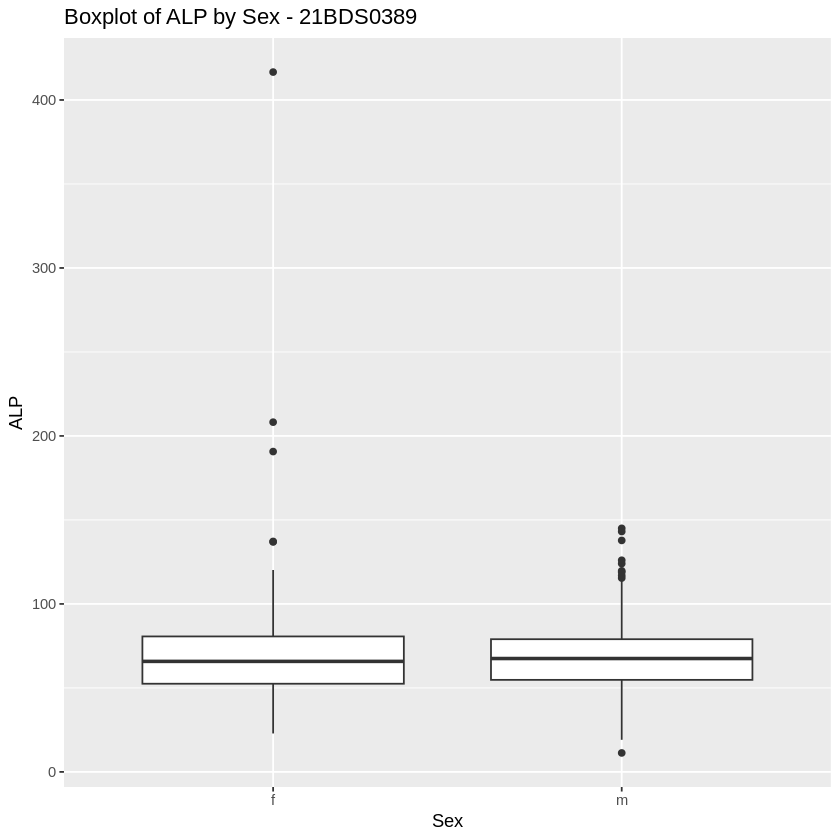

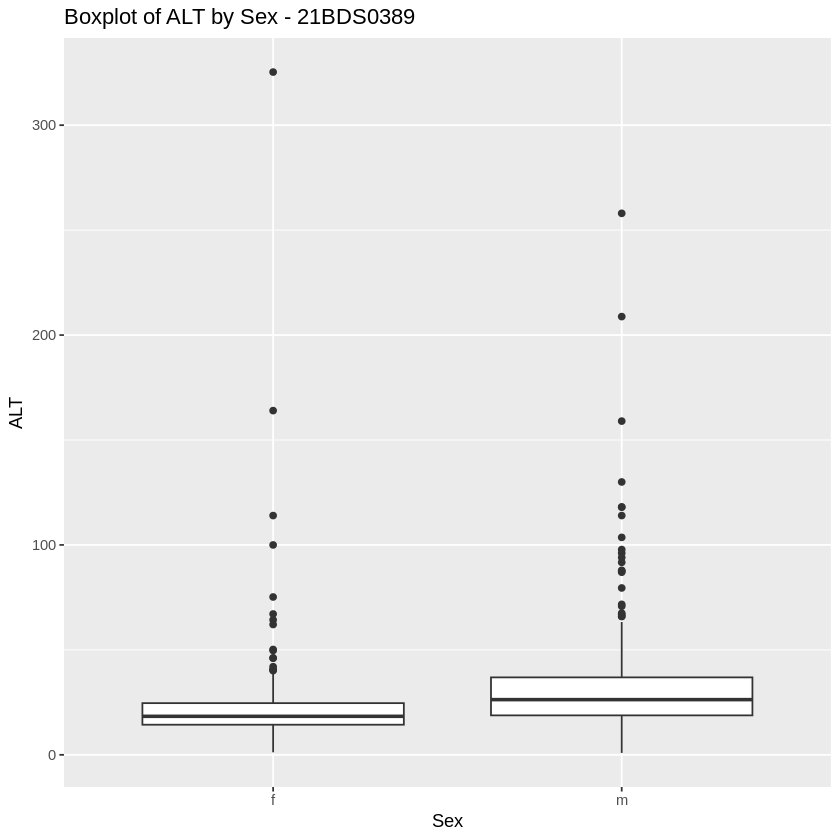

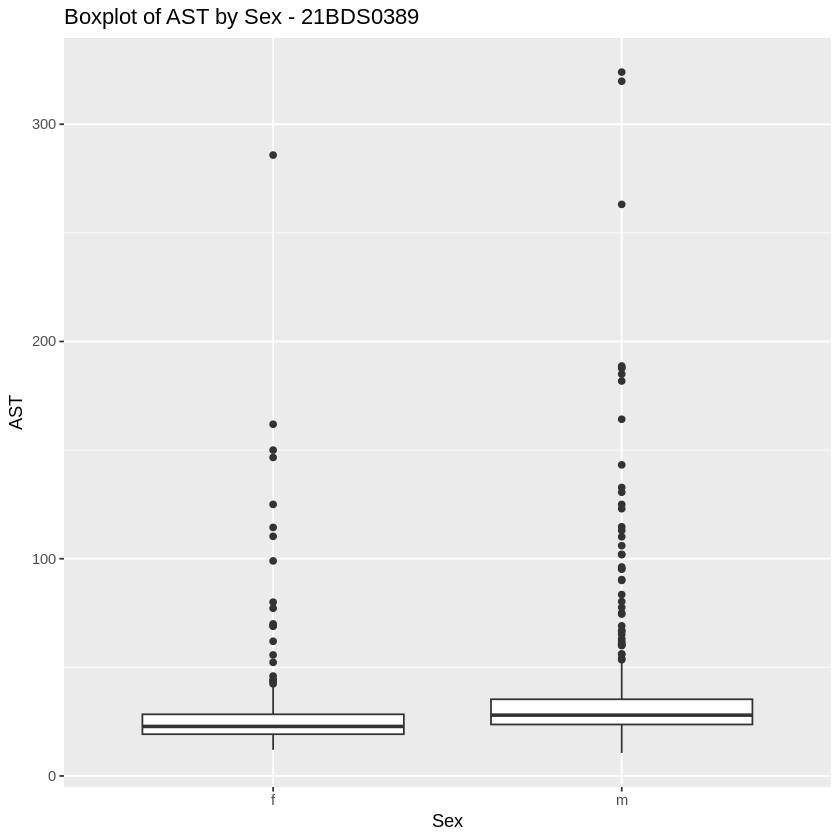

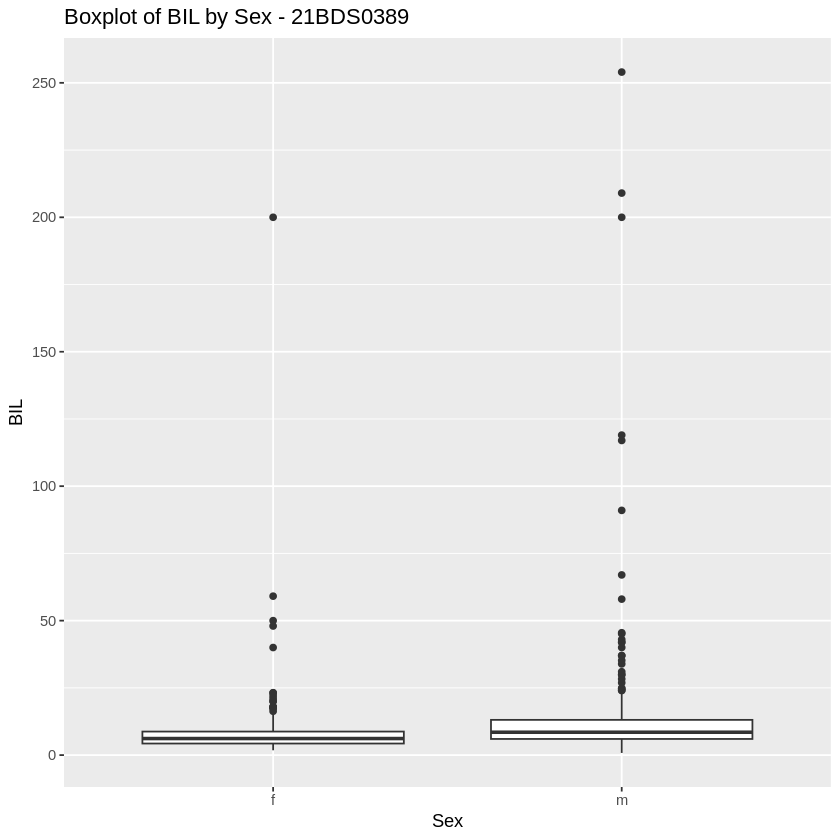

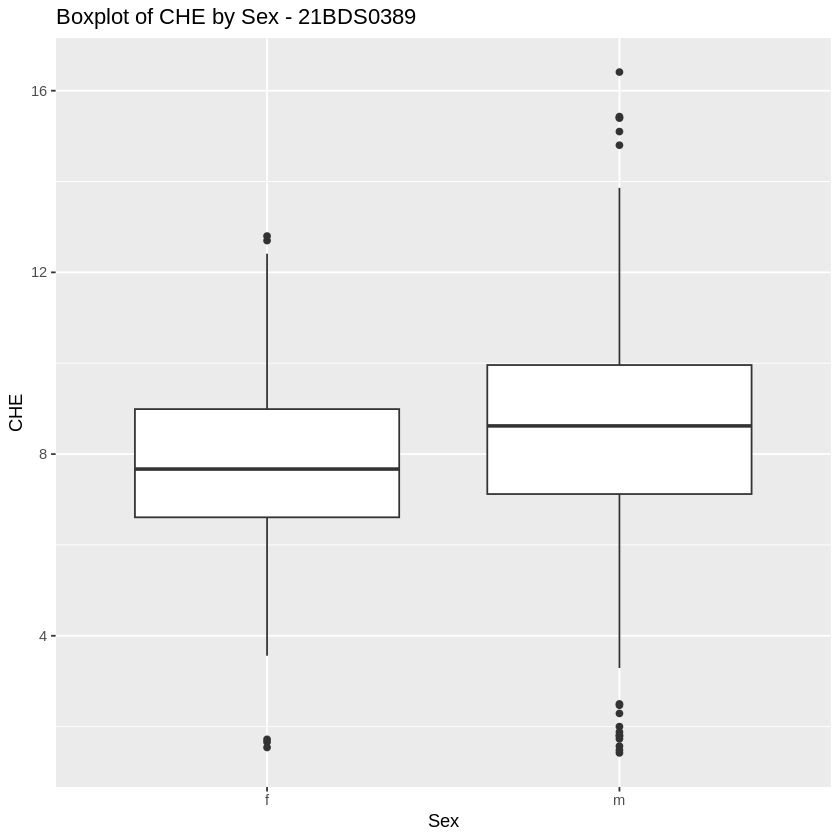

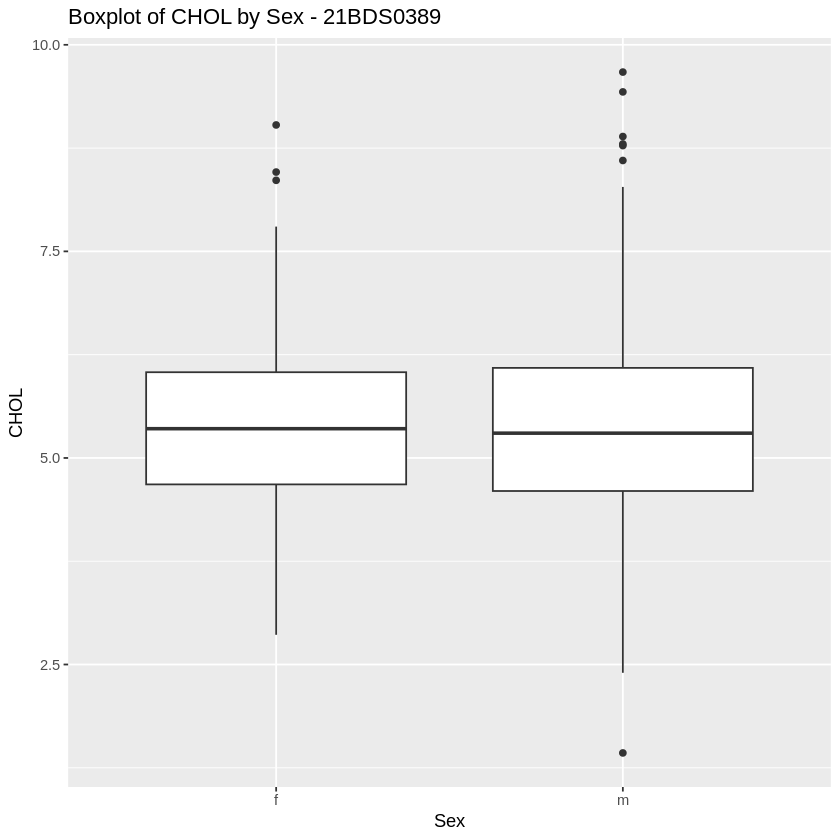

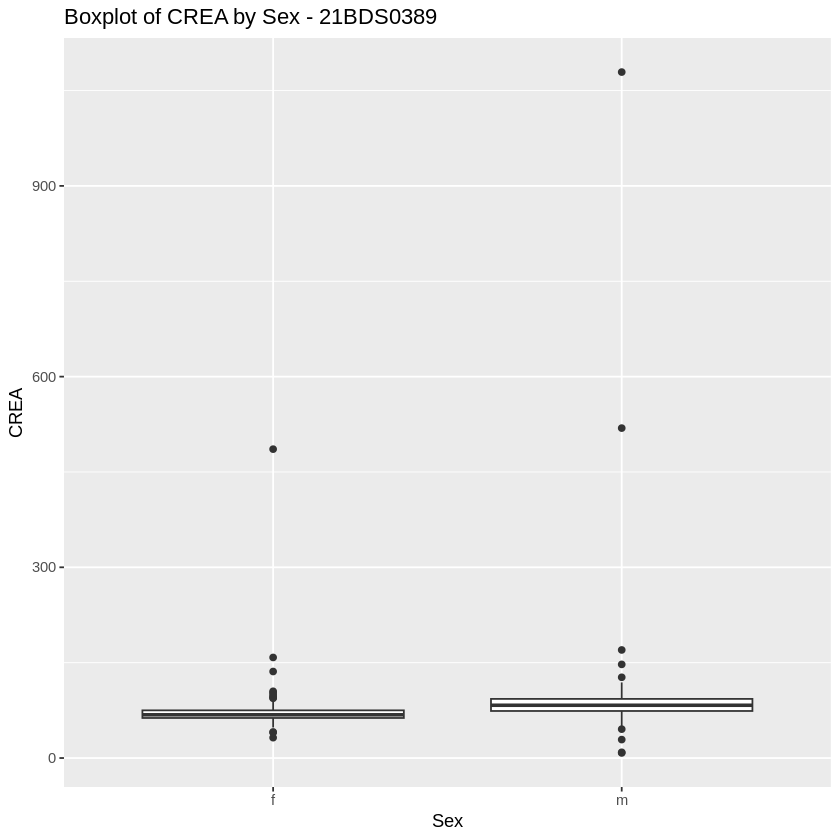

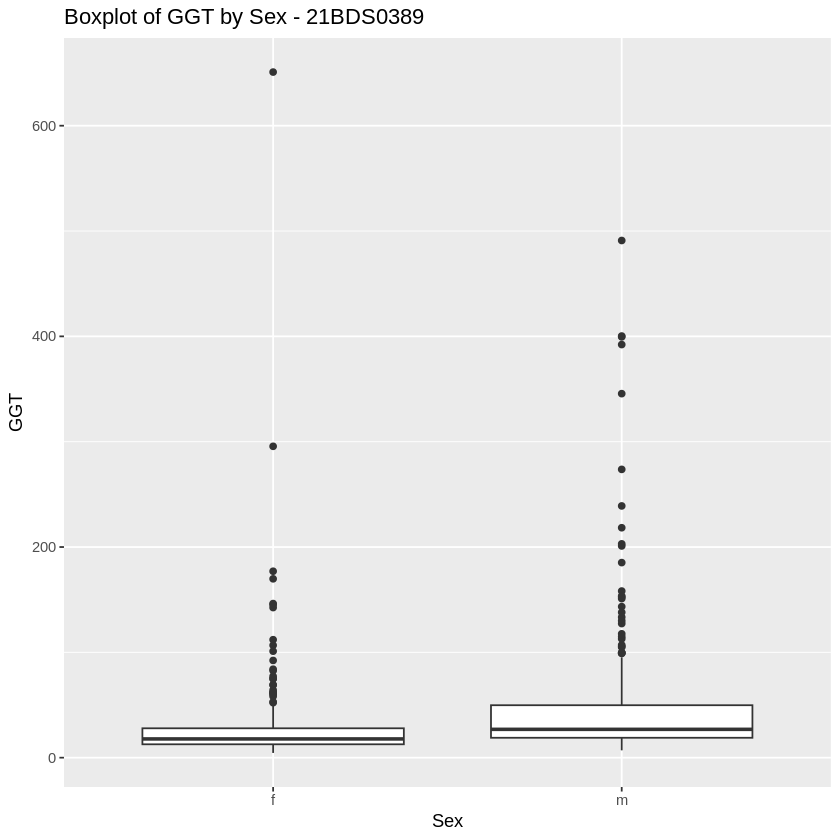

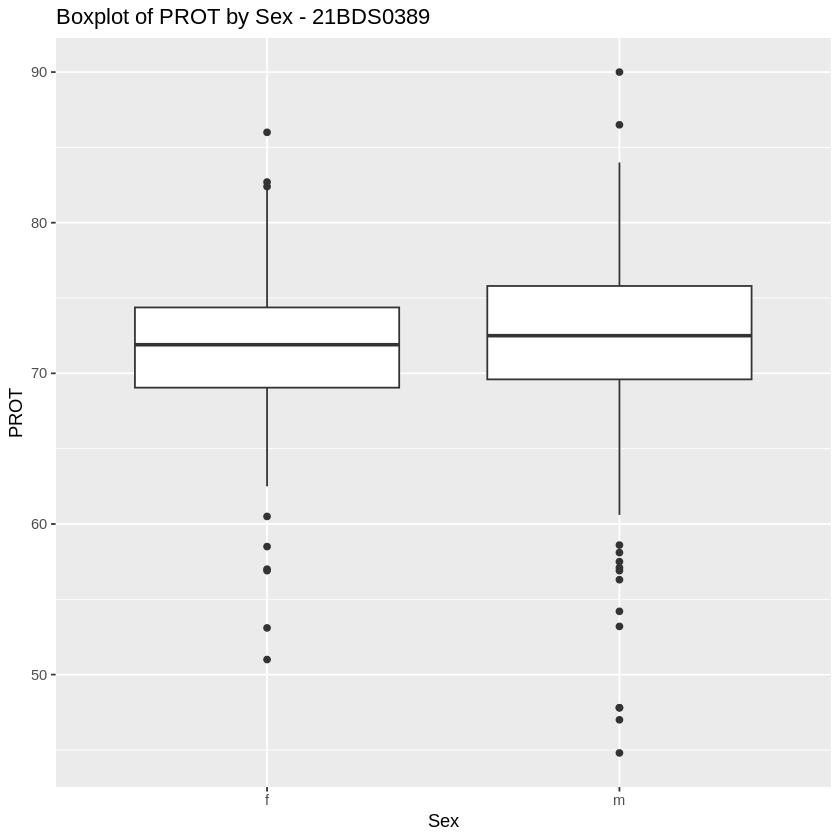

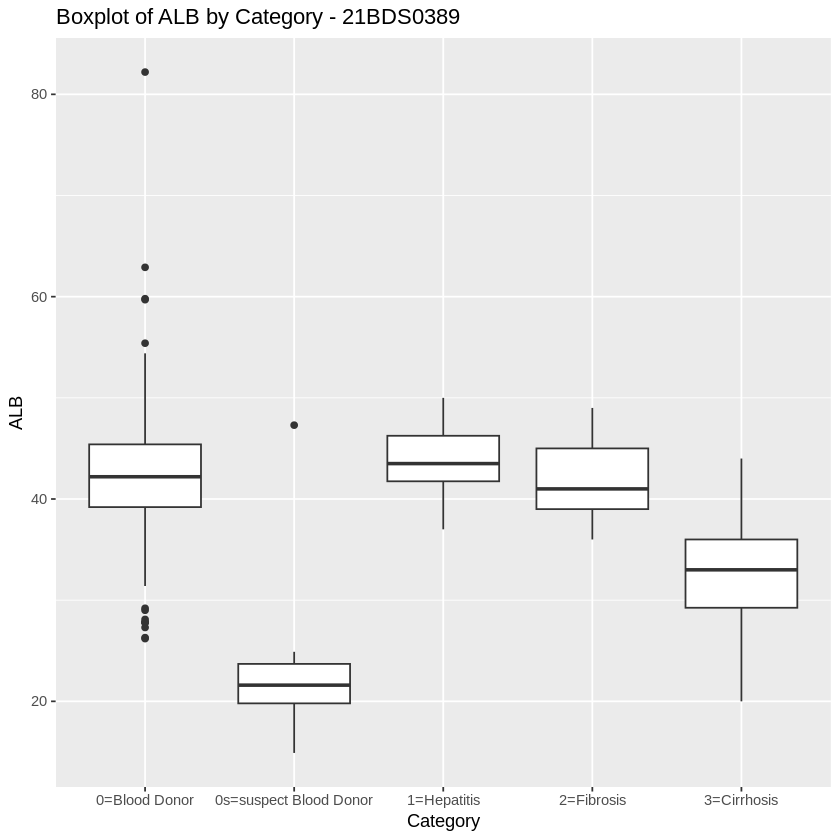

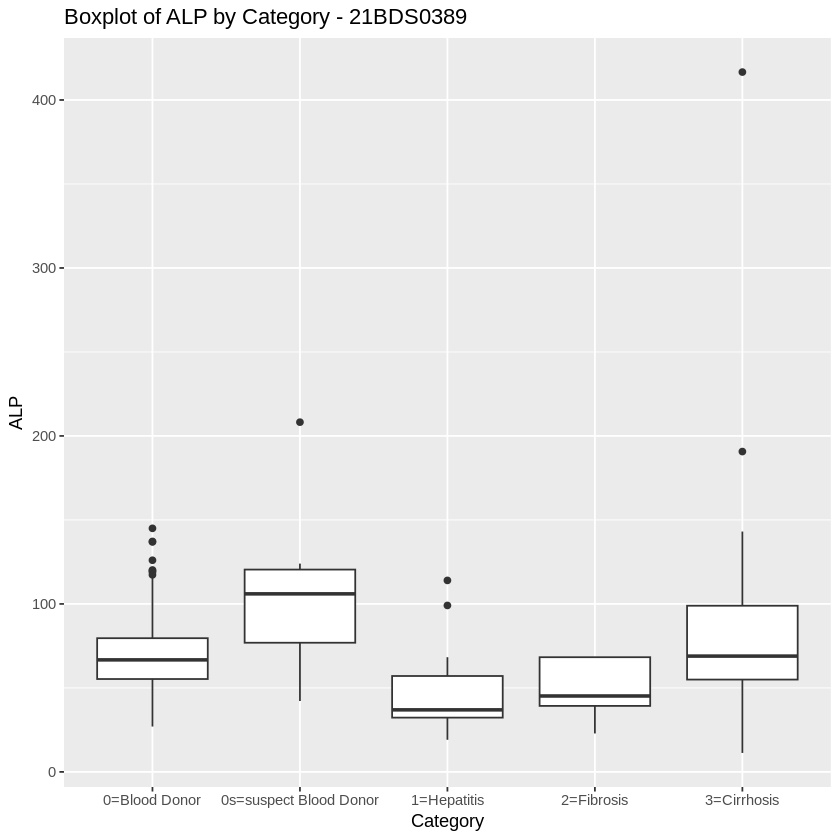

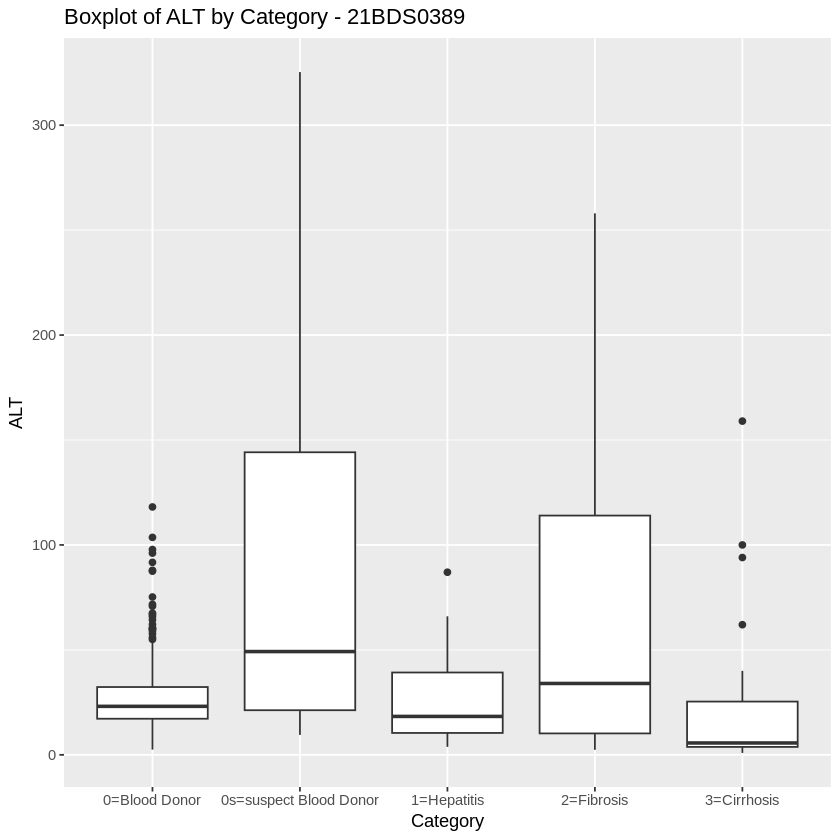

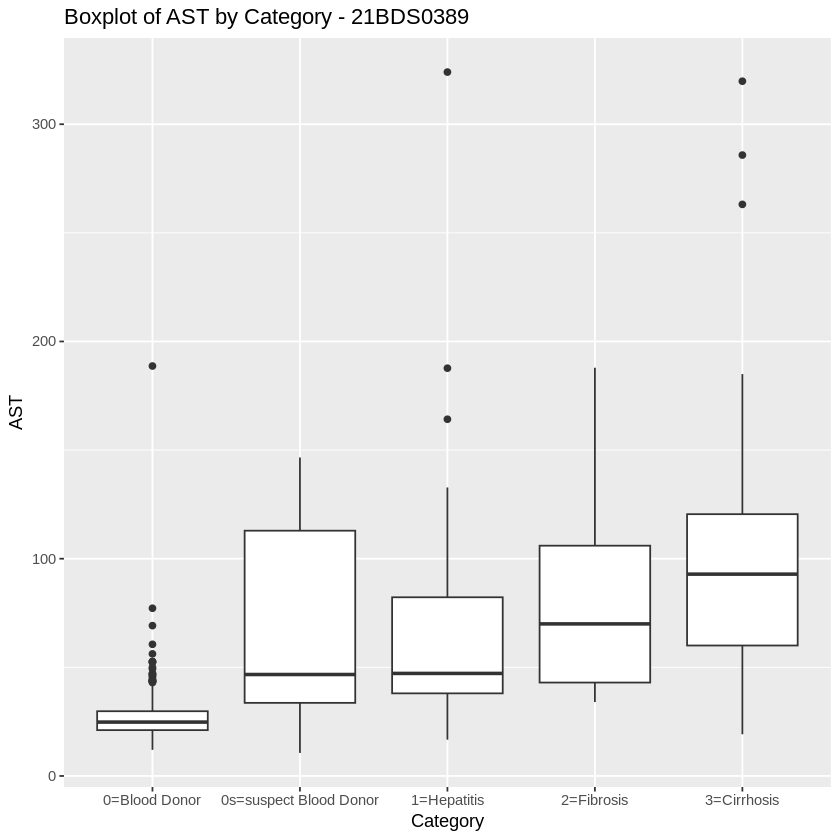

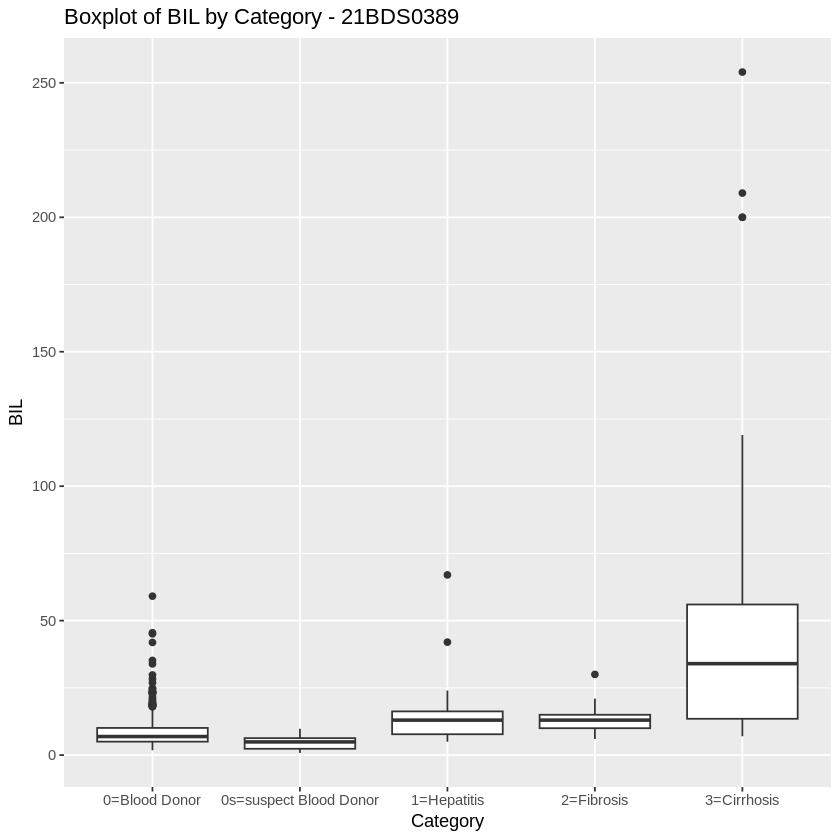

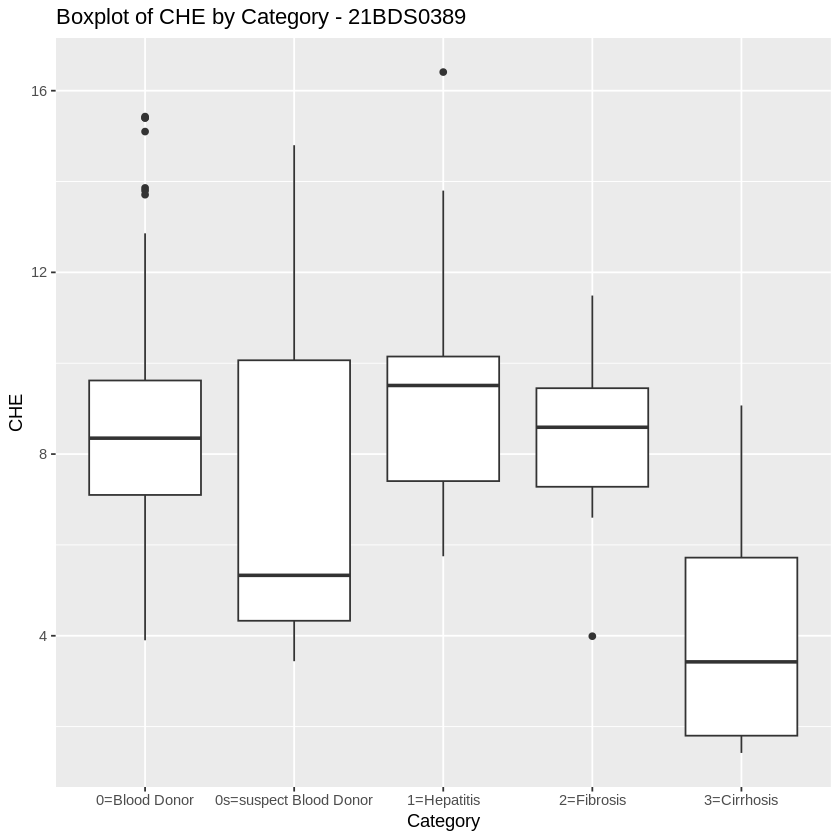

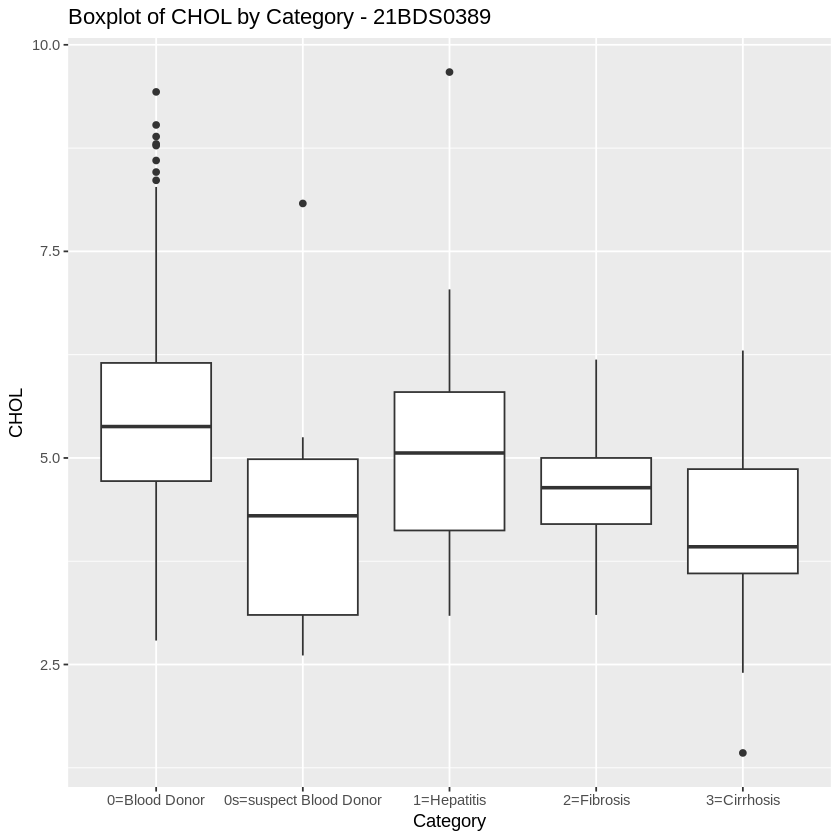

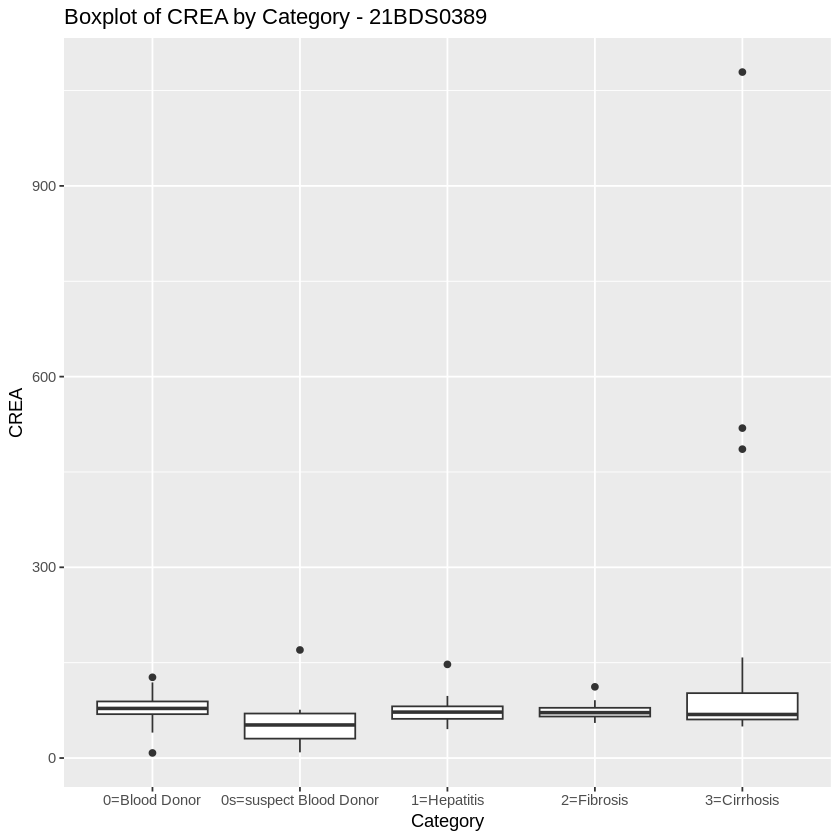

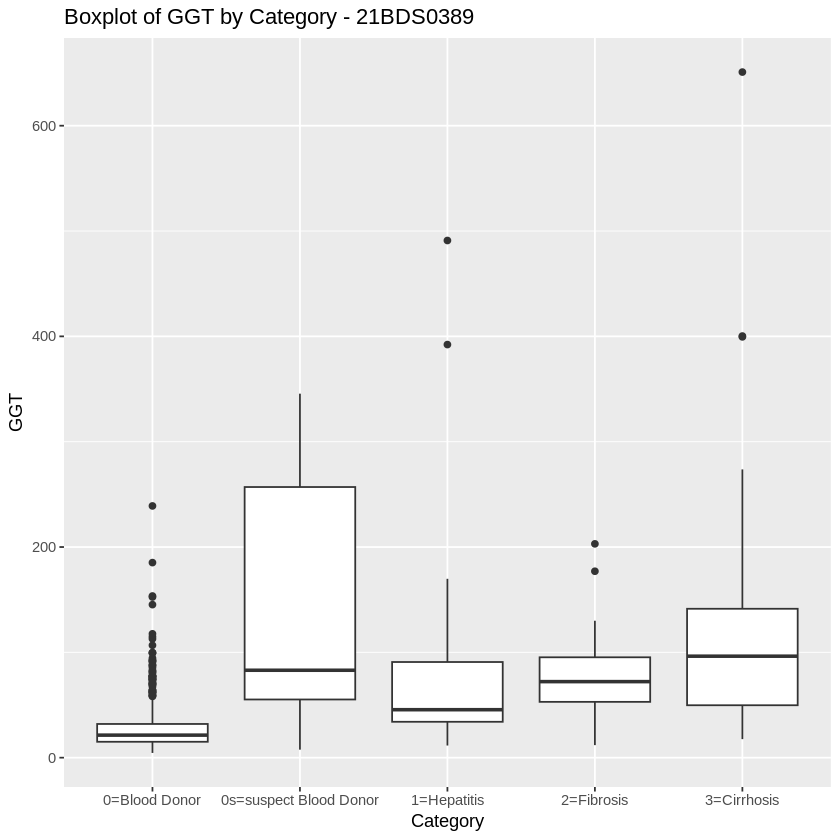

Category               ALB      ALP       ALT       AST       BIL      
1 0=Blood Donor          42.23827  68.36510  26.63152  26.54916  8.527580
2 0s=suspect Blood Donor 24.40000 107.30000 102.11429  71.00000  4.685714
3 1=Hepatitis            43.83333  45.38549  26.96462  75.73333 15.625000
4 2=Fibrosis             41.76190  50.88835  59.60000  81.17143 13.428571
5 3=Cirrhosis            32.78734  88.23345  22.97000 107.45667 59.133333
  CHE      CHOL     CREA      GGT       PROT    
1 8.398086 5.492658  78.97749  29.03677 72.11126
2 7.480000 4.451429  61.71429 151.51429 53.91429
3 9.283750 5.099167  73.95833  92.57917 74.70000
4 8.334762 4.632290  73.49048  79.55238 76.10000
5 3.818333 4.099207 138.22333 129.44000 70.11814

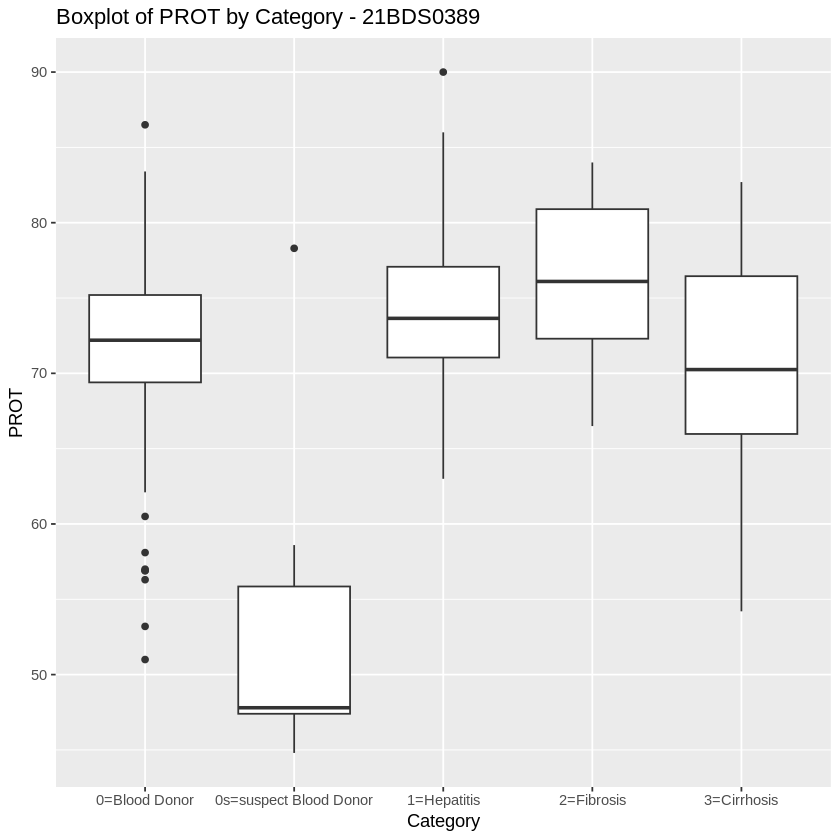

In [23]:
# Boxplot: Numeric vs Categorical by Sex
ggplot(data_cleaned, aes(x=Sex, y=ALB)) +
  geom_boxplot() +
  ggtitle("Boxplot of ALB by Sex - 21BDS0389")

ggplot(data_cleaned, aes(x=Sex, y=ALP)) +
  geom_boxplot() +
  ggtitle("Boxplot of ALP by Sex - 21BDS0389")

ggplot(data_cleaned, aes(x=Sex, y=ALT)) +
  geom_boxplot() +
  ggtitle("Boxplot of ALT by Sex - 21BDS0389")

ggplot(data_cleaned, aes(x=Sex, y=AST)) +
  geom_boxplot() +
  ggtitle("Boxplot of AST by Sex - 21BDS0389")

ggplot(data_cleaned, aes(x=Sex, y=BIL)) +
  geom_boxplot() +
  ggtitle("Boxplot of BIL by Sex - 21BDS0389")

ggplot(data_cleaned, aes(x=Sex, y=CHE)) +
  geom_boxplot() +
  ggtitle("Boxplot of CHE by Sex - 21BDS0389")

ggplot(data_cleaned, aes(x=Sex, y=CHOL)) +
  geom_boxplot() +
  ggtitle("Boxplot of CHOL by Sex - 21BDS0389")

ggplot(data_cleaned, aes(x=Sex, y=CREA)) +
  geom_boxplot() +
  ggtitle("Boxplot of CREA by Sex - 21BDS0389")

ggplot(data_cleaned, aes(x=Sex, y=GGT)) +
  geom_boxplot() +
  ggtitle("Boxplot of GGT by Sex - 21BDS0389")

ggplot(data_cleaned, aes(x=Sex, y=PROT)) +
  geom_boxplot() +
  ggtitle("Boxplot of PROT by Sex - 21BDS0389")

# Boxplot: Numeric vs Categorical by Category
ggplot(data_cleaned, aes(x=Category, y=ALB)) +
  geom_boxplot() +
  ggtitle("Boxplot of ALB by Category - 21BDS0389")

ggplot(data_cleaned, aes(x=Category, y=ALP)) +
  geom_boxplot() +
  ggtitle("Boxplot of ALP by Category - 21BDS0389")

ggplot(data_cleaned, aes(x=Category, y=ALT)) +
  geom_boxplot() +
  ggtitle("Boxplot of ALT by Category - 21BDS0389")

ggplot(data_cleaned, aes(x=Category, y=AST)) +
  geom_boxplot() +
  ggtitle("Boxplot of AST by Category - 21BDS0389")

ggplot(data_cleaned, aes(x=Category, y=BIL)) +
  geom_boxplot() +
  ggtitle("Boxplot of BIL by Category - 21BDS0389")

ggplot(data_cleaned, aes(x=Category, y=CHE)) +
  geom_boxplot() +
  ggtitle("Boxplot of CHE by Category - 21BDS0389")

ggplot(data_cleaned, aes(x=Category, y=CHOL)) +
  geom_boxplot() +
  ggtitle("Boxplot of CHOL by Category - 21BDS0389")

ggplot(data_cleaned, aes(x=Category, y=CREA)) +
  geom_boxplot() +
  ggtitle("Boxplot of CREA by Category - 21BDS0389")

ggplot(data_cleaned, aes(x=Category, y=GGT)) +
  geom_boxplot() +
  ggtitle("Boxplot of GGT by Category - 21BDS0389")

ggplot(data_cleaned, aes(x=Category, y=PROT)) +
  geom_boxplot() +
  ggtitle("Boxplot of PROT by Category - 21BDS0389")

# Group statistics
aggregate(cbind(ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT) ~ Category, data=data_cleaned, FUN=mean, na.rm=TRUE)

##### Categorical vs Categorical: Contingency Tables and Chi-square Test

In [24]:
table_sex_category <- table(data_cleaned$Sex, data_cleaned$Category)
print(table_sex_category)

# Perform Chi-square test to test independence between Sex and Category
chisq_test <- chisq.test(table_sex_category)
print(chisq_test)

   
    0=Blood Donor 0s=suspect Blood Donor 1=Hepatitis 2=Fibrosis 3=Cirrhosis
  f           215                      1           4          8          10
  m           318                      6          20         13          20


Warning message in chisq.test(table_sex_category):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table_sex_category
X-squared = 7.6402, df = 4, p-value = 0.1057



### Multivariate Analysis

##### Correlation Matrix for Numeric Variables

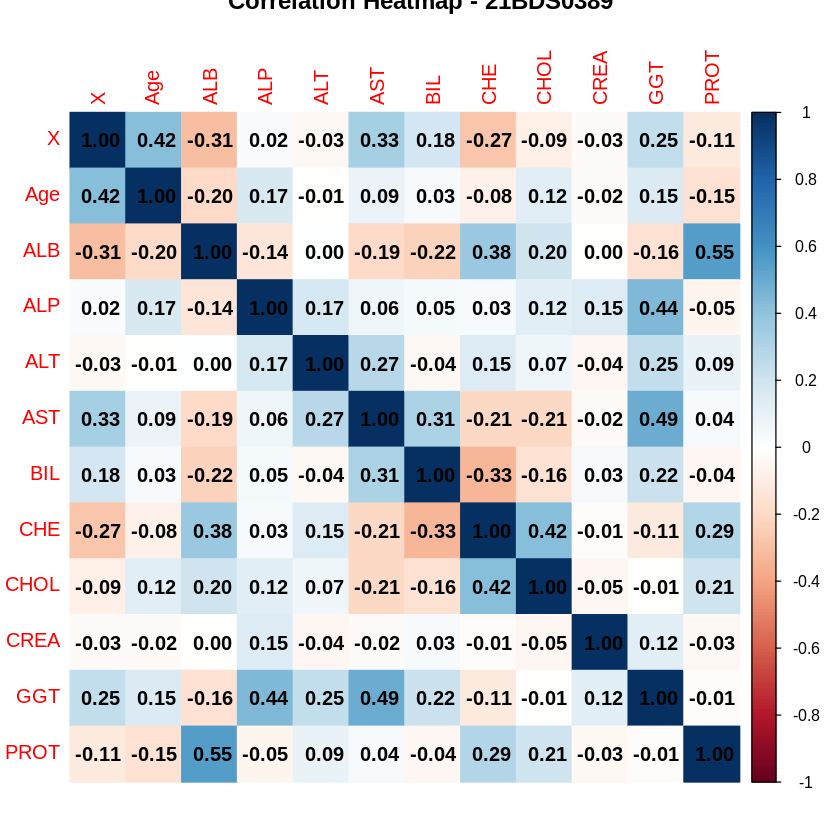

In [25]:
cor_matrix <- cor(numeric_data, use="complete.obs")

# Heatmap for correlation matrix
corrplot(cor_matrix, method = "color", title="Correlation Heatmap - 21BDS0389", addCoef.col = "black")

###### Multivariate Linear Regression

In [26]:
# Multivariate linear regression to predict ALT using Age, AST, and BIL
lm_model <- lm(ALT ~ Age + AST + BIL, data = data_cleaned)
summary(lm_model)


Call:
lm(formula = ALT ~ Age + AST + BIL, data = data_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.133  -9.906  -4.122   4.488 269.517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.52217    4.77351   5.347 1.27e-07 ***
Age         -0.07549    0.09792  -0.771 0.441058    
AST          0.24514    0.03130   7.831 2.15e-14 ***
BIL         -0.17725    0.05248  -3.378 0.000777 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.3 on 611 degrees of freedom
Multiple R-squared:  0.09257,	Adjusted R-squared:  0.08812 
F-statistic: 20.78 on 3 and 611 DF,  p-value: 7.887e-13


In [27]:
# Multivariate regression predicting AST using multiple predictors
lm_model_ast <- lm(AST ~ Age + ALT + GGT + BIL, data = data_cleaned)
summary(lm_model_ast)


Call:
lm(formula = AST ~ Age + ALT + GGT + BIL, data = data_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.054  -7.823  -3.424   0.568 264.251 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.60443    5.52626   1.919   0.0555 .  
Age          0.07343    0.11149   0.659   0.5104    
ALT          0.24110    0.04515   5.340 1.31e-07 ***
GGT          0.23677    0.02176  10.879  < 2e-16 ***
BIL          0.39319    0.05790   6.791 2.65e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.42 on 610 degrees of freedom
Multiple R-squared:  0.3178,	Adjusted R-squared:  0.3133 
F-statistic: 71.04 on 4 and 610 DF,  p-value: < 2.2e-16


##### Scatter Plot Matrix for Multiple Numeric Variables

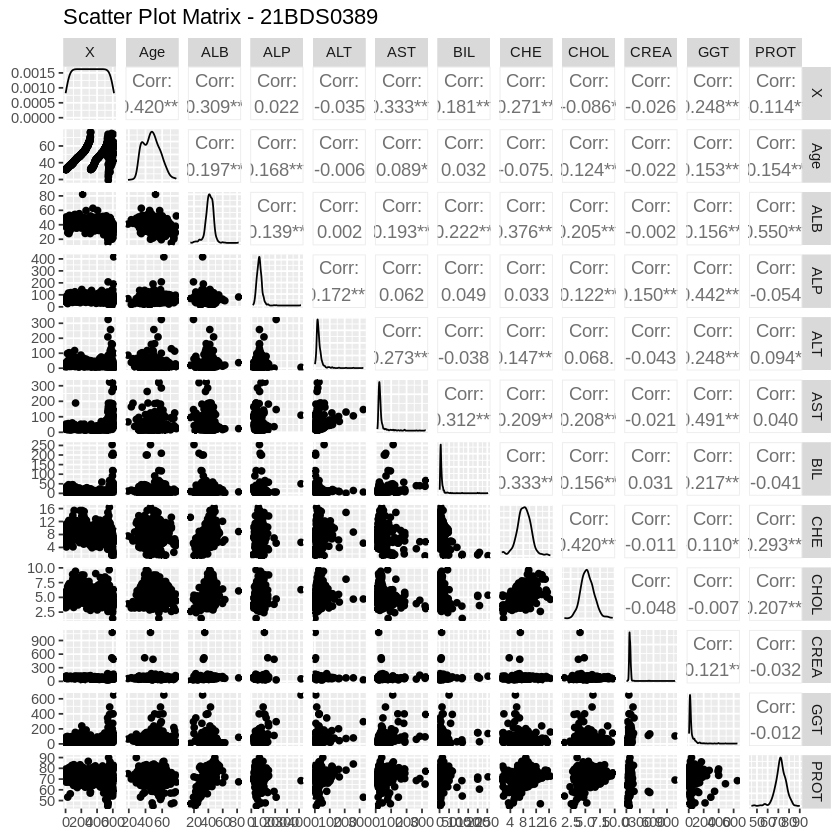

In [28]:
ggpairs(numeric_data, title = "Scatter Plot Matrix - 21BDS0389")

##### Multivariate Clustering

###### K-means

Warning message:
“argument title is deprecated; please use main instead.”


integer(0)


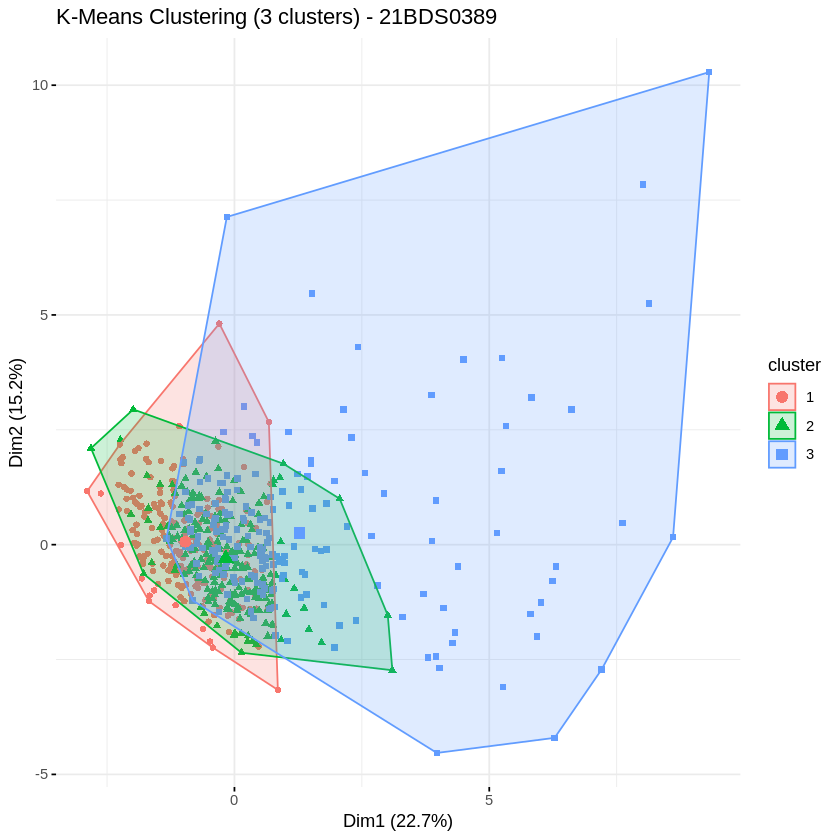

In [29]:
kmeans_result <- kmeans(numeric_data, centers=3, nstart=25)

# Visualize the clustering using PCA
fviz_cluster(kmeans_result, data = numeric_data, geom = "point", stand = TRUE,
             ellipse.type = "convex", ggtheme = theme_minimal(),
             title = "K-Means Clustering (3 clusters) - 21BDS0389")

# Distances of each point from its assigned cluster center
centers <- kmeans_result$centers
clusters <- kmeans_result$cluster
distances <- apply(scale(data_cleaned[, numeric_cols]), 1, function(row) {
  sqrt(sum((row - centers[clusters[rownames(data)], ])^2))
})

# Threshold for outlier detection (Eg: 2 standard deviations away from the mean distance)
outlier_threshold <- mean(distances) + 2 * sd(distances)
outliers_kmeans <- which(distances > outlier_threshold)

# Print the outlier indices
print(outliers_kmeans)

###### DBSCAN

  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
[217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 23

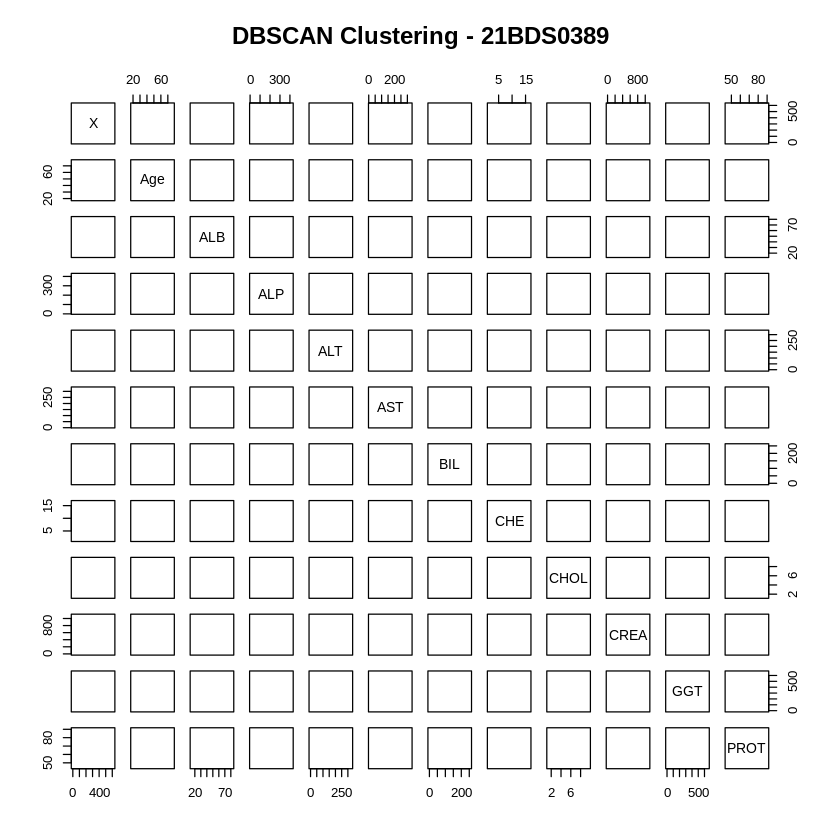

In [30]:
dbscan_result <- dbscan(scale(data_cleaned[, numeric_cols]), eps = 0.5, minPts = 5)

# Visualizing DBSCAN clusters
plot(data_cleaned[, numeric_cols], col = dbscan_result$cluster, main = "DBSCAN Clustering - 21BDS0389")

# Outliers are points with cluster == 0
outliers_dbscan <- which(dbscan_result$cluster == 0)

# Print the outlier indices
print(outliers_dbscan)


###### Hierarchical Clustering

integer(0)


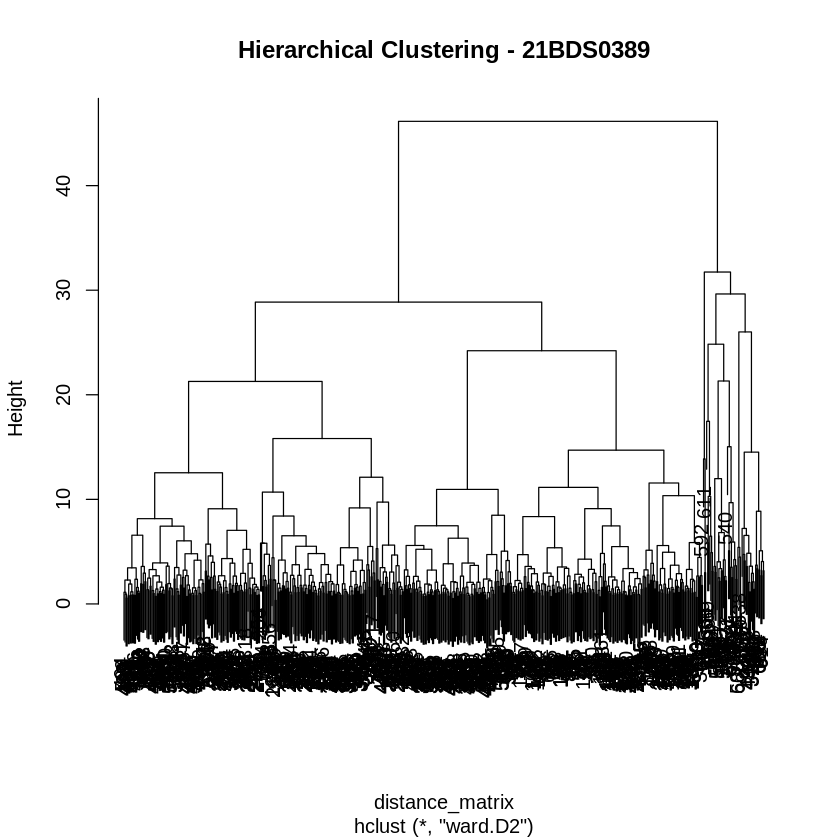

In [31]:
distance_matrix <- dist(scale(data_cleaned[, numeric_cols]))
hc <- hclust(distance_matrix, method="ward.D2")
plot(hc, main="Hierarchical Clustering - 21BDS0389")

# Cut dendrogram into clusters (Eg: 3 clusters)
clusters_hc <- cutree(hc, k = 3)

# Distance from each point to its cluster centroid
cluster_centers <- aggregate(scale(data_cleaned[, numeric_cols]), list(clusters_hc), mean)[-1]
distances_hc <- apply(scale(data_cleaned[, numeric_cols]), 1, function(row) {
  sqrt(sum((row - cluster_centers[clusters_hc[rownames(data_cleaned)], ])^2))
})

# Threshold to detect outliers (Eg: 2 standard deviations away)
outlier_threshold_hc <- mean(distances_hc) + 2 * sd(distances_hc)
outliers_hc <- which(distances_hc > outlier_threshold_hc)

# Print the outlier indices
print(outliers_hc)

###### Agglomerative Hierarchical Clustering

integer(0)


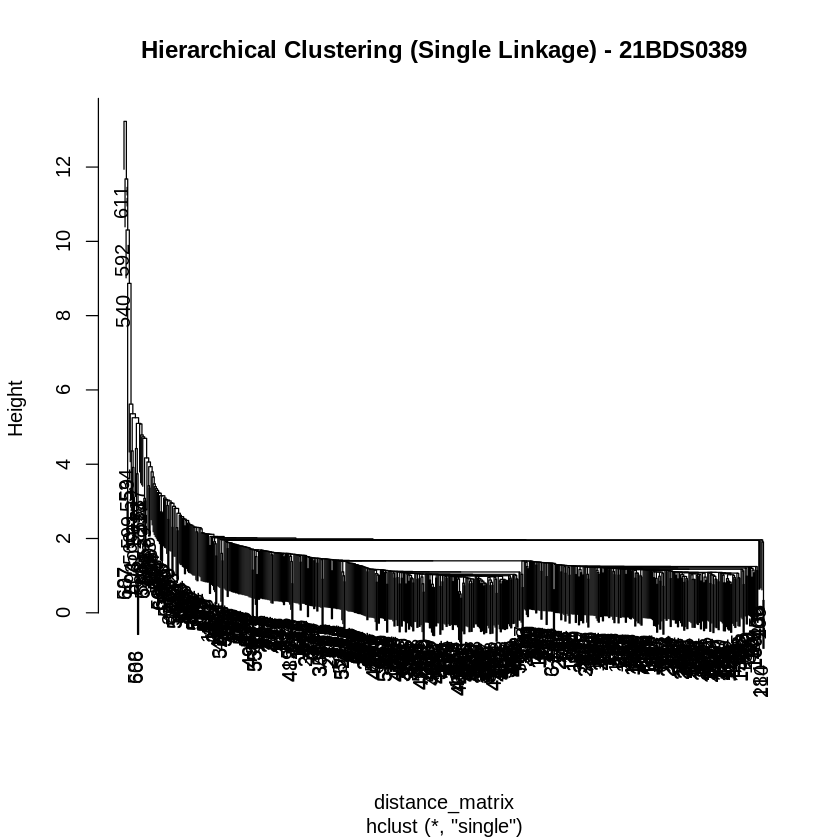

integer(0)


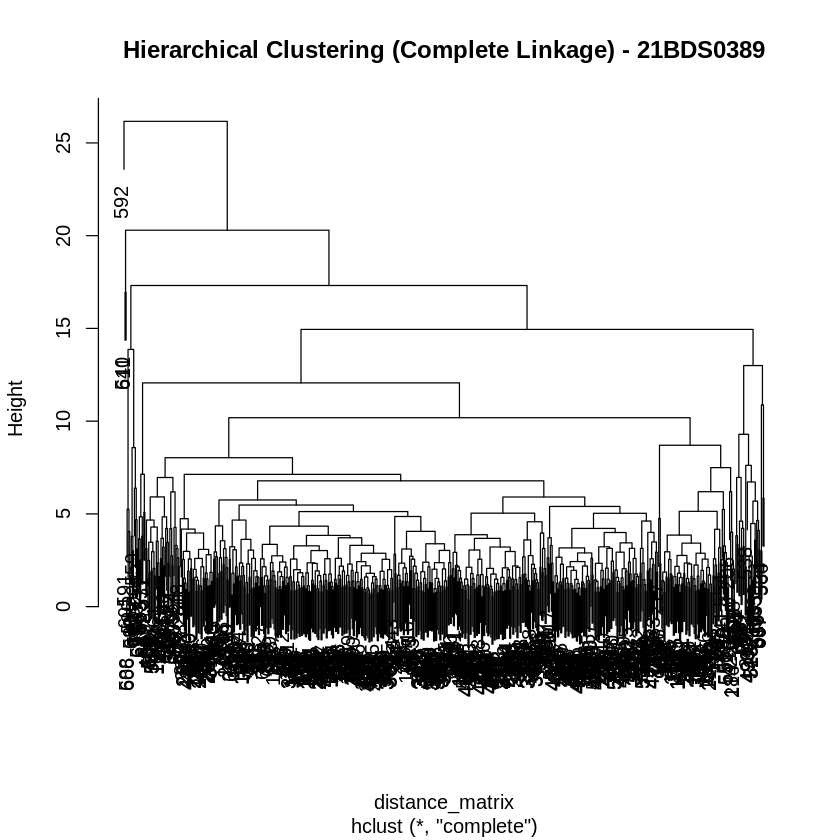

integer(0)


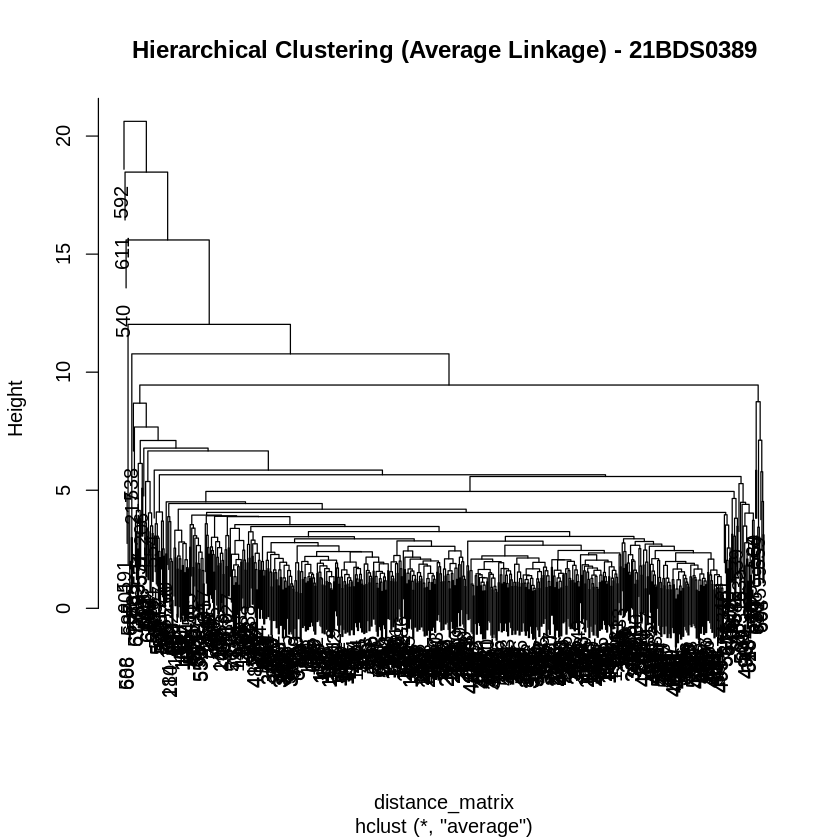

In [32]:
# Hierarchical Clustering - Single Linkage
hc_single <- hclust(distance_matrix, method="single")
plot(hc_single, main="Hierarchical Clustering (Single Linkage) - 21BDS0389")

# Cut dendrogram into clusters (Eg: 3)
clusters_single <- cutree(hc_single, k = 3)

# Cluster centroids
cluster_centers_single <- aggregate(scale(data_cleaned[, numeric_cols]), list(clusters_single), mean)[-1]

# Distance of each point to its cluster centroid
distances_single <- apply(scale(data_cleaned[, numeric_cols]), 1, function(row) {
  sqrt(sum((row - cluster_centers_single[clusters_single[rownames(data_cleaned)], ])^2))
})

# Threshold for outlier detection (Eg: 2 standard deviations)
outlier_threshold_single <- mean(distances_single) + 2 * sd(distances_single)

# Outliers
outliers_single <- which(distances_single > outlier_threshold_single)

# Print outlier indices
print(outliers_single)

# Hierarchical Clustering - Complete Linkage
hc_complete <- hclust(distance_matrix, method="complete")
plot(hc_complete, main="Hierarchical Clustering (Complete Linkage) - 21BDS0389")

# Cut dendrogram into clusters (Eg: 3)
clusters_complete <- cutree(hc_complete, k = 3)

# Cluster centroids
cluster_centers_complete <- aggregate(scale(data_cleaned[, numeric_cols]), list(clusters_complete), mean)[-1]

# Distance of each point to its cluster centroid
distances_complete <- apply(scale(data_cleaned[, numeric_cols]), 1, function(row) {
  sqrt(sum((row - cluster_centers_complete[clusters_complete[rownames(data_cleaned)], ])^2))
})

# Threshold for outlier detection (Eg: 2 standard deviations)
outlier_threshold_complete <- mean(distances_complete) + 2 * sd(distances_complete)

# Outliers
outliers_complete <- which(distances_complete > outlier_threshold_complete)

# Print outlier indices
print(outliers_complete)

# Hierarchical Clustering - Average Linkage
hc_average <- hclust(distance_matrix, method="average")
plot(hc_average, main="Hierarchical Clustering (Average Linkage) - 21BDS0389")

# Cut dendrogram into clusters (Eg: 3)
clusters_average <- cutree(hc_average, k = 3)

# Cluster centroids
cluster_centers_average <- aggregate(scale(data_cleaned[, numeric_cols]), list(clusters_average), mean)[-1]

# Distance of each point to its cluster centroid
distances_average <- apply(scale(data_cleaned[, numeric_cols]), 1, function(row) {
  sqrt(sum((row - cluster_centers_average[clusters_average[rownames(data_cleaned)], ])^2))
})

# Threshold for outlier detection (Eg: 2 standard deviations)
outlier_threshold_average <- mean(distances_average) + 2 * sd(distances_average)

# Outliers
outliers_average <- which(distances_average > outlier_threshold_average)

# Print the outlier indices
print(outliers_average)

###### Gaussian Mixture

integer(0)


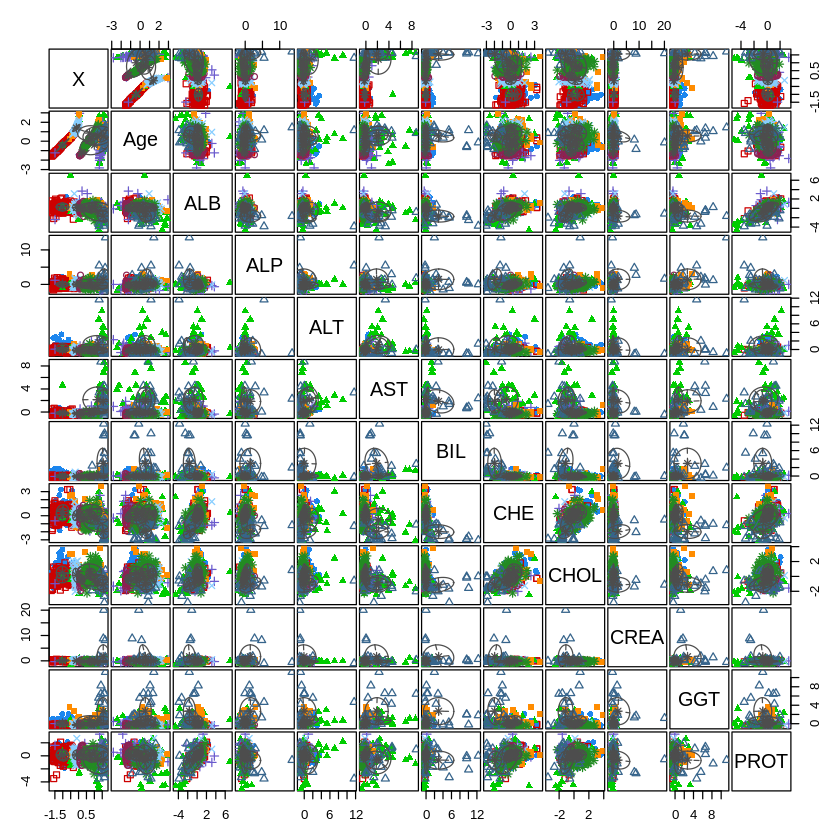

In [33]:
mc_result <- Mclust(scale(data_cleaned[, numeric_cols]))
plot(mc_result, what = "classification", main="Model-Based Clustering (Gaussian Mixture Models) - 21BDS0389")

# Classification probabilities for each point
probabilities <- mc_result$z

# Points with low max probability across clusters are outliers
max_prob <- apply(probabilities, 1, max)
outlier_threshold_mc <- 0.1  # Define a threshold for the minimum probability
outliers_mc <- which(max_prob < outlier_threshold_mc)

# Print the outlier indices
print(outliers_mc)

###### Spectral Clustering

integer(0)


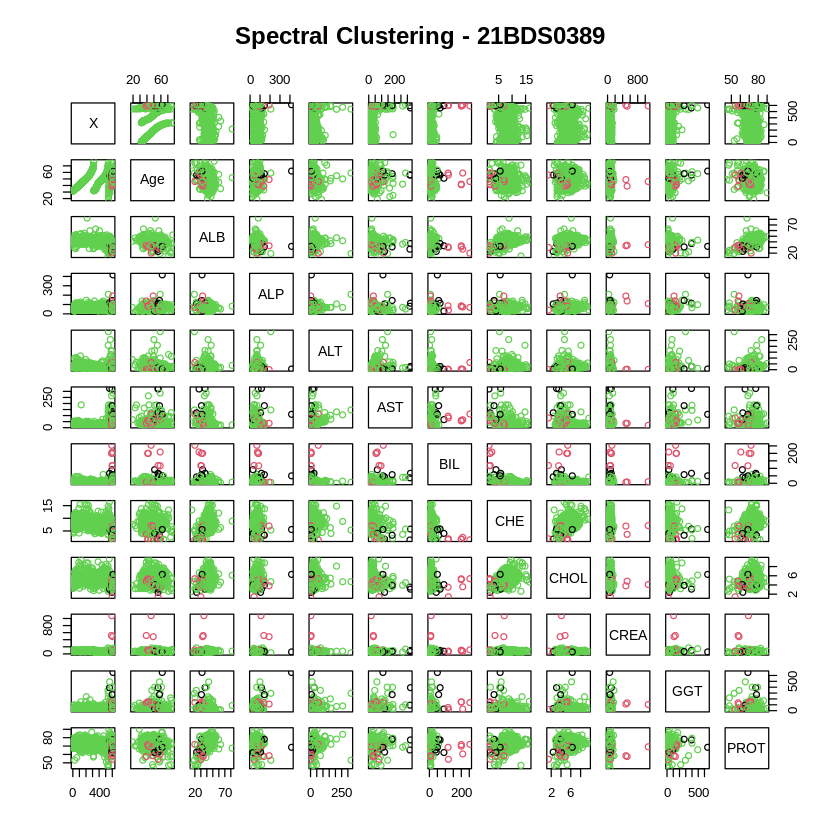

In [34]:
spectral_result <- specc(scale(data_cleaned[, numeric_cols]), centers = 3)

# Visualizing the Spectral Clustering result
plot(data_cleaned[, numeric_cols], col = spectral_result, main="Spectral Clustering - 21BDS0389")

# Distances to the cluster centroids
cluster_centers_spectral <- aggregate(scale(data_cleaned[, numeric_cols]), list(spectral_result), mean)[-1]
distances_spectral <- apply(scale(data_cleaned[, numeric_cols]), 1, function(row) {
  sqrt(sum((row - cluster_centers_spectral[spectral_result[rownames(data_cleaned)], ])^2))
})

# Threshold for outlier detection (Eg: 2 standard deviations away)
outlier_threshold_spectral <- mean(distances_spectral) + 2 * sd(distances_spectral)
outliers_spectral <- which(distances_spectral > outlier_threshold_spectral)

# Print the outlier indices
print(outliers_spectral)

###### PAM

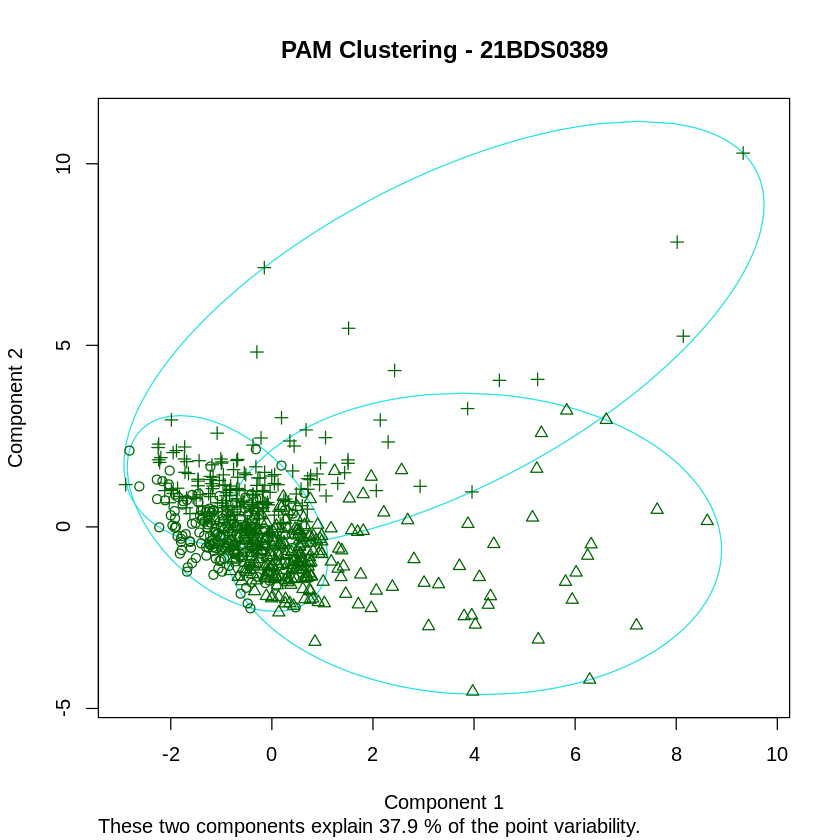

integer(0)


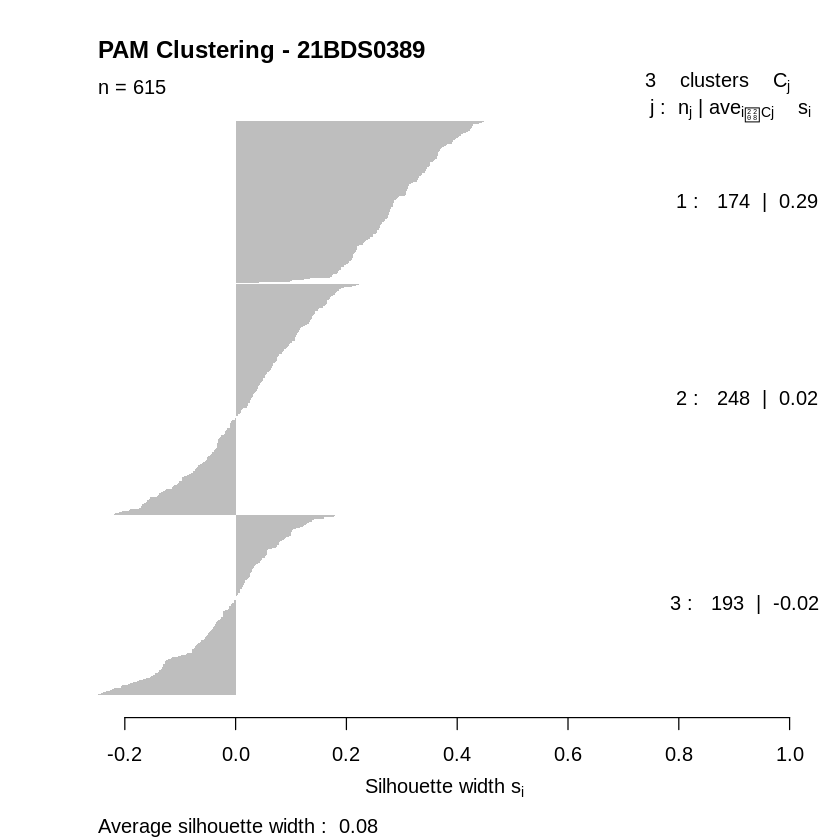

In [35]:
pam_result <- pam(scale(data_cleaned[, numeric_cols]), k = 3)

# Plotting the result
plot(pam_result, main = "PAM Clustering - 21BDS0389")

# Distance to the medoid for each point
distances_pam <- pam_result$clustering

# Outliers are points with large distances from their medoids(Eg: 2 standard deviations away)
outlier_threshold_pam <- mean(distances_pam) + 2 * sd(distances_pam)
outliers_pam <- which(distances_pam > outlier_threshold_pam)

# Print the outlier indices
print(outliers_pam)

##### Pairwise Scatter Plots

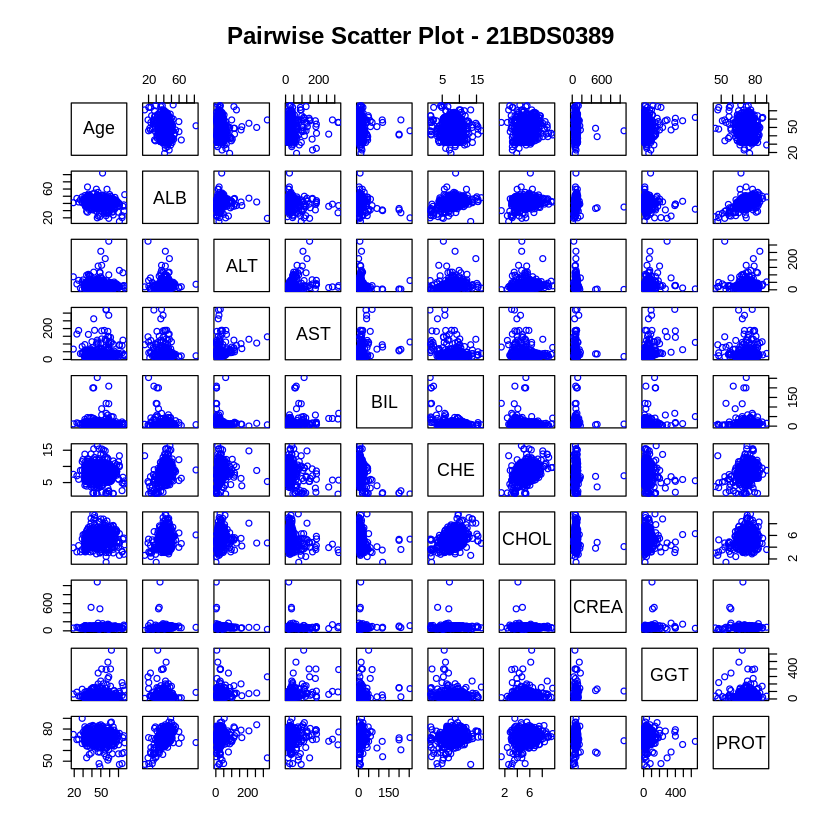

In [36]:
pairs(data_cleaned[, c("Age", "ALB", "ALT", "AST", "BIL","CHE", "CHOL", "CREA", "GGT", "PROT")], main="Pairwise Scatter Plot - 21BDS0389", col="blue")

##### Heatmap for Correlation

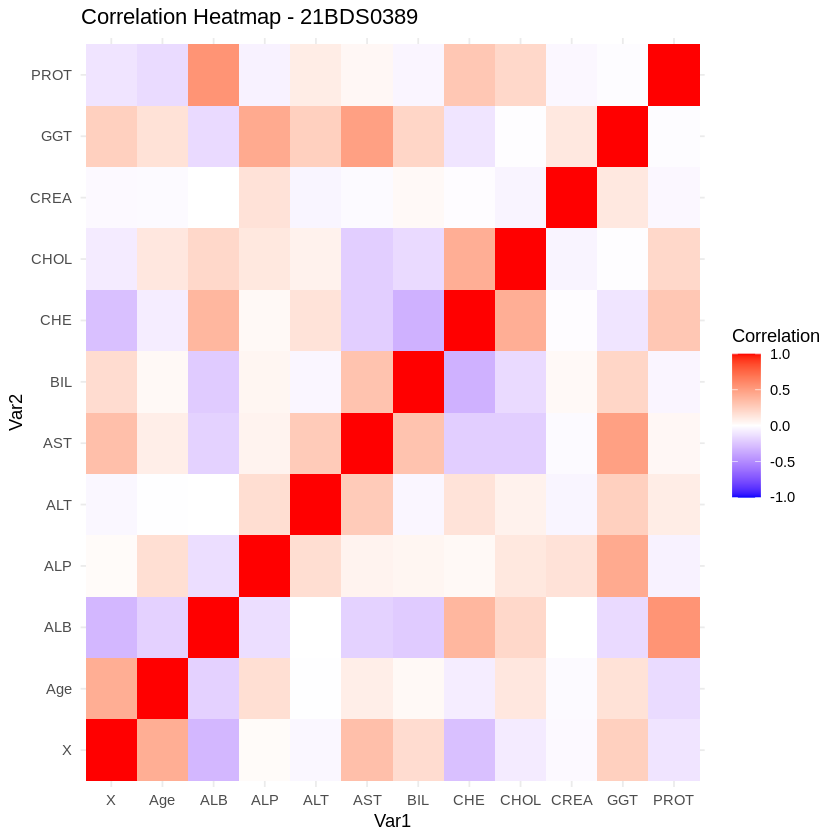

In [37]:
# Melt the correlation matrix into long format for ggplot
melted_cor <- melt(cor_matrix)

# Heatmap plot
ggplot(melted_cor, aes(x=Var1, y=Var2, fill=value)) +
  geom_tile() +
  scale_fill_gradient2(low="blue", high="red", mid="white", midpoint=0, limit=c(-1,1), name="Correlation") +
  theme_minimal() +
  ggtitle("Correlation Heatmap - 21BDS0389")

### Dimensionality Reduction

#### Linear Methods

###### Principal Component Analysis

In [38]:
# Standardize the data
data_numeric <- data_cleaned[, sapply(data_cleaned, is.numeric)]
data_scaled <- scale(data_numeric)

# Principal Component Analysis
pca_result <- prcomp(data_scaled, center = TRUE, scale. = TRUE)
summary(pca_result)

# Projected data in PCA space
pca_result$x

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.6507 1.3502 1.1735 1.0985 1.01798 0.91340 0.83674
Proportion of Variance 0.2271 0.1519 0.1148 0.1006 0.08636 0.06952 0.05834
Cumulative Proportion  0.2271 0.3790 0.4938 0.5943 0.68066 0.75019 0.80853
                           PC8     PC9    PC10   PC11    PC12
Standard deviation     0.77309 0.70968 0.68769 0.6274 0.57431
Proportion of Variance 0.04981 0.04197 0.03941 0.0328 0.02749
Cumulative Proportion  0.85834 0.90031 0.93972 0.9725 1.00000

PC1         PC2          PC3        PC4         PC5         PC6        
 [1,] -0.42383343 -2.240923586 -1.3735594 1.8508327   -0.44944489  0.17719861
 [2,] -1.76901985 -0.248155860 -0.8762333 1.1239284   -0.63086054 -0.48396491
 [3,] -1.67766368  0.743372578 -1.8790417 0.8691286   -0.19681869 -0.25545592
 [4,] -1.14962699 -0.660563455 -1.8254617 0.9298365   -0.28732437 -0.59940805
 [5,] -0.73799779 -0.709022923 -0.8717788 1.7337663   -1.25085114 -0.44568783
 [6,] -1.50674947  0.109733114 -0.9445569 1.2015228    0.09847590 -0.53236605
 [7,] -1.67702707 -1.230708816 -1.6713027 0.5988928   -0.17518032 -0.35448501
 [8,] -0.39718347 -1.534627616 -1.5373593 1.5276895   -0.70870672 -0.02118700
 [9,] -1.81843346 -0.735320596 -1.5494985 1.2539202   -0.27012267 -0.03982754
[10,] -0.08688174 -1.217363197 -1.4321493 1.7966234   -0.14681043 -1.55079245
[11,] -0.50771683 -1.675718099 -2.3874394 1.0556296   -0.07275447 -0.35159859
[12,] -1.15519812 -1.317651922 -1.0341337 1.4483400   -0.34206026 -0.36240622
[13,] -0.73442396 -0.751587613 -0.1800491 1.6815020   -1.07773413 -0.86384044
[14,] -0.47774150 -2.106572838 -1.4890483 1.1925998   -0.92247810 -0.10958150
[15,] -0.61794116 -1.837749401 -1.2837116 0.7432088   -0.85028049 -0.42120802
[16,] -1.04886723 -0.459443008 -1.3584096 1.0994056   -0.96717684 -0.19227650
[17,] -0.94547570 -0.863225185 -0.8430823 1.4257864   -0.25521274 -0.75067904
[18,] -1.57323334  0.880629608 -1.0502270 1.4819535   -0.04541701 -0.59796724
[19,] -0.52849746 -0.347183219 -0.9053693 1.5438215   -0.79899174 -0.59167726
[20,] -0.40210121 -1.168215908 -1.3583634 1.7546094   -0.75384785  0.07227301
[21,] -1.39690121 -0.454134717 -1.3012632 1.0284732   -0.10978209 -0.36940436
[22,] -1.57848401  0.084449438 -1.1100008 1.3887375   -0.26165974 -0.55895344
[23,] -0.72415711  0.649848146 -1.0894650 1.3800025   -1.07684768 -0.73171091
[24,] -0.41743090  0.007961838 -2.2814586 1.0612008   -2.47796302  0.81721919
[25,] -1.50174681 -0.855887759 -1.1993869 0.8298518   -0.81279682  0.33636789
[26,] -1.85075193  0.817817308 -1.3073773 0.7942479   -0.13920572 -0.88760032
[27,] -1.66270057 -1.111077982 -0.3600562 0.5383529   -0.57831658 -0.52923849
[28,]  0.85183083 -3.161398560  0.2842365 2.0471799   -2.77486191 -0.17953561
[29,] -1.15427077 -0.468616687 -0.8080974 1.5093771   -0.18061583 -0.48201749
[30,] -1.70192177 -0.198709172 -1.3805594 0.9569500   -0.13545349 -0.55897563
[31,] ⋮           ⋮            ⋮          ⋮           ⋮           ⋮          
[32,] 1.804857     0.90051214  -2.4779700 -0.44214873 -1.0776183   1.37169701
[33,] 3.876250     0.08182145   1.5572865  7.01467782  4.4368508   3.32877418
[34,] 6.310964    -0.47994022  -3.1900993  0.22473036  3.5899058  -5.92291274
[35,] 5.151771     0.25794739  -3.4173689 -1.60530303 -0.2794031   0.40764478
[36,] 3.800069    -2.45673586  -1.8380517 -1.26314592  0.2230078   0.66332314
[37,] 8.606477     0.16164634  -4.4638610 -0.23653999  2.6364304  -6.59039755
[38,] 2.930223     1.11599874   1.3678978 12.14435885 11.3509359   9.28079186
[39,] 2.426273     4.30187963  -2.1269816 -1.08298406 -2.2620799   1.56092774
[40,] 5.828385     3.20229920  -3.3942112 -1.06254311  0.7015827   0.84244265
[41,] 4.021664    -2.68844965  -1.1672981 -0.97350263  0.9724800  -1.42769281
[42,] 7.616212     0.46976845  -2.9323072 -1.48458476 -0.6197203   0.93726550
[43,] 5.936492    -2.00419928  -0.4010177  0.19932357 -0.3829143  -0.32974505
[44,] 6.282631    -4.20422419  -1.7762357 -0.20516921  0.7676061  -1.52305073
[45,] 6.611134     2.94374740  -1.8610486 -0.18012093  1.4308848  -1.37065578
[46,] 3.708012    -1.07583341  -1.4160500 -1.17364192  1.6861557   0.81473222
[47,] 7.207117    -2.71259875  -2.0518079 -0.46869888  2.4767628  -5.45916612
[48,] 5.804746    -1.51114646  -1.6518180 -0.82131135  1.6571728  -2.70856014
[49,] 5.252896     4.05876094  -0.8365158 -0.33678346  0.7373532   0.30275237
[50,] 1.437903     1.48876149   0.2681856 -1.74774964  0.8025070   0.68670223
[51,] 5.265733    -3.0991453

###### Singular Value Decomposition

In [39]:
# Singular Value Decomposition
svd_result <- svd(data_numeric)
U <- svd_result$u    # Left singular vectors
D <- diag(svd_result$d) # Singular values as diagonal matrix
V <- svd_result$v    # Right singular vectors

In [40]:
U

[,1]         [,2]         [,3]          [,4]          [,5]         
 [1,] -0.005623091 0.06788039    0.0233212272  0.002189900  -0.0135316909
 [2,] -0.005645987 0.06326853    0.0116181174  0.036819668  -0.0036061251
 [3,] -0.006817973 0.07467533   -0.0037157923  0.038304757  -0.0359670680
 [4,] -0.006007270 0.06519506    0.0012457671  0.025147468  -0.0138321216
 [5,] -0.006199912 0.06612613    0.0006921479  0.034716922  -0.0032382295
 [6,] -0.007185755 0.07934006   -0.0251702901 -0.018460045   0.0075038003
 [7,] -0.005548071 0.05547003    0.0127035380  0.026937974  -0.0112869415
 [8,] -0.006616252 0.06987147    0.0140746501  0.003289176  -0.0391800647
 [9,] -0.006445569 0.06446297    0.0161298753  0.031126536  -0.0067009193
[10,] -0.006829052 0.06698203    0.0117156876  0.035702791   0.0018631275
[11,] -0.006467978 0.06116050    0.0079498992  0.025423290  -0.0126154448
[12,] -0.006572336 0.06168027    0.0126590677  0.026732237   0.0042470073
[13,] -0.006857513 0.06363273    0.0093167295  0.033492766   0.0027280244
[14,] -0.006099002 0.05202576    0.0154337089  0.032925027  -0.0139745270
[15,] -0.006098504 0.05057671    0.0101119512  0.029926330  -0.0179766005
[16,] -0.007181574 0.06151867    0.0015765663  0.039035490  -0.0237982864
[17,] -0.007423380 0.06577941    0.0166275589  0.024828599  -0.0032519438
[18,] -0.008739991 0.08006633   -0.0048043151  0.023644709   0.0004169321
[19,] -0.008230280 0.07351647    0.0078277902  0.006887360  -0.0422219810
[20,] -0.008070063 0.07026845    0.0138470812  0.014290334  -0.0291242149
[21,] -0.008029983 0.06878107    0.0105089645  0.009103218  -0.0172764448
[22,] -0.008246921 0.06731139    0.0035593529  0.039547039   0.0097360545
[23,] -0.008881222 0.07226824   -0.0459853491  0.019632229   0.0039799478
[24,] -0.008294931 0.06370688   -0.0120639644  0.049566317  -0.0651260801
[25,] -0.007792256 0.05944679    0.0094105202  0.008761741  -0.0295549946
[26,] -0.008710716 0.06682700    0.0054722706  0.041917326  -0.0145750581
[27,] -0.007458293 0.05281196    0.0177570053  0.008856871  -0.0270633146
[28,] -0.006933762 0.04433906    0.0091371774  0.021663993  -0.0106337110
[29,] -0.008943865 0.06769679    0.0196319086  0.028937323  -0.0069201570
[30,] -0.008662236 0.06178107    0.0088543375  0.026203210  -0.0117514921
[31,] ⋮            ⋮            ⋮             ⋮             ⋮            
[32,] -0.06436326  -0.029352979 -0.0422863670  0.0097131551 -0.018181295 
[33,] -0.07406515   0.129390562  0.0629873624 -0.3139209876  0.024152397 
[34,] -0.06619468  -0.011061910 -0.0679349349 -0.0644572971 -0.005663399 
[35,] -0.06539894  -0.036388754 -0.0634035880  0.0143315173 -0.236013145 
[36,] -0.06338205  -0.047841858 -0.0194165143 -0.0468095387 -0.081996295 
[37,] -0.06726192  -0.006125682 -0.0765585879 -0.0516052446 -0.115633926 
[38,] -0.08527283   0.309272777  0.2341384160 -0.6811026948 -0.071466273 
[39,] -0.06720072  -0.009351222 -0.1222866968  0.0141266954 -0.051645160 
[40,] -0.06958334   0.009167588 -0.2583217200 -0.0727555377 -0.024685163 
[41,] -0.06353375  -0.051666418  0.0086780386 -0.0357159427 -0.057533530 
[42,] -0.06761171  -0.022507545 -0.0932604549  0.0045515897 -0.283509142 
[43,] -0.06522741  -0.038821655 -0.0134163744  0.0069078274 -0.063530589 
[44,] -0.06403612  -0.050825590  0.0111779856 -0.0347026613 -0.076205723 
[45,] -0.06999110   0.007782552 -0.1782579122 -0.0247422138 -0.026251705 
[46,] -0.06617514  -0.026155690 -0.0045238467 -0.0494017856 -0.079445554 
[47,] -0.06516526  -0.043878225  0.0003013861 -0.0180643698 -0.057457711 
[48,] -0.06573637  -0.040148283 -0.0205417109 -0.0027167205 -0.053056317 
[49,] -0.07096209   0.017162221 -0.2465130786 -0.0722878459  0.044493251 
[50,] -0.06631288  -0.031112275 -0.0374517298 -0.0111310853  0.013579750 
[51,] -0.06437709  -0.058591374 -0.0113126990 -0.0196760490 -0.052078322 
[52,] -0.06738080  -0.022447245 -0.0675776209 -0.0567626009 -0.001694869 
[53,] -0.07610690   0.122903418  0.0673144062 -0.2650819944  0.053229990 
[54,] -0.0

In [41]:
D

[,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]    
 [1,] 9489.075    0.000    0.000   0.0000   0.0000   0.0000   0.0000   0.0000
 [2,]    0.000 1954.747    0.000   0.0000   0.0000   0.0000   0.0000   0.0000
 [3,]    0.000    0.000 1336.729   0.0000   0.0000   0.0000   0.0000   0.0000
 [4,]    0.000    0.000    0.000 946.9971   0.0000   0.0000   0.0000   0.0000
 [5,]    0.000    0.000    0.000   0.0000 710.9114   0.0000   0.0000   0.0000
 [6,]    0.000    0.000    0.000   0.0000   0.0000 560.9303   0.0000   0.0000
 [7,]    0.000    0.000    0.000   0.0000   0.0000   0.0000 445.7186   0.0000
 [8,]    0.000    0.000    0.000   0.0000   0.0000   0.0000   0.0000 428.0699
 [9,]    0.000    0.000    0.000   0.0000   0.0000   0.0000   0.0000   0.0000
[10,]    0.000    0.000    0.000   0.0000   0.0000   0.0000   0.0000   0.0000
[11,]    0.000    0.000    0.000   0.0000   0.0000   0.0000   0.0000   0.0000
[12,]    0.000    0.000    0.000   0.0000   0.0000   0.0000   0.0000   0.0000
      [,9]    [,10]    [,11]    [,12]   
 [1,]   0.000  0.00000  0.00000  0.00000
 [2,]   0.000  0.00000  0.00000  0.00000
 [3,]   0.000  0.00000  0.00000  0.00000
 [4,]   0.000  0.00000  0.00000  0.00000
 [5,]   0.000  0.00000  0.00000  0.00000
 [6,]   0.000  0.00000  0.00000  0.00000
 [7,]   0.000  0.00000  0.00000  0.00000
 [8,]   0.000  0.00000  0.00000  0.00000
 [9,] 219.238  0.00000  0.00000  0.00000
[10,]   0.000 92.45466  0.00000  0.00000
[11,]   0.000  0.00000 47.29285  0.00000
[12,]   0.000  0.00000  0.00000 23.60304

In [42]:
V

[,1]        [,2]        [,3]        [,4]        [,5]         
 [1,] -0.92602070 -0.36318727  0.03811303 -0.07350893  0.0300931060
 [2,] -0.11627679  0.17343050  0.06967600  0.23562576  0.0488144214
 [3,] -0.09569554  0.20032889  0.09413599  0.25184419 -0.0009555924
 [4,] -0.16258885  0.38718286 -0.05315598  0.38697991  0.3923731719
 [5,] -0.06659853  0.17298667 -0.10579103  0.31866595 -0.2766464171
 [6,] -0.09561456  0.10114951 -0.30396628  0.08942850 -0.8091035152
 [7,] -0.03120774  0.03156287 -0.06623707 -0.01559678 -0.1664544679
 [8,] -0.01857030  0.04213476  0.01953157  0.05582052  0.0070722957
 [9,] -0.01249941  0.02474470  0.01046558  0.03302010  0.0084643688
[10,] -0.19314195  0.65739067  0.34990309 -0.62063159 -0.1131530763
[11,] -0.11227441  0.25688182 -0.85633629 -0.23801427  0.2650584966
[12,] -0.16855479  0.32601289  0.13340127  0.41239384 -0.0261499825
      [,6]         [,7]        [,8]         [,9]          [,10]        
 [1,]  0.041746186  0.01859790 -0.008260118  0.0252444017  0.0047074115
 [2,] -0.101414177 -0.18376007  0.109024475 -0.9142599096  0.0346407141
 [3,] -0.091781882 -0.29888513  0.181266989  0.2467246028  0.8248956805
 [4,] -0.156039246  0.50312463 -0.483739558  0.0703843956  0.0250523395
 [5,]  0.822380390  0.24857796  0.194349310 -0.0169238095  0.0074418227
 [6,] -0.274853387 -0.03186564 -0.384818257 -0.0204852088  0.0201850285
 [7,] -0.406106987  0.60573651  0.657252064 -0.0053899593  0.0347653852
 [8,]  0.001282604 -0.06045967  0.019770317  0.0302937609  0.0274566310
 [9,] -0.006790513 -0.02792388  0.019041283 -0.0005330213 -0.0109771884
[10,]  0.088817722  0.03658583 -0.027798350 -0.0106198072 -0.0001550654
[11,]  0.030023604 -0.19179549  0.153140139  0.0038498323 -0.0056405903
[12,] -0.172005015 -0.38876387  0.279944005  0.3096511533 -0.5613552388
      [,11]         [,12]        
 [1,] -0.0016086751  0.0001612324
 [2,]  0.0158060680  0.0196098327
 [3,]  0.0805155708  0.0002786077
 [4,]  0.0062859779  0.0032986194
 [5,]  0.0123731105  0.0004731214
 [6,] -0.0085020474 -0.0063971356
 [7,] -0.0250829893  0.0023343237
 [8,] -0.9666730547  0.2327146779
 [9,] -0.2286486611 -0.9717872948
[10,] -0.0005858955 -0.0011533148
[11,] -0.0002849446  0.0014147889
[12,]  0.0750556149  0.0320604794

###### Factor Analysis

In [43]:
# Factor Analysis
fa_result <- factanal(data_numeric, factors = 2, rotation = "varimax")
print(fa_result)


Call:
factanal(x = data_numeric, factors = 2, rotation = "varimax")

Uniquenesses:
    X   Age   ALB   ALP   ALT   AST   BIL   CHE  CHOL  CREA   GGT  PROT 
0.777 0.926 0.504 0.785 0.882 0.669 0.843 0.607 0.826 0.986 0.192 0.667 

Loadings:
     Factor1 Factor2
X    -0.416   0.223 
Age  -0.226   0.153 
ALB   0.702         
ALP           0.463 
ALT   0.119   0.322 
AST  -0.275   0.506 
BIL  -0.345   0.195 
CHE   0.627         
CHOL  0.412         
CREA          0.118 
GGT  -0.155   0.885 
PROT  0.567   0.106 

               Factor1 Factor2
SS loadings      1.835   1.501
Proportion Var   0.153   0.125
Cumulative Var   0.153   0.278

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 483.63 on 43 degrees of freedom.
The p-value is 6.85e-76 


#### Non-linear Methods

###### Multidimensional Scaling

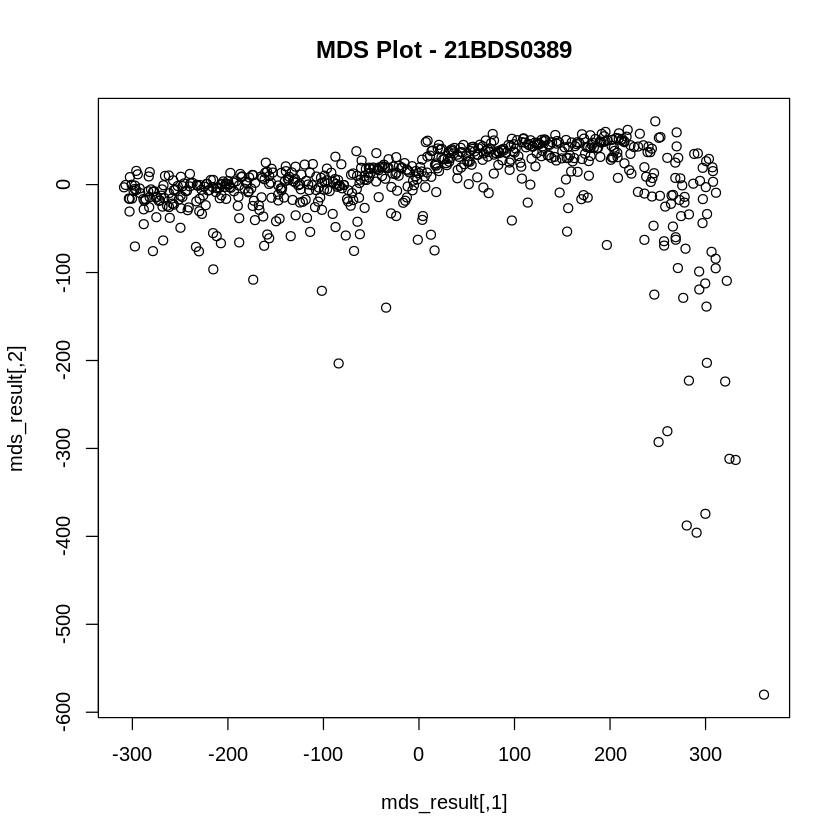

In [44]:
# Multidimensional Scaling
mds_result <- cmdscale(dist(data_numeric), k = 2)  # 2-dimensional scaling
plot(mds_result, main = "MDS Plot - 21BDS0389")

###### t-SNE

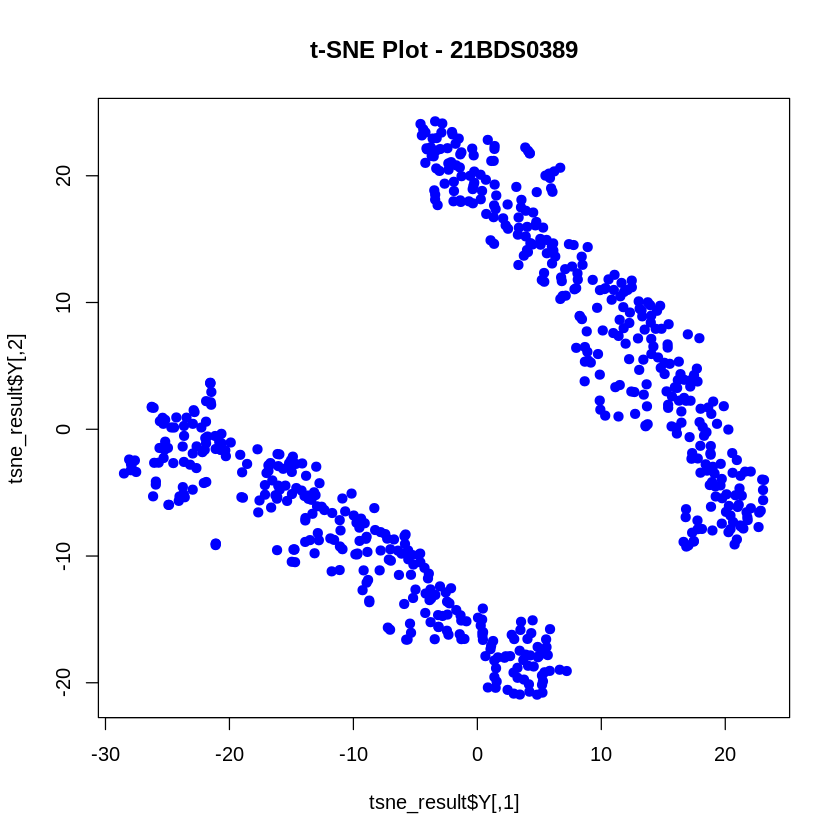

In [45]:
# t-SNE
tsne_result <- Rtsne(data_numeric, dims = 2, perplexity = 30)
plot(tsne_result$Y, col = "blue", pch = 19, main = "t-SNE Plot - 21BDS0389")

###### Self-Organizing Maps

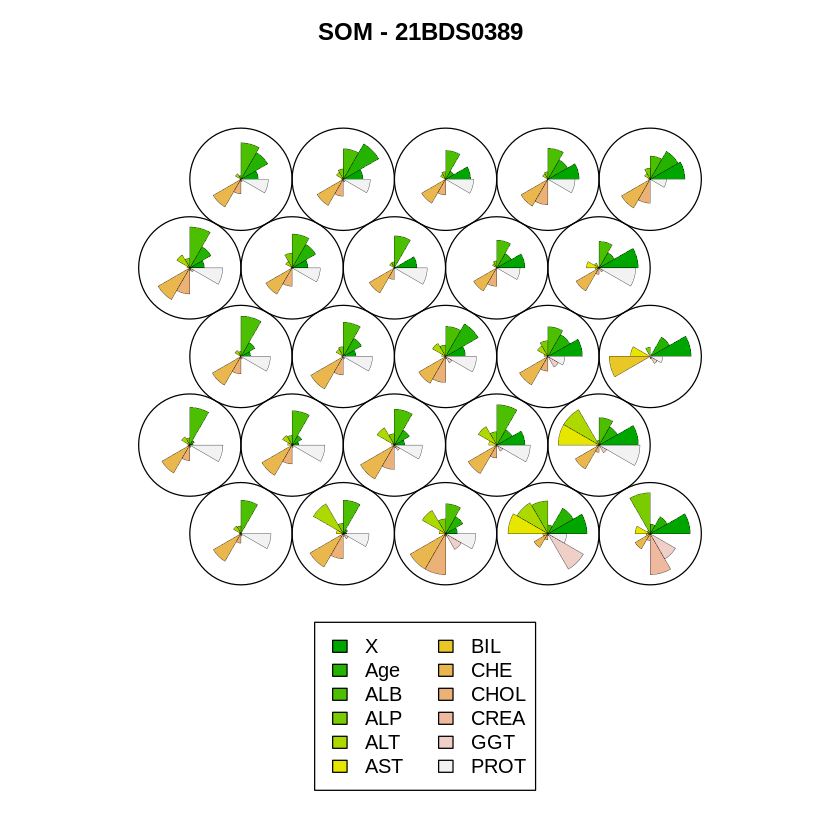

In [46]:
# Self-Organizing Maps
som_grid <- somgrid(xdim = 5, ydim = 5, topo = "hexagonal")
som_model <- supersom(list(as.matrix(data_numeric)), grid = som_grid, rlen = 100)
plot(som_model, main = "SOM - 21BDS0389")

### Linear Regression Model Construction

###### Train-test Split

In [47]:
# Train-test Split
set.seed(123)
train_index <- createDataPartition(data_cleaned$PROT, p = 0.8, list = FALSE)
train_data <- data_cleaned[train_index, ]
test_data <- data_cleaned[-train_index, ]

###### Linear Regression Model

In [48]:
# Linear Regression Model
linear_model <- lm(PROT ~ ., data = train_data)
summary(linear_model)


Call:
lm(formula = PROT ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.8154  -2.3787   0.3027   2.4690  14.7623 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    51.2027958  2.1087006  24.282  < 2e-16 ***
X                              -0.0054851  0.0034559  -1.587 0.113142    
Category0s=suspect Blood Donor -9.4850893  2.2201560  -4.272 2.34e-05 ***
Category1=Hepatitis             4.2671553  1.7695367   2.411 0.016267 *  
Category2=Fibrosis              5.6143606  1.4526278   3.865 0.000127 ***
Category3=Cirrhosis             5.4690665  1.7543601   3.117 0.001935 ** 
Age                            -0.0002401  0.0302034  -0.008 0.993661    
Sexm                           -1.5505591  0.9100407  -1.704 0.089065 .  
ALB                             0.4023720  0.0376666  10.682  < 2e-16 ***
ALP                             0.0047443  0.0088889   0.534 0.593772    
ALT               

###### Predictions

In [49]:
# Predictions
predictions <- predict(linear_model, newdata = test_data)
predictions

1        2        5        6        8       14       16       22 
69.23011 72.08706 71.52452 72.59706 71.32563 69.68684 72.65975 74.57718 
      26       28       38       44       47       49       53       55 
74.87331 66.09690 74.67277 73.39079 72.68378 77.41728 75.10832 73.15955 
      58       67       77       84       89       90       91       95 
76.35256 71.70275 71.37183 68.83090 71.67745 76.14197 73.20874 71.11359 
      98      109      113      127      138      142      151      160 
74.47463 76.74253 72.63121 74.81169 73.08127 72.26950 70.80476 74.72937 
     161      168      173      182      185      186      191      193 
77.49855 72.26582 74.42073 73.73103 75.32787 76.47932 73.05052 72.27240 
     197      199      201      203      205      215      219      224 
73.27963 71.65177 70.90686 72.34063 71.65962 72.87380 74.16399 74.19265 
     226      231      233      240      241      242      245      248 
71.25896 68.13078 72.46635 73.87027 70.64030 73.32671 73.52487 73.58802 
     258      270      281      286      287      288      290      296 
73.89615 68.84055 71.65510 70.16345 69.77043 73.18926 73.21077 68.55456 
     307      316      324      328      336      339      341      351 
71.61181 62.82803 69.64798 70.95633 68.44897 70.58571 73.68928 73.73493 
     355      359      362      378      389      391      394      395 
70.94102 69.63740 75.96302 71.40526 69.14255 68.56673 70.62441 72.88914 
     400      401      404      424      425      437      441      442 
70.03269 69.93657 69.18404 70.13070 74.12267 70.72565 72.65200 69.98931 
     444      451      453      455      459      460      470      475 
67.62828 71.53951 74.42884 69.63374 72.70255 72.49471 75.09025 71.94399 
     478      480      482      495      498      506      512      519 
72.31412 69.44986 75.45461 68.77683 70.71919 74.20713 73.43993 74.07383 
     520      521      524      530      536      541      543      555 
70.81631 69.39863 69.94314 73.36906 48.66556 76.10662 76.16135 76.46796 
     556      562      575      588      591      594      595      608 
78.57640 72.70010 76.00758 66.13606 62.91650 71.21776 68.46392 72.10419 
     610      614 
76.34665 71.06887

###### Evaluation Metrics

In [50]:
# Mean Squared Error (MSE)
mse <- mean((test_data$PROT - predictions)^2)
print(paste("Mean Squared Error (MSE):", round(mse, 2)))

# Root Mean Squared Error (RMSE)
rmse <- sqrt(mse)
print(paste("Root Mean Squared Error (RMSE):", round(rmse, 2)))

# Mean Absolute Error (MAE)
mae <- mean(abs(test_data$PROT - predictions))
print(paste("Mean Absolute Error (MAE):", round(mae, 2)))

# R-squared (R²)
sse <- sum((predictions - test_data$PROT)^2)
sst <- sum((test_data$PROT - mean(test_data$PROT))^2)
r_squared <- 1 - (sse / sst)
print(paste("R-squared (R²):", round(r_squared, 2)))

# Mean Absolute Percentage Error (MAPE)
mape <- mean(abs((test_data$PROT - predictions) / test_data$PROT)) * 100
print(paste("Mean Absolute Percentage Error (MAPE):", round(mape, 2), "%"))

[1] "Mean Squared Error (MSE): 20.17"
[1] "Root Mean Squared Error (RMSE): 4.49"
[1] "Mean Absolute Error (MAE): 3.37"
[1] "R-squared (R²): 0.4"
[1] "Mean Absolute Percentage Error (MAPE): 4.68 %"
